# Table of Contents

* [Import Packages](#Packages)
* [Import Brain and cluster for 6mo wt](#Brain_6mowt)
* [Import Brain and cluster for 12mo wt](#Brain_12mowt)
* [Import Brain and cluster for 22mo wt](#Brain_22mowt)
* [Import Brain and cluster for 6mo tg](#Brain_6motg)
* [Import Brain and cluster for 12mo tg](#Brain_12motg)
* [Import Brain and cluster for 22mo tg](#Brain_22motg)

<a class="anchor" id="Packages"></a>

In [1]:
import scipy
# numpy
import numpy
# matplotlib
import matplotlib
# pandas
import pandas
# scikit-learn
import sklearn
from sklearn import metrics

from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
import pandas as pd
import seaborn as sns
import numpy as np
# Load libraries
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from numpy import loadtxt
#from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from itertools import cycle
from sklearn.impute import SimpleImputer
from numpy import mean
from numpy import std
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import statsmodels.api as sm
import random
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import bartlett
from scipy.stats import ttest_ind
import matplotlib.colors as mcolors


# clustering packages 
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import normalize
from kneed import KneeLocator
from sklearn.cluster import KMeans

# Packages for importing data
import glob
import time

# Packages needed for defining which file should be added to which dictionary using regex
import re

# Package needed for labeling points in graph
from adjustText import adjust_text

# Packages for image segmentation 
import ipywidgets as widgets
import urllib
import matplotlib.cbook as cbook
from mpl_interactions import image_segmenter
import PIL

<a class="anchor" id="Brain_6mowt"></a>
Below we import a brain for the 6 month wild type.

In [2]:
num_metabolites_positive = 10783
# Import metabolomics matrix only
masked_metabolomics_matrix_308_4_wt_s2 = pd.read_csv('D:/All AGE Positive masks and roi sums/Whole Brains/308_4_wt_s2_pixel_matrix_with_mask_whole_brain.csv', index_col = 0)
# Read in coordinates for metabolomics matrix
coordinates_matrix_308_4_wt_s2 = pd.read_csv('D:/All AGE Positive TL/AL011023_AGE_308_4_WT_s2_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])

Below we keep only the filtered ions.

In [3]:
filtered_ions_matrix_no_background = masked_metabolomics_matrix_308_4_wt_s2.loc[(masked_metabolomics_matrix_308_4_wt_s2.sum(axis=1) != 0), :]
filtered_ions_matrix_no_background_tranposed = filtered_ions_matrix_no_background.T
filtered_ions_matrix_no_background_tranposed

1994     1995     1996     1997     1998     1999     2000   \
556.2758   1441.0   1476.0   2211.0   1921.0   1630.0   1252.0   3983.0   
760.5831  48469.0  56258.0  50282.0  49900.0  57248.0  52237.0  59743.0   
826.5699  47662.0  44119.0  42028.0  41757.0  41272.0  50058.0  51107.0   
782.5654  44208.0  41073.0  47890.0  42357.0  49566.0  48290.0  53659.0   
557.2783    700.0   1036.0    888.0    501.0    504.0    915.0   1009.0   
...           ...      ...      ...      ...      ...      ...      ...   
911.5466    198.0    113.0    131.0    594.0    248.0    258.0    327.0   
525.2379     42.0      0.0    137.0     39.0     60.0     52.0    108.0   
510.2535    257.0     43.0     51.0    355.0    398.0    128.0    208.0   
881.5392    122.0    276.0    251.0    238.0    261.0    270.0    182.0   
922.4955     87.0    129.0     33.0    155.0    102.0    422.0    339.0   

            2001     2002     2003   ...    17494    17495    17496    17497  \
556.2758   3879.0   2513.0   3404.0  ...  13205.0  22704.0  18253.0  20312.0   
760.5831  44429.0  48190.0  59992.0  ...  40243.0  24818.0  45726.0  33378.0   
826.5699  45464.0  35516.0  54730.0  ...  37064.0  17771.0  35452.0  23187.0   
782.5654  38901.0  49109.0  55997.0  ...  49297.0  30252.0  44346.0  39871.0   
557.2783   1126.0   1001.0    796.0  ...   3116.0   6193.0   5597.0   6606.0   
...           ...      ...      ...  ...      ...      ...      ...      ...   
911.5466    500.0    228.0    387.0  ...    238.0    346.0    119.0     28.0   
525.2379      0.0    185.0     38.0  ...      0.0     31.0      0.0      0.0   
510.2535    106.0    136.0    384.0  ...      0.0      0.0      0.0      0.0   
881.5392    327.0    181.0    335.0  ...    380.0    214.0    113.0    256.0   
922.4955    385.0    742.0    232.0  ...    179.0     64.0    345.0    192.0   

            17498    17499    17500    17501    17502    17503  
556.2758  20374.0  12958.0   4672.0   2059.0   1792.0   1283.0  
760.5831  30298.0  44841.0  66138.0  52163.0  53293.0  66865.0  
826.5699  33188.0  39195.0  53836.0  39354.0  40068.0  58584.0  
782.5654  39928.0  53713.0  53005.0  42174.0  53467.0  66668.0  
557.2783   7859.0   3986.0   1206.0    917.0    603.0    630.0  
...           ...      ...      ...      ...      ...      ...  
911.5466    407.0    253.0    227.0    338.0    380.0    919.0  
525.2379      0.0     50.0    245.0      0.0      0.0      0.0  
510.2535      0.0     13.0    116.0    182.0    237.0    142.0  
881.5392    372.0    447.0    180.0    473.0    247.0    472.0  
922.4955    106.0    232.0    239.0    282.0    125.0     89.0  

[10783 rows x 9304 columns]

Below we run kmeans on the pixels to find general patterns with 7 groups because that is what we saw in HDI.

C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


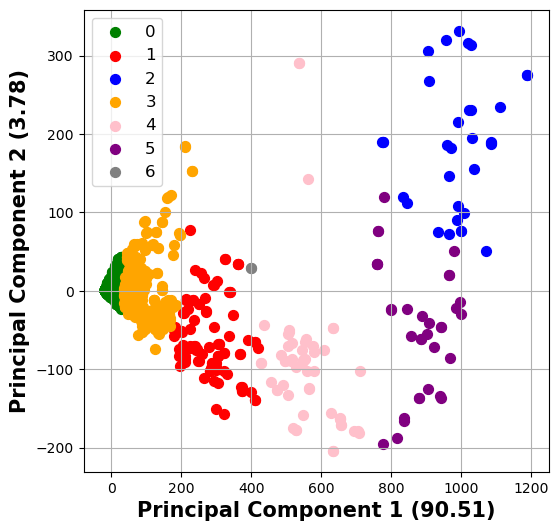

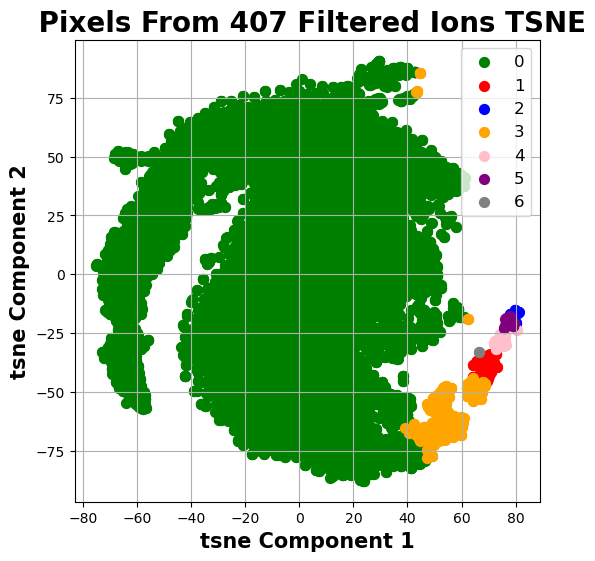

ValueError: cannot assign slice from input of different size

<Figure size 600x600 with 0 Axes>

In [4]:
# Standardize data
filtered_ions_matrix_no_background_tranposed_standardized = StandardScaler().fit_transform(filtered_ions_matrix_no_background_tranposed)

kmeans = KMeans(n_clusters=7, 
                    random_state=1)
kmeans.fit(filtered_ions_matrix_no_background_tranposed_standardized)
number_of_clusters = 7
clusterlabels = kmeans.labels_

# Specify plot type
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
principalDf_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf_pca['phenotype'] = clusterlabels
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(f'Principal Component 1 ({percent_variance[0]})', fontsize = 15, fontweight = 'bold')
ax.set_ylabel(f'Principal Component 2 ({percent_variance[1]})', fontsize = 15, fontweight = 'bold')
#ax.set_title(' Pixels From 407 Filtered Ions PCA', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf_pca['phenotype'] == group
    ax.scatter(principalDf_pca.loc[indicesToKeep, 'principal component 1']
               , principalDf_pca.loc[indicesToKeep, 'principal component 2'] 
               , c = color
               , s = 50)
ax.legend(labels, fontsize = 'large')
ax.grid()
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_wt_6mo_all_ion_clustering_pca.tiff')
plt.show()


tsne = TSNE(n_components=2, random_state = 100)
tsne_components = tsne.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
principalDf = pd.DataFrame(data = tsne_components, columns = ['tsne component 1', 'tsne component 2'])
principalDf['phenotype'] = clusterlabels
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne Component 1', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('tsne Component 2', fontsize = 15, fontweight = 'bold')
ax.set_title(' Pixels From 407 Filtered Ions TSNE', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf['phenotype'] == group
    ax.scatter(principalDf.loc[indicesToKeep, 'tsne component 1']
               , principalDf.loc[indicesToKeep, 'tsne component 2'] 
               , c = color
               , s = 50, alpha = 1)
ax.legend(labels, fontsize = 'large')
# Scatter 301
#plt.scatter(3.936206, 2.881305, color = 'black')
ax.grid()
plt.show()

plt.figure(figsize = (6, 6))
reducer = umap.UMAP()
embedding = reducer.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
embedding_df = pd.DataFrame(embedding)
embedding_df['phenotype'] = clusterlabels
embedding_df['phenotype'] = embedding_df['phenotype'].replace({0 : '0', 1 : '1', 2 : '2', 3 : '3', 4: '4', 5: '5', 6 : '6'})

sns.scatterplot(data = embedding_df, hue = 'phenotype', x = 0, y = 1, alpha = 0.3)
plt.title('UMAP projection of Pixels From 407 Filtered Ions', fontsize=12)


Below we add the labels

In [11]:
filtered_ions_matrix_no_background_tranposed['labels'] = clusterlabels
filtered_ions_matrix_no_background_tranposed

1994     1995     1996     1997     1998     1999     2000  \
556.2758   1441.0   1476.0   2211.0   1921.0   1630.0   1252.0   3983.0   
760.5831  48469.0  56258.0  50282.0  49900.0  57248.0  52237.0  59743.0   
826.5699  47662.0  44119.0  42028.0  41757.0  41272.0  50058.0  51107.0   
782.5654  44208.0  41073.0  47890.0  42357.0  49566.0  48290.0  53659.0   
557.2783    700.0   1036.0    888.0    501.0    504.0    915.0   1009.0   
...           ...      ...      ...      ...      ...      ...      ...   
911.5466    198.0    113.0    131.0    594.0    248.0    258.0    327.0   
525.2379     42.0      0.0    137.0     39.0     60.0     52.0    108.0   
510.2535    257.0     43.0     51.0    355.0    398.0    128.0    208.0   
881.5392    122.0    276.0    251.0    238.0    261.0    270.0    182.0   
922.4955     87.0    129.0     33.0    155.0    102.0    422.0    339.0   

             2001     2002     2003  ...    17495    17496    17497    17498  \
556.2758   3879.0   2513.0   3404.0  ...  22704.0  18253.0  20312.0  20374.0   
760.5831  44429.0  48190.0  59992.0  ...  24818.0  45726.0  33378.0  30298.0   
826.5699  45464.0  35516.0  54730.0  ...  17771.0  35452.0  23187.0  33188.0   
782.5654  38901.0  49109.0  55997.0  ...  30252.0  44346.0  39871.0  39928.0   
557.2783   1126.0   1001.0    796.0  ...   6193.0   5597.0   6606.0   7859.0   
...           ...      ...      ...  ...      ...      ...      ...      ...   
911.5466    500.0    228.0    387.0  ...    346.0    119.0     28.0    407.0   
525.2379      0.0    185.0     38.0  ...     31.0      0.0      0.0      0.0   
510.2535    106.0    136.0    384.0  ...      0.0      0.0      0.0      0.0   
881.5392    327.0    181.0    335.0  ...    214.0    113.0    256.0    372.0   
922.4955    385.0    742.0    232.0  ...     64.0    345.0    192.0    106.0   

            17499    17500    17501    17502    17503  labels  
556.2758  12958.0   4672.0   2059.0   1792.0   1283.0       3  
760.5831  44841.0  66138.0  52163.0  53293.0  66865.0       2  
826.5699  39195.0  53836.0  39354.0  40068.0  58584.0       2  
782.5654  53713.0  53005.0  42174.0  53467.0  66668.0       2  
557.2783   3986.0   1206.0    917.0    603.0    630.0       0  
...           ...      ...      ...      ...      ...     ...  
911.5466    253.0    227.0    338.0    380.0    919.0       0  
525.2379     50.0    245.0      0.0      0.0      0.0       0  
510.2535     13.0    116.0    182.0    237.0    142.0       0  
881.5392    447.0    180.0    473.0    247.0    472.0       0  
922.4955    232.0    239.0    282.0    125.0     89.0       0  

[10783 rows x 9305 columns]

Below we look at representative ion images from each cluster.

In [12]:
group0 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 0]
group0.index.tolist()

['557.2783',
 '578.2553',
 '149.0228',
 '163.0387',
 '297.6156',
 '558.2799',
 '445.1249',
 '335.1248',
 '579.2580',
 '536.1653',
 '413.2739',
 '556.5202',
 '173.0789',
 '600.2353',
 '217.1045',
 '239.1611',
 '171.1438',
 '610.1793',
 '295.1932',
 '595.2278',
 '298.1170',
 '425.2925',
 '301.1404',
 '446.1249',
 '161.0956',
 '537.1653',
 '357.2024',
 '365.1043',
 '519.1394',
 '323.2241',
 '429.0930',
 '663.4477',
 '556.6204',
 '150.0257',
 '611.1793',
 '245.0775',
 '136.0207',
 '538.1631',
 '782.8572',
 '794.5442',
 '447.1238',
 '750.5374',
 '556.8314',
 '114.0908',
 '684.1912',
 '724.4990',
 '760.8710',
 '612.1794',
 '556.7079',
 '429.2473',
 '697.4747',
 '307.0435',
 '393.3033',
 '562.3239',
 '826.8713',
 '355.0687',
 '781.5540',
 '560.3103',
 '852.4890',
 '754.5840',
 '912.4553',
 '751.5400',
 '867.6458',
 '118.1218',
 '336.1275',
 '164.0413',
 '299.1820',
 '351.0981',
 '273.1663',
 '896.4849',
 '309.2024',
 '813.5066',
 '752.5486',
 '851.6470',
 '425.1858',
 '755.5353',
 '261.1281',

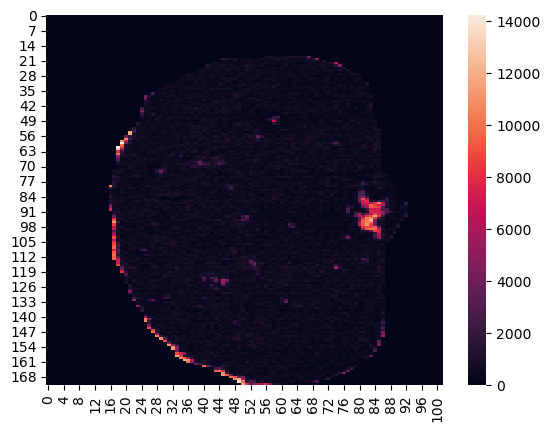

In [16]:
uniform_data_308_4_wt_s2_557_2783 = np.array(masked_metabolomics_matrix_308_4_wt_s2).T.reshape([num_metabolites_positive, len(coordinates_matrix_308_4_wt_s2[coordinates_matrix_308_4_wt_s2['x_coord'] == coordinates_matrix_308_4_wt_s2.iloc[0][0]]), len(coordinates_matrix_308_4_wt_s2[coordinates_matrix_308_4_wt_s2['y_coord'] == coordinates_matrix_308_4_wt_s2.iloc[0][1]])])[masked_metabolomics_matrix_308_4_wt_s2.columns.get_loc('557.2783')]
ax = sns.heatmap(uniform_data_308_4_wt_s2_557_2783)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_wt_6mo_group0_representative_image.tiff')
plt.show()

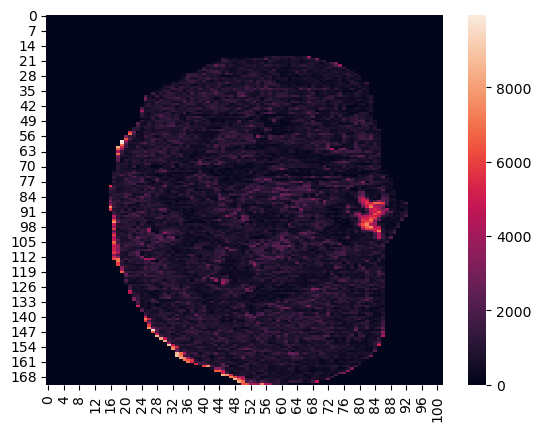

In [17]:
uniform_data_308_4_wt_s2_149_0228 = np.array(masked_metabolomics_matrix_308_4_wt_s2).T.reshape([num_metabolites_positive, len(coordinates_matrix_308_4_wt_s2[coordinates_matrix_308_4_wt_s2['x_coord'] == coordinates_matrix_308_4_wt_s2.iloc[0][0]]), len(coordinates_matrix_308_4_wt_s2[coordinates_matrix_308_4_wt_s2['y_coord'] == coordinates_matrix_308_4_wt_s2.iloc[0][1]])])[masked_metabolomics_matrix_308_4_wt_s2.columns.get_loc('149.0228')]
ax = sns.heatmap(uniform_data_308_4_wt_s2_149_0228)
plt.show()

In [18]:
group1 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 1]
group1.index.tolist()

['832.5750',
 '757.5522',
 '770.5109',
 '811.5994',
 '804.5469',
 '796.5256',
 '873.5563',
 '822.5305',
 '808.5762',
 '735.5709',
 '762.5927',
 '850.5593',
 '825.5574',
 '831.5212',
 '769.5609',
 '786.4899',
 '834.5881',
 '798.8399',
 '790.5199',
 '870.5369',
 '739.4666',
 '847.5345',
 '856.5775',
 '874.5556',
 '132.0765',
 '802.4776',
 '815.5294',
 '802.5543',
 '296.0660',
 '762.5934',
 '815.5321',
 '735.5701',
 '770.5098',
 '786.4899.1',
 '802.4747',
 '870.5354',
 '856.5755',
 '874.5531',
 '762.5927.1',
 '804.5458',
 '790.5189',
 '782.5087',
 '799.4821',
 '772.4693',
 '848.5630',
 '760.5430',
 '873.5560',
 '735.5693',
 '757.5514',
 '822.5307',
 '811.5989',
 '786.4857',
 '798.8409',
 '831.5198',
 '804.5457',
 '825.5579',
 '808.5746',
 '815.5264',
 '802.4781',
 '790.5182',
 '772.5937',
 '799.6124',
 '769.5607',
 '739.4659',
 '847.5339',
 '834.5881.1',
 '796.5257',
 '802.5546',
 '132.0900',
 '832.5764',
 '790.5197',
 '856.5773',
 '850.5584',
 '757.5524',
 '831.5275',
 '832.5409',
 '828.

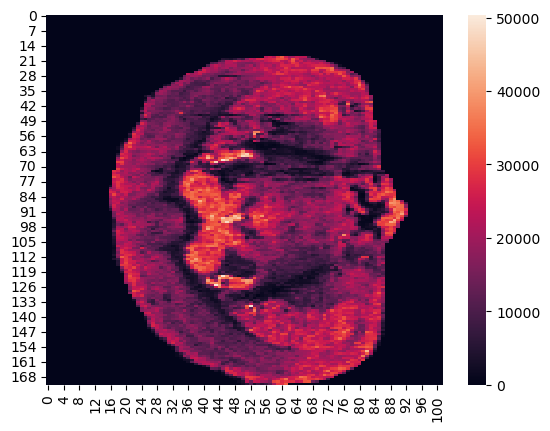

In [19]:
uniform_data_308_4_wt_s2_832_5750 = np.array(masked_metabolomics_matrix_308_4_wt_s2).T.reshape([num_metabolites_positive, len(coordinates_matrix_308_4_wt_s2[coordinates_matrix_308_4_wt_s2['x_coord'] == coordinates_matrix_308_4_wt_s2.iloc[0][0]]), len(coordinates_matrix_308_4_wt_s2[coordinates_matrix_308_4_wt_s2['y_coord'] == coordinates_matrix_308_4_wt_s2.iloc[0][1]])])[masked_metabolomics_matrix_308_4_wt_s2.columns.get_loc('832.5750')]
ax = sns.heatmap(uniform_data_308_4_wt_s2_832_5750)
plt.show()

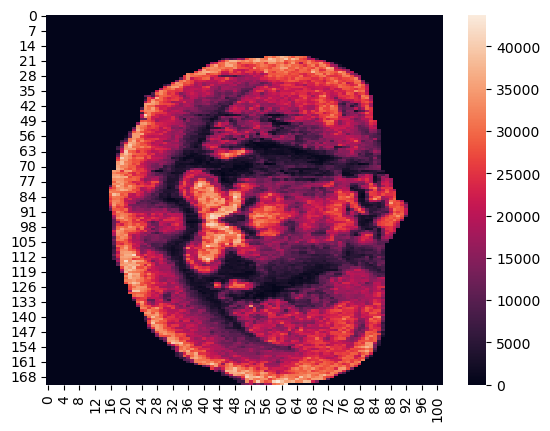

In [20]:
uniform_data_308_4_wt_s2_757_5522 = np.array(masked_metabolomics_matrix_308_4_wt_s2).T.reshape([num_metabolites_positive, len(coordinates_matrix_308_4_wt_s2[coordinates_matrix_308_4_wt_s2['x_coord'] == coordinates_matrix_308_4_wt_s2.iloc[0][0]]), len(coordinates_matrix_308_4_wt_s2[coordinates_matrix_308_4_wt_s2['y_coord'] == coordinates_matrix_308_4_wt_s2.iloc[0][1]])])[masked_metabolomics_matrix_308_4_wt_s2.columns.get_loc('757.5522')]
ax = sns.heatmap(uniform_data_308_4_wt_s2_757_5522)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_wt_6mo_group1_representative_image.tiff')
plt.show()

In [21]:
group2 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 2]
group2.index.tolist()

['760.5831',
 '826.5699',
 '782.5654',
 '799.5425',
 '772.5239',
 '798.5389',
 '761.5864',
 '760.5847',
 '782.5656',
 '799.5437',
 '772.5237',
 '799.5430',
 '782.5656.1',
 '798.5390',
 '798.5506',
 '799.5392',
 '761.5866',
 '798.5355',
 '826.5671',
 '782.5619',
 '772.5246',
 '799.5437.1',
 '782.5666',
 '826.5706',
 '760.5849',
 '826.5671.1',
 '782.5605',
 '798.5400',
 '798.5410',
 '798.5396',
 '798.5383.1',
 '798.5414',
 '761.5863']

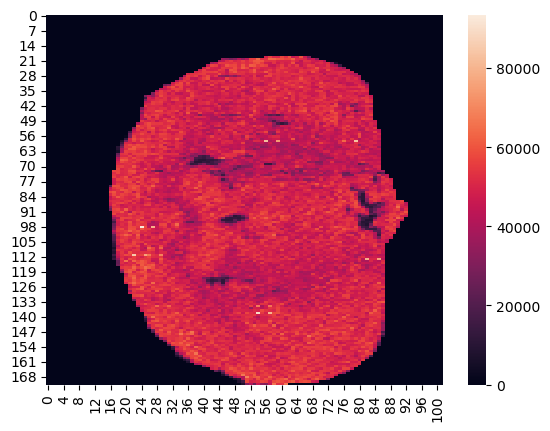

In [22]:
uniform_data_308_4_wt_s2_760_5831 = np.array(masked_metabolomics_matrix_308_4_wt_s2).T.reshape([num_metabolites_positive, len(coordinates_matrix_308_4_wt_s2[coordinates_matrix_308_4_wt_s2['x_coord'] == coordinates_matrix_308_4_wt_s2.iloc[0][0]]), len(coordinates_matrix_308_4_wt_s2[coordinates_matrix_308_4_wt_s2['y_coord'] == coordinates_matrix_308_4_wt_s2.iloc[0][1]])])[masked_metabolomics_matrix_308_4_wt_s2.columns.get_loc('760.5831')]
ax = sns.heatmap(uniform_data_308_4_wt_s2_760_5831)
plt.show()

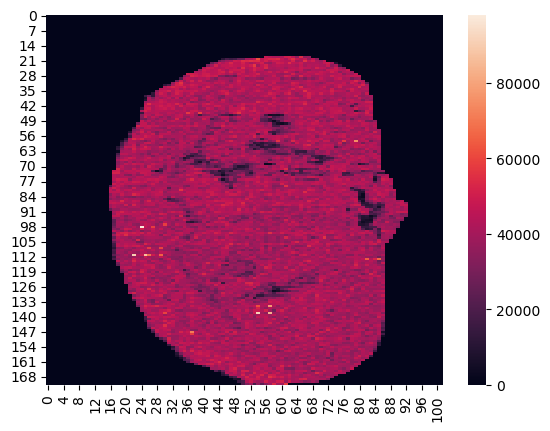

In [23]:
uniform_data_308_4_wt_s2_826_5699 = np.array(masked_metabolomics_matrix_308_4_wt_s2).T.reshape([num_metabolites_positive, len(coordinates_matrix_308_4_wt_s2[coordinates_matrix_308_4_wt_s2['x_coord'] == coordinates_matrix_308_4_wt_s2.iloc[0][0]]), len(coordinates_matrix_308_4_wt_s2[coordinates_matrix_308_4_wt_s2['y_coord'] == coordinates_matrix_308_4_wt_s2.iloc[0][1]])])[masked_metabolomics_matrix_308_4_wt_s2.columns.get_loc('826.5699')]
ax = sns.heatmap(uniform_data_308_4_wt_s2_826_5699)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_wt_6mo_group2_representative_image.tiff')
plt.show()

In [24]:
group3 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 3]
group3.index.tolist()

['556.2758',
 '594.2257',
 '848.6373',
 '789.6160',
 '766.5161',
 '833.5809',
 '786.5891',
 '758.5554',
 '829.5555',
 '788.5004',
 '838.6172',
 '771.5127',
 '807.5444',
 '768.5304',
 '797.5280',
 '864.6302',
 '812.5887',
 '805.5504',
 '785.5750',
 '767.5111',
 '753.5859',
 '787.4877',
 '866.6432',
 '849.6414',
 '754.5345',
 '740.4787',
 '780.5504',
 '809.5825',
 '770.5577',
 '775.5295',
 '804.4963',
 '723.4885',
 '812.5089',
 '816.5268',
 '534.2958',
 '732.5515',
 '871.5403',
 '713.4481',
 '772.8143',
 '876.5782',
 '789.4984',
 '731.6039',
 '799.1978',
 '823.5336',
 '857.5806',
 '865.6349',
 '854.6001',
 '792.5392',
 '852.6282',
 '835.5943',
 '852.5898',
 '798.9550',
 '791.5225',
 '839.6210',
 '850.6476',
 '762.4794',
 '836.6080',
 '803.4816',
 '736.5731',
 '851.5616',
 '744.4928',
 '787.5963',
 '763.5999',
 '891.6509',
 '799.0620',
 '854.5647',
 '430.3888',
 '778.4734',
 '741.4819',
 '875.5584',
 '818.5450',
 '790.6194',
 '800.8413',
 '162.1113',
 '771.5620',
 '402.3574',
 '776.5560',

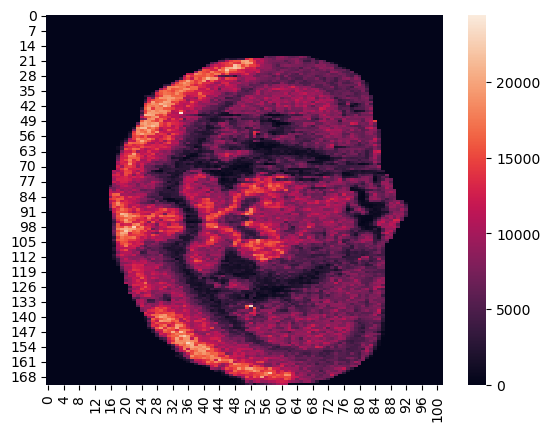

In [29]:
uniform_data_308_4_wt_s2_829_5555 = np.array(masked_metabolomics_matrix_308_4_wt_s2).T.reshape([num_metabolites_positive, len(coordinates_matrix_308_4_wt_s2[coordinates_matrix_308_4_wt_s2['x_coord'] == coordinates_matrix_308_4_wt_s2.iloc[0][0]]), len(coordinates_matrix_308_4_wt_s2[coordinates_matrix_308_4_wt_s2['y_coord'] == coordinates_matrix_308_4_wt_s2.iloc[0][1]])])[masked_metabolomics_matrix_308_4_wt_s2.columns.get_loc('829.5555')]
ax = sns.heatmap(uniform_data_308_4_wt_s2_829_5555)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_wt_6mo_group3_representative_image.tiff')
plt.show()

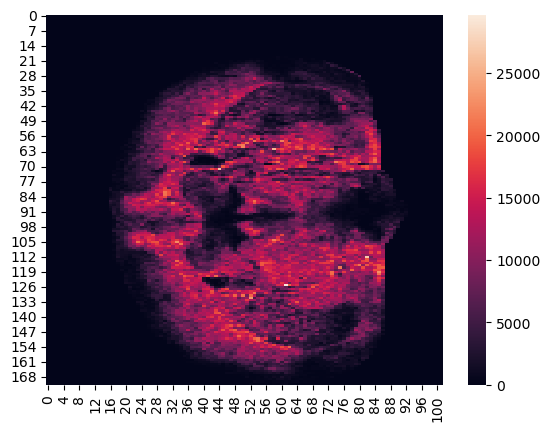

In [26]:
uniform_data_308_4_wt_s2_848_6373 = np.array(masked_metabolomics_matrix_308_4_wt_s2).T.reshape([num_metabolites_positive, len(coordinates_matrix_308_4_wt_s2[coordinates_matrix_308_4_wt_s2['x_coord'] == coordinates_matrix_308_4_wt_s2.iloc[0][0]]), len(coordinates_matrix_308_4_wt_s2[coordinates_matrix_308_4_wt_s2['y_coord'] == coordinates_matrix_308_4_wt_s2.iloc[0][1]])])[masked_metabolomics_matrix_308_4_wt_s2.columns.get_loc('848.6373')]
ax = sns.heatmap(uniform_data_308_4_wt_s2_848_6373)
plt.show()

In [30]:
group4 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 4]
group4.index.tolist()

['872.5533',
 '824.5541',
 '830.5179',
 '846.5317',
 '849.5583',
 '788.6133',
 '774.5279',
 '828.5633',
 '821.5270',
 '845.5255',
 '806.5375',
 '784.5687',
 '801.5493',
 '814.5267',
 '798.6175',
 '830.5249',
 '872.5522',
 '849.5557',
 '784.5704',
 '806.5431',
 '798.4781',
 '798.4766',
 '798.4778',
 '830.5167',
 '824.5541.1',
 '774.5284',
 '845.5255.1',
 '821.5264',
 '814.5253',
 '788.6134',
 '806.5353',
 '798.6143',
 '798.4866',
 '846.5306',
 '814.5215',
 '801.5499',
 '828.5601',
 '828.5564',
 '770.5082',
 '798.5341',
 '806.5272',
 '814.5294',
 '770.5105',
 '784.5714',
 '872.5441',
 '849.5539',
 '828.5579',
 '846.5321',
 '798.4943',
 '798.5750',
 '828.5645',
 '814.5319',
 '821.5266',
 '798.6179',
 '830.5266']

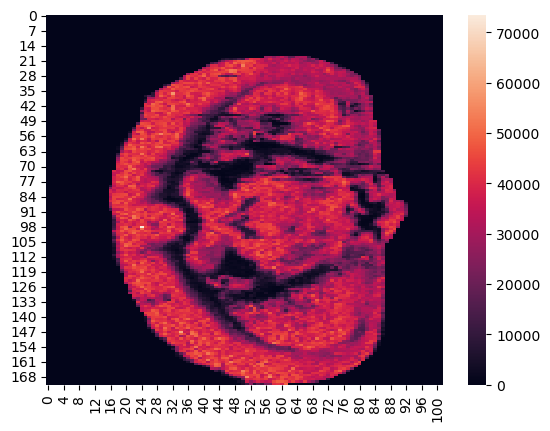

In [31]:
uniform_data_308_4_wt_s2_872_5533 = np.array(masked_metabolomics_matrix_308_4_wt_s2).T.reshape([num_metabolites_positive, len(coordinates_matrix_308_4_wt_s2[coordinates_matrix_308_4_wt_s2['x_coord'] == coordinates_matrix_308_4_wt_s2.iloc[0][0]]), len(coordinates_matrix_308_4_wt_s2[coordinates_matrix_308_4_wt_s2['y_coord'] == coordinates_matrix_308_4_wt_s2.iloc[0][1]])])[masked_metabolomics_matrix_308_4_wt_s2.columns.get_loc('872.5533')]
ax = sns.heatmap(uniform_data_308_4_wt_s2_872_5533)
plt.show()

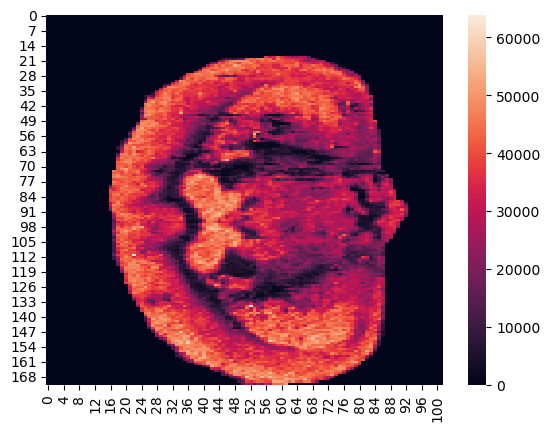

In [32]:
uniform_data_308_4_wt_s2_846_5317 = np.array(masked_metabolomics_matrix_308_4_wt_s2).T.reshape([num_metabolites_positive, len(coordinates_matrix_308_4_wt_s2[coordinates_matrix_308_4_wt_s2['x_coord'] == coordinates_matrix_308_4_wt_s2.iloc[0][0]]), len(coordinates_matrix_308_4_wt_s2[coordinates_matrix_308_4_wt_s2['y_coord'] == coordinates_matrix_308_4_wt_s2.iloc[0][1]])])[masked_metabolomics_matrix_308_4_wt_s2.columns.get_loc('846.5317')]
ax = sns.heatmap(uniform_data_308_4_wt_s2_846_5317)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_wt_6mo_group4_representative_image.tiff')
plt.show()

In [33]:
group5 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 5]
group5.index.tolist()

['800.5466',
 '798.5388',
 '773.5269',
 '848.5532',
 '783.5685',
 '820.5240',
 '810.5964',
 '844.5222',
 '756.5493',
 '827.5738',
 '734.5684',
 '734.5676',
 '799.5417',
 '800.5466.1',
 '820.5236',
 '827.5731',
 '783.5683',
 '844.5231',
 '772.5222',
 '810.5961',
 '800.5482',
 '756.5498',
 '734.5679',
 '800.5422',
 '848.5495',
 '772.5197',
 '773.5271',
 '848.5543',
 '799.5393',
 '798.5383',
 '820.5240.1',
 '783.5685.1',
 '810.5966',
 '800.5469']

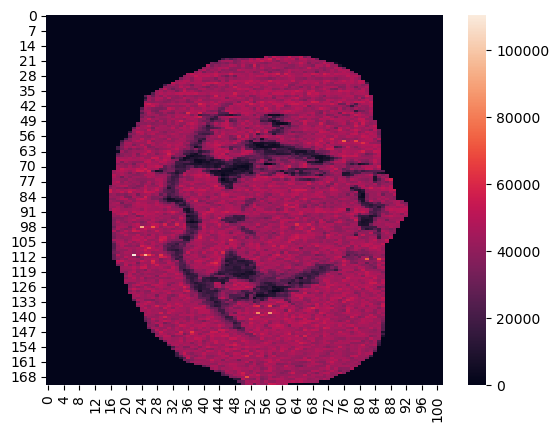

In [34]:
uniform_data_308_4_wt_s2_800_5466 = np.array(masked_metabolomics_matrix_308_4_wt_s2).T.reshape([num_metabolites_positive, len(coordinates_matrix_308_4_wt_s2[coordinates_matrix_308_4_wt_s2['x_coord'] == coordinates_matrix_308_4_wt_s2.iloc[0][0]]), len(coordinates_matrix_308_4_wt_s2[coordinates_matrix_308_4_wt_s2['y_coord'] == coordinates_matrix_308_4_wt_s2.iloc[0][1]])])[masked_metabolomics_matrix_308_4_wt_s2.columns.get_loc('800.5466')]
ax = sns.heatmap(uniform_data_308_4_wt_s2_800_5466)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_wt_6mo_group5_representative_image.tiff')
plt.show()

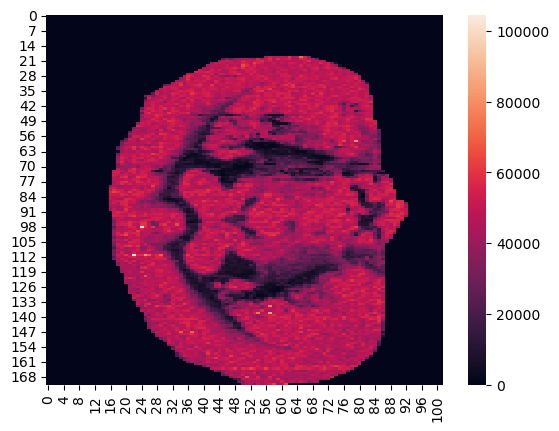

In [35]:
uniform_data_308_4_wt_s2_773_5269 = np.array(masked_metabolomics_matrix_308_4_wt_s2).T.reshape([num_metabolites_positive, len(coordinates_matrix_308_4_wt_s2[coordinates_matrix_308_4_wt_s2['x_coord'] == coordinates_matrix_308_4_wt_s2.iloc[0][0]]), len(coordinates_matrix_308_4_wt_s2[coordinates_matrix_308_4_wt_s2['y_coord'] == coordinates_matrix_308_4_wt_s2.iloc[0][1]])])[masked_metabolomics_matrix_308_4_wt_s2.columns.get_loc('773.5269')]
ax = sns.heatmap(uniform_data_308_4_wt_s2_773_5269)
plt.show()

In [36]:
group6 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 6]
group6.index.tolist()

['164.1285', '164.1327']

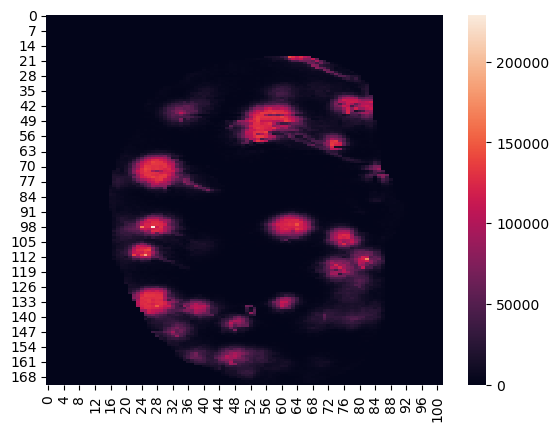

In [37]:
uniform_data_308_4_wt_s2_164_1285 = np.array(masked_metabolomics_matrix_308_4_wt_s2).T.reshape([num_metabolites_positive, len(coordinates_matrix_308_4_wt_s2[coordinates_matrix_308_4_wt_s2['x_coord'] == coordinates_matrix_308_4_wt_s2.iloc[0][0]]), len(coordinates_matrix_308_4_wt_s2[coordinates_matrix_308_4_wt_s2['y_coord'] == coordinates_matrix_308_4_wt_s2.iloc[0][1]])])[masked_metabolomics_matrix_308_4_wt_s2.columns.get_loc('164.1285')]
ax = sns.heatmap(uniform_data_308_4_wt_s2_164_1285)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_wt_6mo_group6_representative_image.tiff')
plt.show()

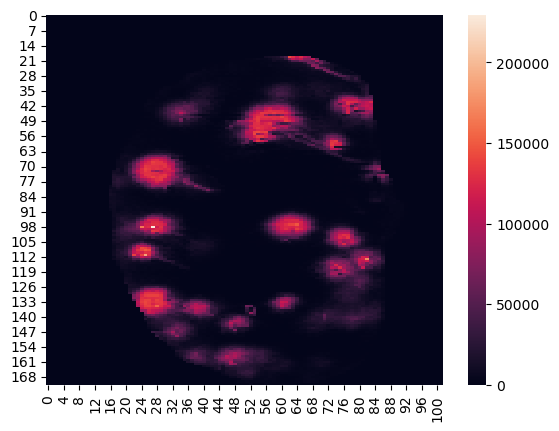

In [38]:
uniform_data_308_4_wt_s2_164_1327 = np.array(masked_metabolomics_matrix_308_4_wt_s2).T.reshape([num_metabolites_positive, len(coordinates_matrix_308_4_wt_s2[coordinates_matrix_308_4_wt_s2['x_coord'] == coordinates_matrix_308_4_wt_s2.iloc[0][0]]), len(coordinates_matrix_308_4_wt_s2[coordinates_matrix_308_4_wt_s2['y_coord'] == coordinates_matrix_308_4_wt_s2.iloc[0][1]])])[masked_metabolomics_matrix_308_4_wt_s2.columns.get_loc('164.1327')]
ax = sns.heatmap(uniform_data_308_4_wt_s2_164_1327)
plt.show()

<a class="anchor" id="Brain_12mowt"></a>
Below we import a brain for the 12 month wild type.

In [39]:
num_metabolites_positive = 10783
# Import metabolomics matrix only
masked_metabolomics_matrix_278_a2_wt_s2 = pd.read_csv('D:/All AGE Positive masks and roi sums/Whole Brains/278_a2_wt_s2_pixel_matrix_with_mask_whole_brain.csv', index_col = 0)
# Read in coordinates for metabolomics matrix
coordinates_matrix_278_a2_wt_s2 = pd.read_csv('D:/All AGE Positive TL/AL011223_AGE_278_a2_WT_s2_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])

Below we keep only the filtered ions.

In [40]:
filtered_ions_matrix_no_background = masked_metabolomics_matrix_278_a2_wt_s2.loc[(masked_metabolomics_matrix_278_a2_wt_s2.sum(axis=1) != 0), :]
filtered_ions_matrix_no_background_tranposed = filtered_ions_matrix_no_background.T
filtered_ions_matrix_no_background_tranposed

3907     3908     4043     4044     4045     4046     4176   \
556.2758   8056.0   3754.0   1753.0    983.0   1164.0   2217.0   7481.0   
760.5831  21450.0  36274.0  23604.0  20333.0  30648.0  18691.0  22349.0   
826.5699  14604.0  43116.0  13869.0  21573.0  38553.0  16608.0   5941.0   
782.5654  32658.0  53154.0  36798.0  37037.0  47622.0  27139.0  20127.0   
557.2783   3019.0   1408.0    362.0    236.0    364.0    552.0   1967.0   
...           ...      ...      ...      ...      ...      ...      ...   
911.5466     93.0    167.0     77.0     27.0    185.0    184.0     23.0   
525.2379    433.0    452.0      0.0      0.0     35.0      0.0     97.0   
510.2535   1360.0   3509.0      0.0    209.0    154.0    113.0    268.0   
881.5392     47.0    490.0    109.0    191.0    105.0    191.0     83.0   
922.4955    106.0     97.0     22.0    113.0     54.0     81.0     34.0   

            4177     4178     4179   ...    24756    24757    24758    24759  \
556.2758   3099.0   1913.0    877.0  ...    646.0    597.0   4116.0   1887.0   
760.5831  25195.0  28728.0  22763.0  ...  27671.0  26364.0  30518.0  29067.0   
826.5699  12725.0  16203.0  18059.0  ...  22226.0  17413.0  13182.0  13469.0   
782.5654  29607.0  36883.0  38450.0  ...  27830.0  28201.0  23342.0  22710.0   
557.2783   1091.0    472.0    342.0  ...    234.0    328.0   1350.0    656.0   
...           ...      ...      ...  ...      ...      ...      ...      ...   
911.5466     18.0    134.0      0.0  ...     49.0      0.0     41.0     22.0   
525.2379     87.0      0.0     41.0  ...      0.0     45.0     53.0      0.0   
510.2535     25.0      0.0      0.0  ...    200.0     82.0      0.0     33.0   
881.5392    193.0    137.0    394.0  ...    136.0    289.0    148.0     86.0   
922.4955     55.0     26.0     82.0  ...     20.0     44.0      0.0      0.0   

            24872    24873    24874    24875    24876    25011  
556.2758   1619.0    618.0   1330.0    703.0    750.0   6995.0  
760.5831  22809.0  30083.0  26562.0  19902.0  15620.0  23932.0  
826.5699  49858.0  39456.0  33207.0  24324.0  12662.0  29939.0  
782.5654  51281.0  51324.0  38188.0  35832.0  28451.0  40334.0  
557.2783    483.0      0.0    166.0    112.0    246.0   2335.0  
...           ...      ...      ...      ...      ...      ...  
911.5466    282.0     58.0     56.0     50.0     32.0     70.0  
525.2379      0.0      0.0      0.0      0.0      0.0      0.0  
510.2535    203.0    236.0      0.0      0.0      0.0      0.0  
881.5392    153.0    284.0     92.0    166.0     65.0     61.0  
922.4955    318.0    246.0     79.0    125.0     60.0      0.0  

[10783 rows x 8805 columns]

Below we run kmeans on the pixels to find general patterns with 7 groups because that is what we saw in HDI.

C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


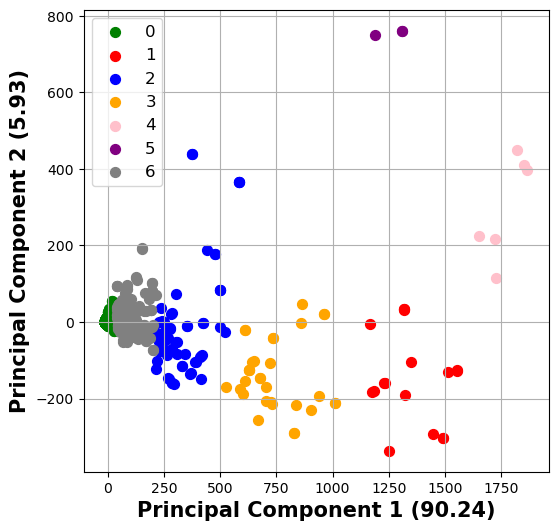

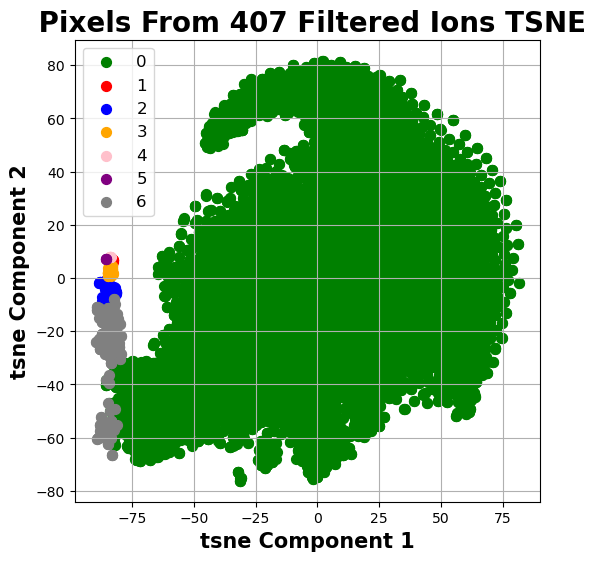

ValueError: cannot assign slice from input of different size

<Figure size 600x600 with 0 Axes>

In [41]:
# Standardize data
filtered_ions_matrix_no_background_tranposed_standardized = StandardScaler().fit_transform(filtered_ions_matrix_no_background_tranposed)

kmeans = KMeans(n_clusters=7, 
                    random_state=1)
kmeans.fit(filtered_ions_matrix_no_background_tranposed_standardized)
number_of_clusters = 7
clusterlabels = kmeans.labels_

# Specify plot type
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
principalDf_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf_pca['phenotype'] = clusterlabels
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(f'Principal Component 1 ({percent_variance[0]})', fontsize = 15, fontweight = 'bold')
ax.set_ylabel(f'Principal Component 2 ({percent_variance[1]})', fontsize = 15, fontweight = 'bold')
#ax.set_title(' Pixels From 407 Filtered Ions PCA', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf_pca['phenotype'] == group
    ax.scatter(principalDf_pca.loc[indicesToKeep, 'principal component 1']
               , principalDf_pca.loc[indicesToKeep, 'principal component 2'] 
               , c = color
               , s = 50)
ax.legend(labels, fontsize = 'large')
ax.grid()
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_wt_12mo_ion_clustering_pca.tiff')
plt.show()


tsne = TSNE(n_components=2, random_state = 100)
tsne_components = tsne.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
principalDf = pd.DataFrame(data = tsne_components, columns = ['tsne component 1', 'tsne component 2'])
principalDf['phenotype'] = clusterlabels
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne Component 1', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('tsne Component 2', fontsize = 15, fontweight = 'bold')
ax.set_title(' Pixels From 407 Filtered Ions TSNE', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf['phenotype'] == group
    ax.scatter(principalDf.loc[indicesToKeep, 'tsne component 1']
               , principalDf.loc[indicesToKeep, 'tsne component 2'] 
               , c = color
               , s = 50, alpha = 1)
ax.legend(labels, fontsize = 'large')
# Scatter 301
#plt.scatter(3.936206, 2.881305, color = 'black')
ax.grid()
plt.show()

plt.figure(figsize = (6, 6))
reducer = umap.UMAP()
embedding = reducer.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
embedding_df = pd.DataFrame(embedding)
embedding_df['phenotype'] = clusterlabels
embedding_df['phenotype'] = embedding_df['phenotype'].replace({0 : '0', 1 : '1', 2 : '2', 3 : '3', 4: '4', 5: '5', 6 : '6'})

sns.scatterplot(data = embedding_df, hue = 'phenotype', x = 0, y = 1, alpha = 0.3)
plt.title('UMAP projection of Pixels From 407 Filtered Ions', fontsize=12)


Below we add the labels

In [42]:
filtered_ions_matrix_no_background_tranposed['labels'] = clusterlabels
filtered_ions_matrix_no_background_tranposed

3907     3908     4043     4044     4045     4046     4176  \
556.2758   8056.0   3754.0   1753.0    983.0   1164.0   2217.0   7481.0   
760.5831  21450.0  36274.0  23604.0  20333.0  30648.0  18691.0  22349.0   
826.5699  14604.0  43116.0  13869.0  21573.0  38553.0  16608.0   5941.0   
782.5654  32658.0  53154.0  36798.0  37037.0  47622.0  27139.0  20127.0   
557.2783   3019.0   1408.0    362.0    236.0    364.0    552.0   1967.0   
...           ...      ...      ...      ...      ...      ...      ...   
911.5466     93.0    167.0     77.0     27.0    185.0    184.0     23.0   
525.2379    433.0    452.0      0.0      0.0     35.0      0.0     97.0   
510.2535   1360.0   3509.0      0.0    209.0    154.0    113.0    268.0   
881.5392     47.0    490.0    109.0    191.0    105.0    191.0     83.0   
922.4955    106.0     97.0     22.0    113.0     54.0     81.0     34.0   

             4177     4178     4179  ...    24757    24758    24759    24872  \
556.2758   3099.0   1913.0    877.0  ...    597.0   4116.0   1887.0   1619.0   
760.5831  25195.0  28728.0  22763.0  ...  26364.0  30518.0  29067.0  22809.0   
826.5699  12725.0  16203.0  18059.0  ...  17413.0  13182.0  13469.0  49858.0   
782.5654  29607.0  36883.0  38450.0  ...  28201.0  23342.0  22710.0  51281.0   
557.2783   1091.0    472.0    342.0  ...    328.0   1350.0    656.0    483.0   
...           ...      ...      ...  ...      ...      ...      ...      ...   
911.5466     18.0    134.0      0.0  ...      0.0     41.0     22.0    282.0   
525.2379     87.0      0.0     41.0  ...     45.0     53.0      0.0      0.0   
510.2535     25.0      0.0      0.0  ...     82.0      0.0     33.0    203.0   
881.5392    193.0    137.0    394.0  ...    289.0    148.0     86.0    153.0   
922.4955     55.0     26.0     82.0  ...     44.0      0.0      0.0    318.0   

            24873    24874    24875    24876    25011  labels  
556.2758    618.0   1330.0    703.0    750.0   6995.0       6  
760.5831  30083.0  26562.0  19902.0  15620.0  23932.0       5  
826.5699  39456.0  33207.0  24324.0  12662.0  29939.0       3  
782.5654  51324.0  38188.0  35832.0  28451.0  40334.0       1  
557.2783      0.0    166.0    112.0    246.0   2335.0       0  
...           ...      ...      ...      ...      ...     ...  
911.5466     58.0     56.0     50.0     32.0     70.0       0  
525.2379      0.0      0.0      0.0      0.0      0.0       0  
510.2535    236.0      0.0      0.0      0.0      0.0       0  
881.5392    284.0     92.0    166.0     65.0     61.0       0  
922.4955    246.0     79.0    125.0     60.0      0.0       0  

[10783 rows x 8806 columns]

Below we look at representative ion images from each cluster.

In [43]:
group0 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 0]
group0.index.tolist()

['557.2783',
 '578.2553',
 '149.0228',
 '163.0387',
 '594.2257',
 '297.6156',
 '558.2799',
 '445.1249',
 '335.1248',
 '579.2580',
 '536.1653',
 '413.2739',
 '556.5202',
 '864.6302',
 '173.0789',
 '600.2353',
 '217.1045',
 '239.1611',
 '171.1438',
 '610.1793',
 '805.5504',
 '295.1932',
 '753.5859',
 '866.6432',
 '849.6414',
 '595.2278',
 '754.5345',
 '780.5504',
 '298.1170',
 '425.2925',
 '804.4963',
 '723.4885',
 '812.5089',
 '301.1404',
 '446.1249',
 '161.0956',
 '537.1653',
 '357.2024',
 '713.4481',
 '365.1043',
 '519.1394',
 '772.8143',
 '876.5782',
 '323.2241',
 '789.4984',
 '429.0930',
 '731.6039',
 '799.1978',
 '663.4477',
 '823.5336',
 '857.5806',
 '865.6349',
 '854.6001',
 '792.5392',
 '852.6282',
 '556.6204',
 '835.5943',
 '852.5898',
 '798.9550',
 '791.5225',
 '150.0257',
 '839.6210',
 '850.6476',
 '762.4794',
 '836.6080',
 '611.1793',
 '245.0775',
 '803.4816',
 '136.0207',
 '538.1631',
 '736.5731',
 '851.5616',
 '782.8572',
 '794.5442',
 '447.1238',
 '750.5374',
 '556.8314',

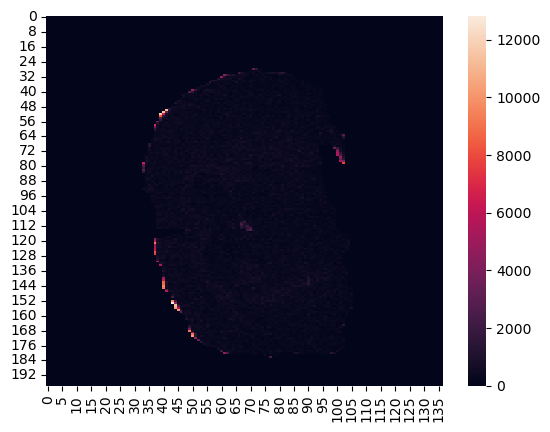

In [44]:
uniform_data_278_a2_wt_s2_557_2783 = np.array(masked_metabolomics_matrix_278_a2_wt_s2).T.reshape([num_metabolites_positive, len(coordinates_matrix_278_a2_wt_s2[coordinates_matrix_278_a2_wt_s2['x_coord'] == coordinates_matrix_278_a2_wt_s2.iloc[0][0]]), len(coordinates_matrix_278_a2_wt_s2[coordinates_matrix_278_a2_wt_s2['y_coord'] == coordinates_matrix_278_a2_wt_s2.iloc[0][1]])])[masked_metabolomics_matrix_278_a2_wt_s2.columns.get_loc('557.2783')]
ax = sns.heatmap(uniform_data_278_a2_wt_s2_557_2783)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_wt_12mo_group0_representative_image.tiff')
plt.show()

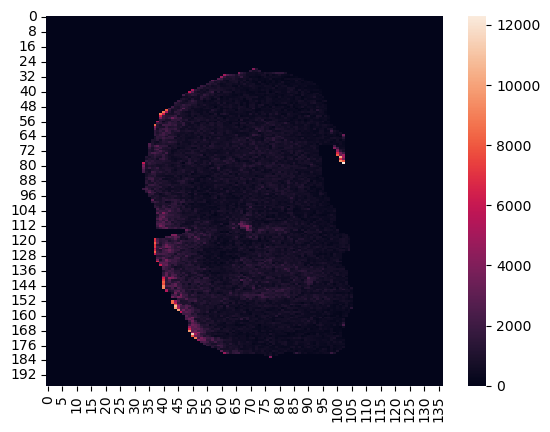

In [45]:
uniform_data_278_a2_wt_s2_149_0228 = np.array(masked_metabolomics_matrix_278_a2_wt_s2).T.reshape([num_metabolites_positive, len(coordinates_matrix_278_a2_wt_s2[coordinates_matrix_278_a2_wt_s2['x_coord'] == coordinates_matrix_278_a2_wt_s2.iloc[0][0]]), len(coordinates_matrix_278_a2_wt_s2[coordinates_matrix_278_a2_wt_s2['y_coord'] == coordinates_matrix_278_a2_wt_s2.iloc[0][1]])])[masked_metabolomics_matrix_278_a2_wt_s2.columns.get_loc('149.0228')]
ax = sns.heatmap(uniform_data_278_a2_wt_s2_149_0228)
plt.show()

In [46]:
group1 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 1]
group1.index.tolist()

['782.5654',
 '799.5425',
 '772.5239',
 '798.5388',
 '798.5389',
 '782.5656',
 '799.5437',
 '799.5417',
 '772.5237',
 '799.5430',
 '782.5656.1',
 '772.5222',
 '772.5246',
 '799.5437.1',
 '782.5666',
 '799.5393',
 '798.5383']

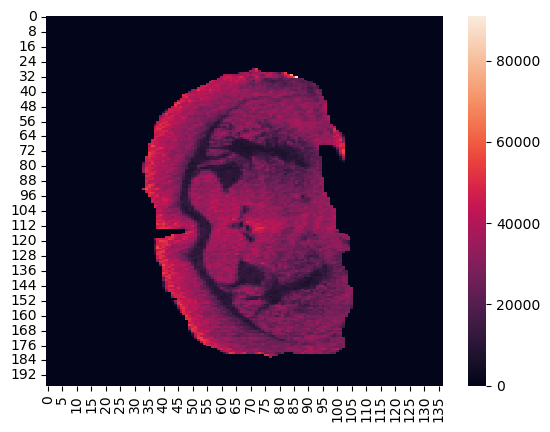

In [47]:
uniform_data_278_a2_wt_s2_782_5654 = np.array(masked_metabolomics_matrix_278_a2_wt_s2).T.reshape([num_metabolites_positive, len(coordinates_matrix_278_a2_wt_s2[coordinates_matrix_278_a2_wt_s2['x_coord'] == coordinates_matrix_278_a2_wt_s2.iloc[0][0]]), len(coordinates_matrix_278_a2_wt_s2[coordinates_matrix_278_a2_wt_s2['y_coord'] == coordinates_matrix_278_a2_wt_s2.iloc[0][1]])])[masked_metabolomics_matrix_278_a2_wt_s2.columns.get_loc('782.5654')]
ax = sns.heatmap(uniform_data_278_a2_wt_s2_782_5654)
plt.show()

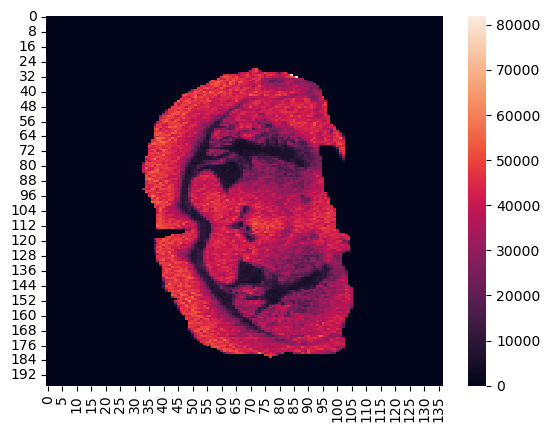

In [48]:
uniform_data_278_a2_wt_s2_799_5425 = np.array(masked_metabolomics_matrix_278_a2_wt_s2).T.reshape([num_metabolites_positive, len(coordinates_matrix_278_a2_wt_s2[coordinates_matrix_278_a2_wt_s2['x_coord'] == coordinates_matrix_278_a2_wt_s2.iloc[0][0]]), len(coordinates_matrix_278_a2_wt_s2[coordinates_matrix_278_a2_wt_s2['y_coord'] == coordinates_matrix_278_a2_wt_s2.iloc[0][1]])])[masked_metabolomics_matrix_278_a2_wt_s2.columns.get_loc('799.5425')]
ax = sns.heatmap(uniform_data_278_a2_wt_s2_799_5425)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_wt_12mo_group1_representative_image.tiff')
plt.show()

In [49]:
group2 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 2]
group2.index.tolist()

['810.5964',
 '827.5738',
 '761.5864',
 '734.5684',
 '872.5533',
 '824.5541',
 '830.5179',
 '849.5583',
 '788.6133',
 '774.5279',
 '828.5633',
 '821.5270',
 '845.5255',
 '806.5375',
 '784.5687',
 '801.5493',
 '757.5522',
 '770.5109',
 '814.5267',
 '798.6175',
 '847.5345',
 '296.0660',
 '734.5676',
 '830.5249',
 '872.5522',
 '849.5557',
 '770.5098',
 '784.5704',
 '806.5431',
 '798.4781',
 '798.4778',
 '827.5731',
 '783.5683',
 '810.5961',
 '830.5167',
 '761.5866',
 '824.5541.1',
 '774.5284',
 '845.5255.1',
 '821.5264',
 '814.5253',
 '788.6134',
 '806.5353',
 '798.6143',
 '798.4866',
 '826.5671',
 '734.5679',
 '814.5215',
 '847.5339',
 '801.5499',
 '828.5601',
 '828.5564',
 '798.5341',
 '806.5272',
 '814.5294',
 '784.5714',
 '872.5441',
 '849.5539',
 '847.5351',
 '828.5579',
 '798.4943',
 '734.5393',
 '828.5645',
 '814.5319',
 '761.5863',
 '810.5966',
 '821.5266',
 '798.6179',
 '757.5521',
 '830.5266']

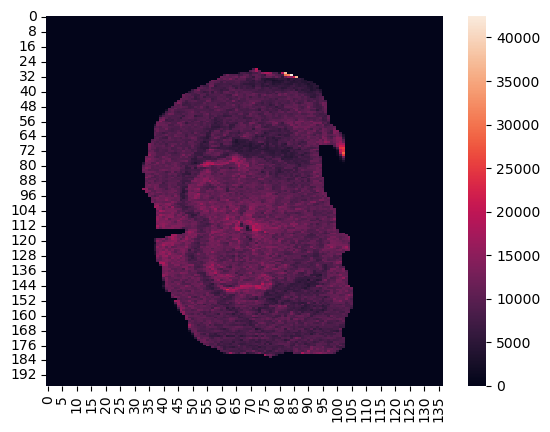

In [50]:
uniform_data_278_a2_wt_s2_810_5964 = np.array(masked_metabolomics_matrix_278_a2_wt_s2).T.reshape([num_metabolites_positive, len(coordinates_matrix_278_a2_wt_s2[coordinates_matrix_278_a2_wt_s2['x_coord'] == coordinates_matrix_278_a2_wt_s2.iloc[0][0]]), len(coordinates_matrix_278_a2_wt_s2[coordinates_matrix_278_a2_wt_s2['y_coord'] == coordinates_matrix_278_a2_wt_s2.iloc[0][1]])])[masked_metabolomics_matrix_278_a2_wt_s2.columns.get_loc('810.5964')]
ax = sns.heatmap(uniform_data_278_a2_wt_s2_810_5964)
plt.show()

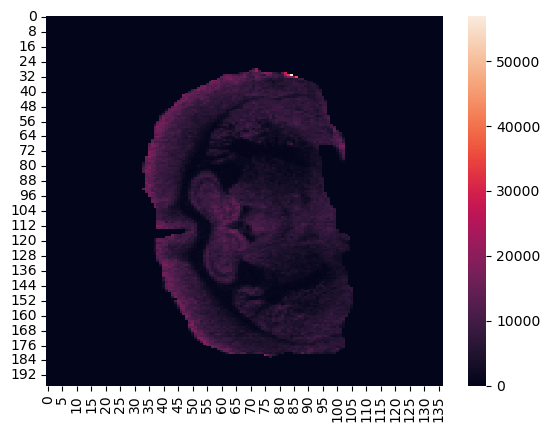

In [54]:
uniform_data_278_a2_wt_s2_761_5864 = np.array(masked_metabolomics_matrix_278_a2_wt_s2).T.reshape([num_metabolites_positive, len(coordinates_matrix_278_a2_wt_s2[coordinates_matrix_278_a2_wt_s2['x_coord'] == coordinates_matrix_278_a2_wt_s2.iloc[0][0]]), len(coordinates_matrix_278_a2_wt_s2[coordinates_matrix_278_a2_wt_s2['y_coord'] == coordinates_matrix_278_a2_wt_s2.iloc[0][1]])])[masked_metabolomics_matrix_278_a2_wt_s2.columns.get_loc('757.5522')]
ax = sns.heatmap(uniform_data_278_a2_wt_s2_761_5864)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_wt_12mo_group2_representative_image.tiff')
plt.show()

In [55]:
group3 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 3]
group3.index.tolist()

['826.5699',
 '800.5466',
 '773.5269',
 '848.5532',
 '783.5685',
 '820.5240',
 '844.5222',
 '756.5493',
 '846.5317',
 '800.5466.1',
 '820.5236',
 '844.5231',
 '800.5482',
 '756.5498',
 '799.5392',
 '798.5355',
 '800.5422',
 '848.5495',
 '782.5619',
 '846.5306',
 '772.5197',
 '826.5706',
 '773.5271',
 '848.5543',
 '826.5671.1',
 '782.5605',
 '798.5410',
 '846.5321',
 '798.5750',
 '820.5240.1',
 '783.5685.1',
 '800.5469']

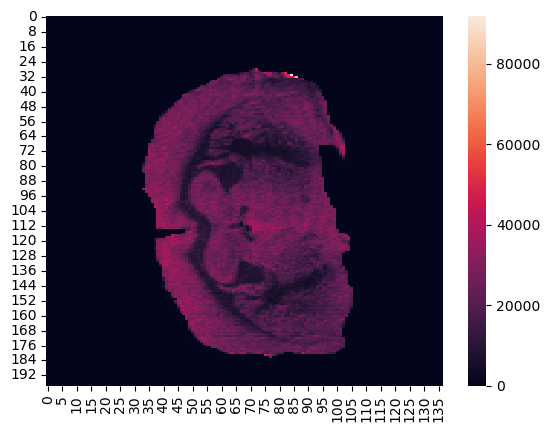

In [56]:
uniform_data_278_a2_wt_s2_826_5699 = np.array(masked_metabolomics_matrix_278_a2_wt_s2).T.reshape([num_metabolites_positive, len(coordinates_matrix_278_a2_wt_s2[coordinates_matrix_278_a2_wt_s2['x_coord'] == coordinates_matrix_278_a2_wt_s2.iloc[0][0]]), len(coordinates_matrix_278_a2_wt_s2[coordinates_matrix_278_a2_wt_s2['y_coord'] == coordinates_matrix_278_a2_wt_s2.iloc[0][1]])])[masked_metabolomics_matrix_278_a2_wt_s2.columns.get_loc('826.5699')]
ax = sns.heatmap(uniform_data_278_a2_wt_s2_826_5699)
plt.show()

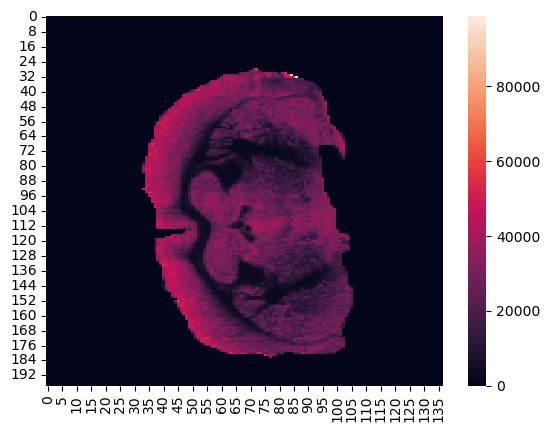

In [57]:
uniform_data_278_a2_wt_s2_800_5466 = np.array(masked_metabolomics_matrix_278_a2_wt_s2).T.reshape([num_metabolites_positive, len(coordinates_matrix_278_a2_wt_s2[coordinates_matrix_278_a2_wt_s2['x_coord'] == coordinates_matrix_278_a2_wt_s2.iloc[0][0]]), len(coordinates_matrix_278_a2_wt_s2[coordinates_matrix_278_a2_wt_s2['y_coord'] == coordinates_matrix_278_a2_wt_s2.iloc[0][1]])])[masked_metabolomics_matrix_278_a2_wt_s2.columns.get_loc('800.5466')]
ax = sns.heatmap(uniform_data_278_a2_wt_s2_800_5466)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_wt_12mo_group3_representative_image.tiff')
plt.show()

In [58]:
group4 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 4]
group4.index.tolist()

['798.5390', '798.5506', '798.5400', '798.5396', '798.5383.1', '798.5414']

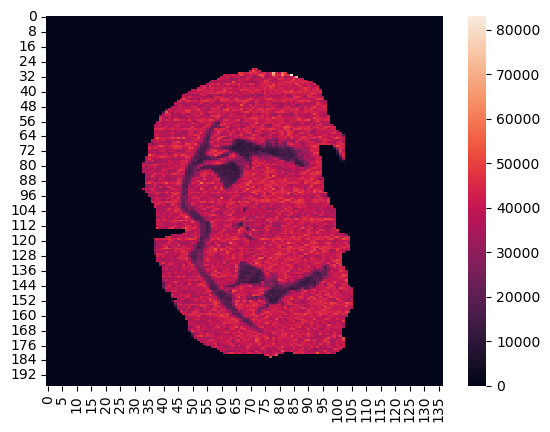

In [59]:
uniform_data_278_a2_wt_s2_798_5390 = np.array(masked_metabolomics_matrix_278_a2_wt_s2).T.reshape([num_metabolites_positive, len(coordinates_matrix_278_a2_wt_s2[coordinates_matrix_278_a2_wt_s2['x_coord'] == coordinates_matrix_278_a2_wt_s2.iloc[0][0]]), len(coordinates_matrix_278_a2_wt_s2[coordinates_matrix_278_a2_wt_s2['y_coord'] == coordinates_matrix_278_a2_wt_s2.iloc[0][1]])])[masked_metabolomics_matrix_278_a2_wt_s2.columns.get_loc('798.5390')]
ax = sns.heatmap(uniform_data_278_a2_wt_s2_798_5390)
plt.show()

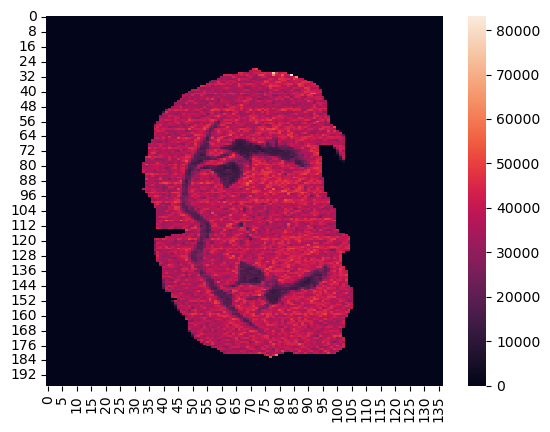

In [60]:
uniform_data_278_a2_wt_s2_798_5396 = np.array(masked_metabolomics_matrix_278_a2_wt_s2).T.reshape([num_metabolites_positive, len(coordinates_matrix_278_a2_wt_s2[coordinates_matrix_278_a2_wt_s2['x_coord'] == coordinates_matrix_278_a2_wt_s2.iloc[0][0]]), len(coordinates_matrix_278_a2_wt_s2[coordinates_matrix_278_a2_wt_s2['y_coord'] == coordinates_matrix_278_a2_wt_s2.iloc[0][1]])])[masked_metabolomics_matrix_278_a2_wt_s2.columns.get_loc('798.5396')]
ax = sns.heatmap(uniform_data_278_a2_wt_s2_798_5396)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_wt_12mo_group4_representative_image.tiff')
plt.show()

In [61]:
group5 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 5]
group5.index.tolist()

['760.5831', '760.5847', '760.5849']

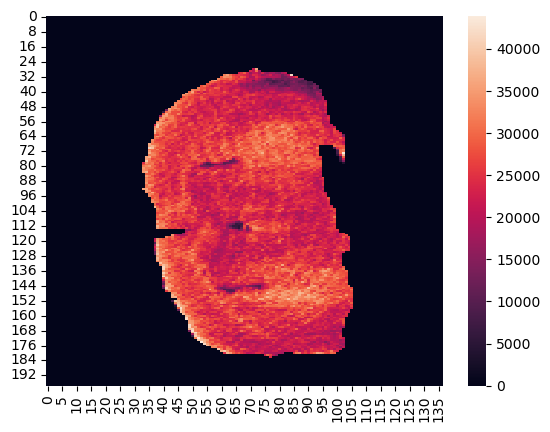

In [62]:
uniform_data_278_a2_wt_s2_760_5831 = np.array(masked_metabolomics_matrix_278_a2_wt_s2).T.reshape([num_metabolites_positive, len(coordinates_matrix_278_a2_wt_s2[coordinates_matrix_278_a2_wt_s2['x_coord'] == coordinates_matrix_278_a2_wt_s2.iloc[0][0]]), len(coordinates_matrix_278_a2_wt_s2[coordinates_matrix_278_a2_wt_s2['y_coord'] == coordinates_matrix_278_a2_wt_s2.iloc[0][1]])])[masked_metabolomics_matrix_278_a2_wt_s2.columns.get_loc('760.5831')]
ax = sns.heatmap(uniform_data_278_a2_wt_s2_760_5831)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_wt_12mo_group5_representative_image.tiff')
plt.show()

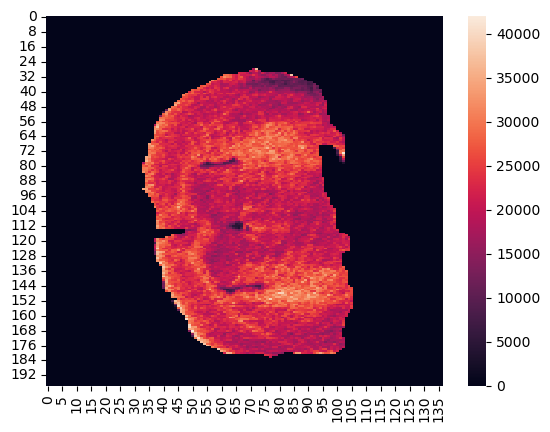

In [63]:
uniform_data_278_a2_wt_s2_760_5847 = np.array(masked_metabolomics_matrix_278_a2_wt_s2).T.reshape([num_metabolites_positive, len(coordinates_matrix_278_a2_wt_s2[coordinates_matrix_278_a2_wt_s2['x_coord'] == coordinates_matrix_278_a2_wt_s2.iloc[0][0]]), len(coordinates_matrix_278_a2_wt_s2[coordinates_matrix_278_a2_wt_s2['y_coord'] == coordinates_matrix_278_a2_wt_s2.iloc[0][1]])])[masked_metabolomics_matrix_278_a2_wt_s2.columns.get_loc('760.5847')]
ax = sns.heatmap(uniform_data_278_a2_wt_s2_760_5847)
plt.show()

In [64]:
group6 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 6]
group6.index.tolist()

['556.2758',
 '832.5750',
 '811.5994',
 '804.5469',
 '796.5256',
 '873.5563',
 '822.5305',
 '808.5762',
 '735.5709',
 '762.5927',
 '850.5593',
 '825.5574',
 '831.5212',
 '769.5609',
 '786.4899',
 '834.5881',
 '848.6373',
 '798.8399',
 '789.6160',
 '790.5199',
 '870.5369',
 '766.5161',
 '739.4666',
 '833.5809',
 '856.5775',
 '786.5891',
 '874.5556',
 '132.0765',
 '758.5554',
 '802.4776',
 '829.5555',
 '788.5004',
 '838.6172',
 '771.5127',
 '807.5444',
 '815.5294',
 '802.5543',
 '768.5304',
 '797.5280',
 '812.5887',
 '785.5750',
 '767.5111',
 '787.4877',
 '740.4787',
 '809.5825',
 '770.5577',
 '775.5295',
 '816.5268',
 '534.2958',
 '732.5515',
 '871.5403',
 '369.3506',
 '762.5934',
 '740.4813',
 '815.5321',
 '735.5701',
 '848.6346',
 '758.5541',
 '786.4899.1',
 '802.4747',
 '812.5889',
 '807.5502',
 '771.5119',
 '870.5354',
 '856.5755',
 '833.5806',
 '874.5531',
 '788.5003',
 '816.5302',
 '836.6031',
 '762.5927.1',
 '804.5458',
 '790.5189',
 '787.4874',
 '797.5267',
 '804.4874',
 '760.54

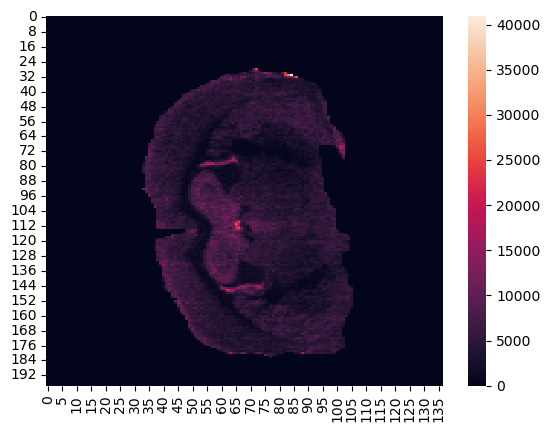

In [66]:
uniform_data_278_a2_wt_s2_832_5750 = np.array(masked_metabolomics_matrix_278_a2_wt_s2).T.reshape([num_metabolites_positive, len(coordinates_matrix_278_a2_wt_s2[coordinates_matrix_278_a2_wt_s2['x_coord'] == coordinates_matrix_278_a2_wt_s2.iloc[0][0]]), len(coordinates_matrix_278_a2_wt_s2[coordinates_matrix_278_a2_wt_s2['y_coord'] == coordinates_matrix_278_a2_wt_s2.iloc[0][1]])])[masked_metabolomics_matrix_278_a2_wt_s2.columns.get_loc('832.5750')]
ax = sns.heatmap(uniform_data_278_a2_wt_s2_832_5750)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_wt_12mo_group6_representative_image.tiff')
plt.show()

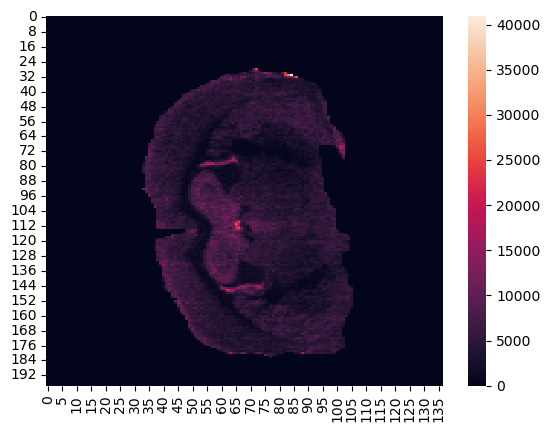

In [65]:
uniform_data_278_a2_wt_s2_832_5750 = np.array(masked_metabolomics_matrix_278_a2_wt_s2).T.reshape([num_metabolites_positive, len(coordinates_matrix_278_a2_wt_s2[coordinates_matrix_278_a2_wt_s2['x_coord'] == coordinates_matrix_278_a2_wt_s2.iloc[0][0]]), len(coordinates_matrix_278_a2_wt_s2[coordinates_matrix_278_a2_wt_s2['y_coord'] == coordinates_matrix_278_a2_wt_s2.iloc[0][1]])])[masked_metabolomics_matrix_278_a2_wt_s2.columns.get_loc('832.5750')]
ax = sns.heatmap(uniform_data_278_a2_wt_s2_832_5750)
plt.show()

<a class="anchor" id="Brain_22mowt"></a>
Below we import a brain for the 22 month wild type.

In [67]:
num_metabolites_positive = 10783
# Import metabolomics matrix only
masked_metabolomics_matrix_268_a3_WT_s3 = pd.read_csv('D:/All AGE Positive masks and roi sums/Whole Brains/268_a3_WT_s3_pixel_matrix_with_mask_whole_brain.csv', index_col = 0)
# Read in coordinates for metabolomics matrix
coordinates_matrix_268_a3_WT_s3 = pd.read_csv('D:/All AGE Positive TL/AL011323_AGE_268_a3_WT_s3_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])

Below we keep only the filtered ions.

In [68]:
filtered_ions_matrix_no_background = masked_metabolomics_matrix_268_a3_WT_s3.loc[(masked_metabolomics_matrix_268_a3_WT_s3.sum(axis=1) != 0), :]
filtered_ions_matrix_no_background_tranposed = filtered_ions_matrix_no_background.T
filtered_ions_matrix_no_background_tranposed

3777     3778     3779     3780     3781     3782     3783   \
556.2758  12883.0  12702.0   9796.0   5857.0   9108.0  18263.0  22502.0   
760.5831  26585.0  15339.0  24861.0  32030.0  16433.0   1670.0    740.0   
826.5699  12821.0   6388.0  12618.0  23268.0   8861.0   1030.0    605.0   
782.5654  36825.0  21942.0  32310.0  46612.0  25577.0   5769.0   2822.0   
557.2783   3722.0   4721.0   3371.0   1313.0   2805.0   6136.0   7197.0   
...           ...      ...      ...      ...      ...      ...      ...   
911.5466     36.0     66.0     91.0    130.0     61.0     18.0     16.0   
525.2379    247.0     39.0    168.0      0.0      0.0      0.0     45.0   
510.2535      0.0      0.0      0.0     40.0      0.0     31.0      0.0   
881.5392    370.0     69.0    189.0    220.0     76.0     68.0      0.0   
922.4955     47.0      0.0     18.0     78.0     51.0     24.0      0.0   

            3784     3914     3915   ...    25975    25976    25977    25978  \
556.2758  24048.0   2420.0   2933.0  ...   2576.0   1347.0   2440.0   4407.0   
760.5831    103.0  48666.0  35697.0  ...  40292.0  53431.0  44652.0  31343.0   
826.5699    500.0  37949.0  22445.0  ...  31377.0  43161.0  32890.0  23626.0   
782.5654   1022.0  54305.0  43517.0  ...  48561.0  51203.0  40328.0  38980.0   
557.2783   7578.0    808.0   1102.0  ...   1065.0    589.0    811.0   1215.0   
...           ...      ...      ...  ...      ...      ...      ...      ...   
911.5466      0.0    155.0     25.0  ...     65.0    229.0    150.0     47.0   
525.2379      0.0      0.0      0.0  ...      0.0      0.0      0.0     55.0   
510.2535      0.0      0.0      0.0  ...     23.0      0.0      0.0      0.0   
881.5392      0.0    264.0    232.0  ...     87.0    124.0     38.0    173.0   
922.4955     42.0     48.0    218.0  ...     51.0    100.0    142.0     51.0   

            25979    25980    26113    26114    26115    26116  
556.2758   2850.0  11916.0   7606.0   8962.0  13879.0  14550.0  
760.5831  39270.0  18639.0  27410.0  28606.0  10695.0  14145.0  
826.5699  27367.0  10564.0  13938.0  10129.0   6697.0   7042.0  
782.5654  42926.0  24199.0  24926.0  27998.0  16738.0  13345.0  
557.2783    956.0   3492.0   2476.0   2116.0   3898.0   4936.0  
...           ...      ...      ...      ...      ...      ...  
911.5466    104.0     22.0     20.0      0.0     19.0     88.0  
525.2379      0.0      0.0      0.0      0.0      0.0      0.0  
510.2535      0.0      0.0      0.0      0.0      0.0      0.0  
881.5392     49.0    180.0    264.0    178.0     88.0     48.0  
922.4955     62.0     10.0     51.0     58.0      0.0     64.0  

[10783 rows x 9745 columns]

Below we run kmeans on the pixels to find general patterns with 7 groups because that is what we saw in HDI.

C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


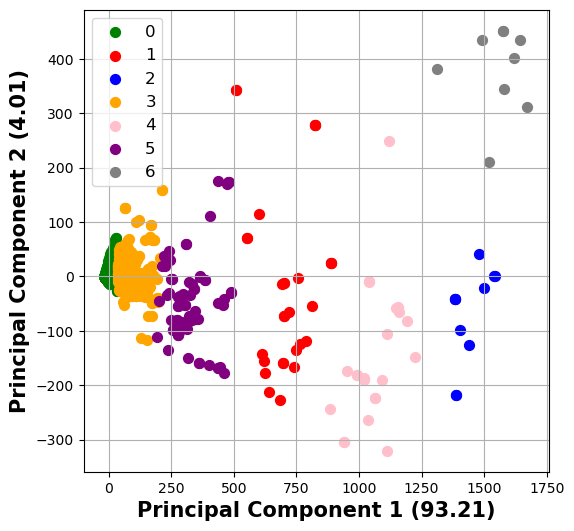

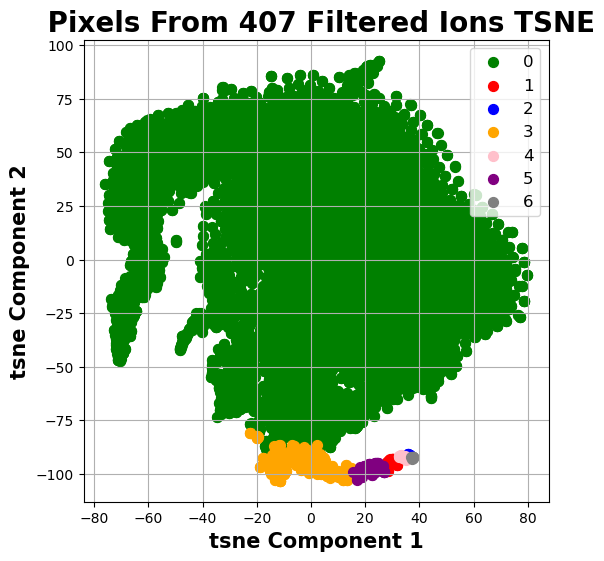

ValueError: cannot assign slice from input of different size

<Figure size 600x600 with 0 Axes>

In [69]:
# Standardize data
filtered_ions_matrix_no_background_tranposed_standardized = StandardScaler().fit_transform(filtered_ions_matrix_no_background_tranposed)

kmeans = KMeans(n_clusters=7, 
                    random_state=1)
kmeans.fit(filtered_ions_matrix_no_background_tranposed_standardized)
number_of_clusters = 7
clusterlabels = kmeans.labels_

# Specify plot type
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
principalDf_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf_pca['phenotype'] = clusterlabels
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(f'Principal Component 1 ({percent_variance[0]})', fontsize = 15, fontweight = 'bold')
ax.set_ylabel(f'Principal Component 2 ({percent_variance[1]})', fontsize = 15, fontweight = 'bold')
#ax.set_title(' Pixels From 407 Filtered Ions PCA', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf_pca['phenotype'] == group
    ax.scatter(principalDf_pca.loc[indicesToKeep, 'principal component 1']
               , principalDf_pca.loc[indicesToKeep, 'principal component 2'] 
               , c = color
               , s = 50)
ax.legend(labels, fontsize = 'large')
ax.grid()
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_wt_22mo_ion_clustering_pca.tiff')
plt.show()


tsne = TSNE(n_components=2, random_state = 100)
tsne_components = tsne.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
principalDf = pd.DataFrame(data = tsne_components, columns = ['tsne component 1', 'tsne component 2'])
principalDf['phenotype'] = clusterlabels
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne Component 1', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('tsne Component 2', fontsize = 15, fontweight = 'bold')
ax.set_title(' Pixels From 407 Filtered Ions TSNE', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf['phenotype'] == group
    ax.scatter(principalDf.loc[indicesToKeep, 'tsne component 1']
               , principalDf.loc[indicesToKeep, 'tsne component 2'] 
               , c = color
               , s = 50, alpha = 1)
ax.legend(labels, fontsize = 'large')
# Scatter 301
#plt.scatter(3.936206, 2.881305, color = 'black')
ax.grid()
plt.show()

plt.figure(figsize = (6, 6))
reducer = umap.UMAP()
embedding = reducer.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
embedding_df = pd.DataFrame(embedding)
embedding_df['phenotype'] = clusterlabels
embedding_df['phenotype'] = embedding_df['phenotype'].replace({0 : '0', 1 : '1', 2 : '2', 3 : '3', 4: '4', 5: '5', 6 : '6'})

sns.scatterplot(data = embedding_df, hue = 'phenotype', x = 0, y = 1, alpha = 0.3)
plt.title('UMAP projection of Pixels From 407 Filtered Ions', fontsize=12)


Below we add the labels

In [70]:
filtered_ions_matrix_no_background_tranposed['labels'] = clusterlabels
filtered_ions_matrix_no_background_tranposed

3777     3778     3779     3780     3781     3782     3783  \
556.2758  12883.0  12702.0   9796.0   5857.0   9108.0  18263.0  22502.0   
760.5831  26585.0  15339.0  24861.0  32030.0  16433.0   1670.0    740.0   
826.5699  12821.0   6388.0  12618.0  23268.0   8861.0   1030.0    605.0   
782.5654  36825.0  21942.0  32310.0  46612.0  25577.0   5769.0   2822.0   
557.2783   3722.0   4721.0   3371.0   1313.0   2805.0   6136.0   7197.0   
...           ...      ...      ...      ...      ...      ...      ...   
911.5466     36.0     66.0     91.0    130.0     61.0     18.0     16.0   
525.2379    247.0     39.0    168.0      0.0      0.0      0.0     45.0   
510.2535      0.0      0.0      0.0     40.0      0.0     31.0      0.0   
881.5392    370.0     69.0    189.0    220.0     76.0     68.0      0.0   
922.4955     47.0      0.0     18.0     78.0     51.0     24.0      0.0   

             3784     3914     3915  ...    25976    25977    25978    25979  \
556.2758  24048.0   2420.0   2933.0  ...   1347.0   2440.0   4407.0   2850.0   
760.5831    103.0  48666.0  35697.0  ...  53431.0  44652.0  31343.0  39270.0   
826.5699    500.0  37949.0  22445.0  ...  43161.0  32890.0  23626.0  27367.0   
782.5654   1022.0  54305.0  43517.0  ...  51203.0  40328.0  38980.0  42926.0   
557.2783   7578.0    808.0   1102.0  ...    589.0    811.0   1215.0    956.0   
...           ...      ...      ...  ...      ...      ...      ...      ...   
911.5466      0.0    155.0     25.0  ...    229.0    150.0     47.0    104.0   
525.2379      0.0      0.0      0.0  ...      0.0      0.0     55.0      0.0   
510.2535      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
881.5392      0.0    264.0    232.0  ...    124.0     38.0    173.0     49.0   
922.4955     42.0     48.0    218.0  ...    100.0    142.0     51.0     62.0   

            25980    26113    26114    26115    26116  labels  
556.2758  11916.0   7606.0   8962.0  13879.0  14550.0       3  
760.5831  18639.0  27410.0  28606.0  10695.0  14145.0       6  
826.5699  10564.0  13938.0  10129.0   6697.0   7042.0       4  
782.5654  24199.0  24926.0  27998.0  16738.0  13345.0       2  
557.2783   3492.0   2476.0   2116.0   3898.0   4936.0       0  
...           ...      ...      ...      ...      ...     ...  
911.5466     22.0     20.0      0.0     19.0     88.0       0  
525.2379      0.0      0.0      0.0      0.0      0.0       0  
510.2535      0.0      0.0      0.0      0.0      0.0       0  
881.5392    180.0    264.0    178.0     88.0     48.0       0  
922.4955     10.0     51.0     58.0      0.0     64.0       0  

[10783 rows x 9746 columns]

Below we look at representative ion images from each cluster.

In [71]:
group0 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 0]
group0.index.tolist()

['557.2783',
 '578.2553',
 '163.0387',
 '594.2257',
 '297.6156',
 '558.2799',
 '445.1249',
 '335.1248',
 '579.2580',
 '536.1653',
 '413.2739',
 '556.5202',
 '173.0789',
 '600.2353',
 '217.1045',
 '239.1611',
 '171.1438',
 '610.1793',
 '295.1932',
 '866.6432',
 '849.6414',
 '595.2278',
 '298.1170',
 '425.2925',
 '723.4885',
 '301.1404',
 '446.1249',
 '161.0956',
 '537.1653',
 '871.5403',
 '357.2024',
 '365.1043',
 '519.1394',
 '772.8143',
 '323.2241',
 '429.0930',
 '799.1978',
 '663.4477',
 '823.5336',
 '857.5806',
 '854.6001',
 '852.6282',
 '556.6204',
 '798.9550',
 '791.5225',
 '150.0257',
 '839.6210',
 '850.6476',
 '762.4794',
 '611.1793',
 '245.0775',
 '803.4816',
 '136.0207',
 '538.1631',
 '851.5616',
 '782.8572',
 '794.5442',
 '447.1238',
 '750.5374',
 '556.8314',
 '744.4928',
 '114.0908',
 '891.6509',
 '684.1912',
 '799.0620',
 '724.4990',
 '760.8710',
 '854.5647',
 '612.1794',
 '430.3888',
 '556.7079',
 '778.4734',
 '741.4819',
 '429.2473',
 '697.4747',
 '307.0435',
 '393.3033',

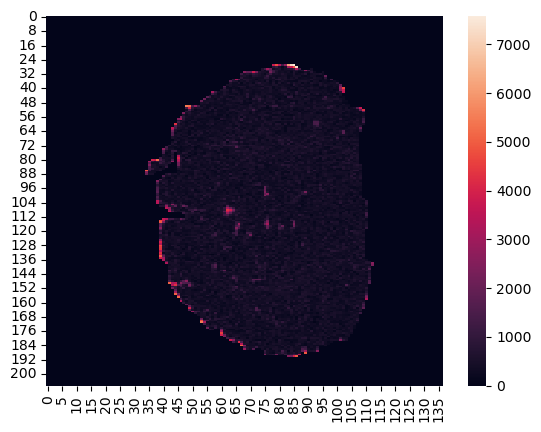

In [72]:
uniform_data_268_a3_WT_s3_557_2783 = np.array(masked_metabolomics_matrix_268_a3_WT_s3).T.reshape([num_metabolites_positive, len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['x_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][0]]), len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['y_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][1]])])[masked_metabolomics_matrix_268_a3_WT_s3.columns.get_loc('557.2783')]
ax = sns.heatmap(uniform_data_268_a3_WT_s3_557_2783)
plt.show()

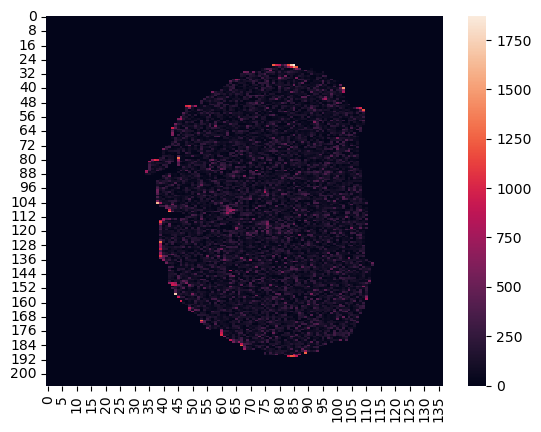

In [73]:
uniform_data_268_a3_WT_s3_297_6156 = np.array(masked_metabolomics_matrix_268_a3_WT_s3).T.reshape([num_metabolites_positive, len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['x_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][0]]), len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['y_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][1]])])[masked_metabolomics_matrix_268_a3_WT_s3.columns.get_loc('297.6156')]
ax = sns.heatmap(uniform_data_268_a3_WT_s3_297_6156)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_wt_22mo_group0_representative_image.tiff')
plt.show()

In [74]:
group1 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 1]
group1.index.tolist()

['848.5532',
 '783.5685',
 '820.5240',
 '810.5964',
 '844.5222',
 '756.5493',
 '761.5864',
 '734.5684',
 '846.5317',
 '788.6133',
 '734.5676',
 '820.5236',
 '783.5683',
 '844.5231',
 '810.5961',
 '756.5498',
 '761.5866',
 '788.6134',
 '826.5671',
 '734.5679',
 '848.5495',
 '846.5306',
 '848.5543',
 '826.5671.1',
 '798.5341',
 '846.5321',
 '761.5863',
 '820.5240.1',
 '783.5685.1',
 '810.5966']

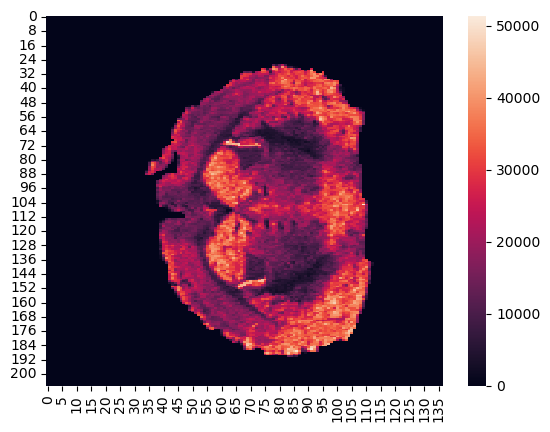

In [75]:
uniform_data_268_a3_WT_s3_848_5532 = np.array(masked_metabolomics_matrix_268_a3_WT_s3).T.reshape([num_metabolites_positive, len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['x_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][0]]), len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['y_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][1]])])[masked_metabolomics_matrix_268_a3_WT_s3.columns.get_loc('848.5532')]
ax = sns.heatmap(uniform_data_268_a3_WT_s3_848_5532)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_wt_22mo_group1_representative_image.tiff')
plt.show()

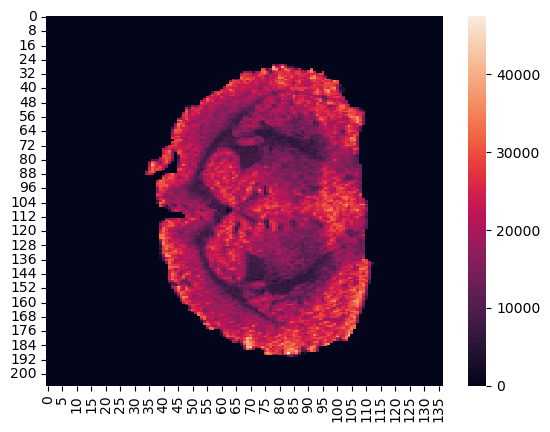

In [76]:
uniform_data_268_a3_WT_s3_783_5685 = np.array(masked_metabolomics_matrix_268_a3_WT_s3).T.reshape([num_metabolites_positive, len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['x_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][0]]), len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['y_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][1]])])[masked_metabolomics_matrix_268_a3_WT_s3.columns.get_loc('783.5685')]
ax = sns.heatmap(uniform_data_268_a3_WT_s3_783_5685)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_wt_22mo_group1_representative_image.tiff')
plt.show()

In [77]:
group2 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 2]
group2.index.tolist()

['782.5654',
 '799.5425',
 '772.5239',
 '799.5437',
 '772.5237',
 '799.5430',
 '782.5656.1',
 '772.5246',
 '799.5437.1',
 '782.5666',
 '798.5400']

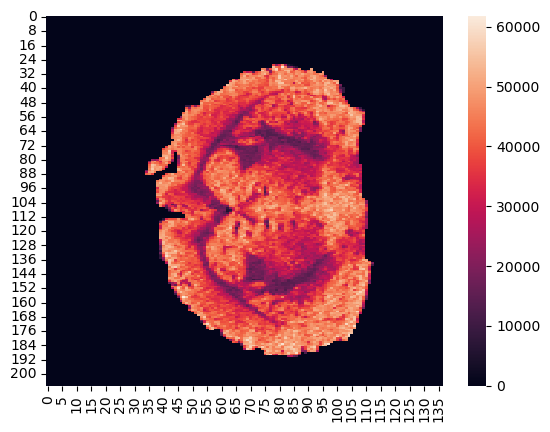

In [78]:
uniform_data_268_a3_WT_s3_782_5654 = np.array(masked_metabolomics_matrix_268_a3_WT_s3).T.reshape([num_metabolites_positive, len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['x_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][0]]), len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['y_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][1]])])[masked_metabolomics_matrix_268_a3_WT_s3.columns.get_loc('782.5654')]
ax = sns.heatmap(uniform_data_268_a3_WT_s3_782_5654)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_wt_22mo_group2_representative_image.tiff')
plt.show()

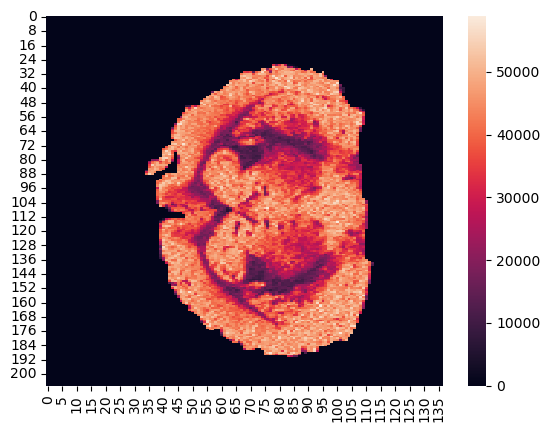

In [79]:
uniform_data_268_a3_WT_s3_799_5425 = np.array(masked_metabolomics_matrix_268_a3_WT_s3).T.reshape([num_metabolites_positive, len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['x_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][0]]), len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['y_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][1]])])[masked_metabolomics_matrix_268_a3_WT_s3.columns.get_loc('799.5425')]
ax = sns.heatmap(uniform_data_268_a3_WT_s3_799_5425)
plt.show()

In [80]:
group3 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 3]
group3.index.tolist()

['556.2758',
 '149.0228',
 '832.5750',
 '804.5469',
 '796.5256',
 '873.5563',
 '822.5305',
 '850.5593',
 '825.5574',
 '831.5212',
 '769.5609',
 '786.4899',
 '834.5881',
 '848.6373',
 '798.8399',
 '789.6160',
 '790.5199',
 '870.5369',
 '766.5161',
 '739.4666',
 '833.5809',
 '856.5775',
 '786.5891',
 '874.5556',
 '132.0765',
 '758.5554',
 '802.4776',
 '829.5555',
 '788.5004',
 '838.6172',
 '771.5127',
 '807.5444',
 '815.5294',
 '802.5543',
 '768.5304',
 '797.5280',
 '864.6302',
 '812.5887',
 '805.5504',
 '785.5750',
 '767.5111',
 '753.5859',
 '787.4877',
 '754.5345',
 '740.4787',
 '780.5504',
 '809.5825',
 '770.5577',
 '775.5295',
 '804.4963',
 '812.5089',
 '816.5268',
 '534.2958',
 '296.0660',
 '732.5515',
 '713.4481',
 '876.5782',
 '789.4984',
 '731.6039',
 '865.6349',
 '792.5392',
 '835.5943',
 '852.5898',
 '836.6080',
 '736.5731',
 '787.5963',
 '763.5999',
 '875.5584',
 '790.6194',
 '776.5560',
 '369.3506',
 '842.5617',
 '763.5998',
 '776.5599',
 '688.3962',
 '704.3867',
 '740.4813',

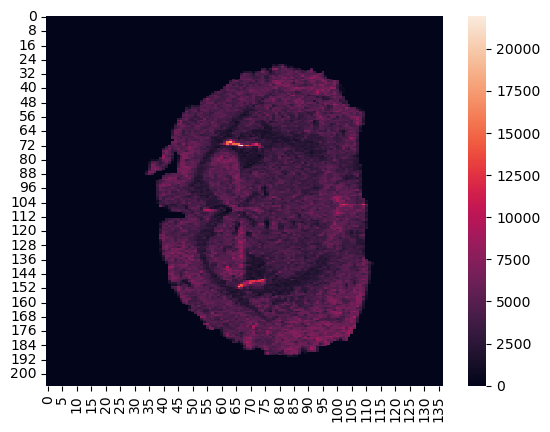

In [85]:
uniform_data_268_a3_WT_s3_556_2758 = np.array(masked_metabolomics_matrix_268_a3_WT_s3).T.reshape([num_metabolites_positive, len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['x_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][0]]), len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['y_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][1]])])[masked_metabolomics_matrix_268_a3_WT_s3.columns.get_loc('825.5574')]
ax = sns.heatmap(uniform_data_268_a3_WT_s3_556_2758)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_wt_22mo_group3_representative_image.tiff')
plt.show()

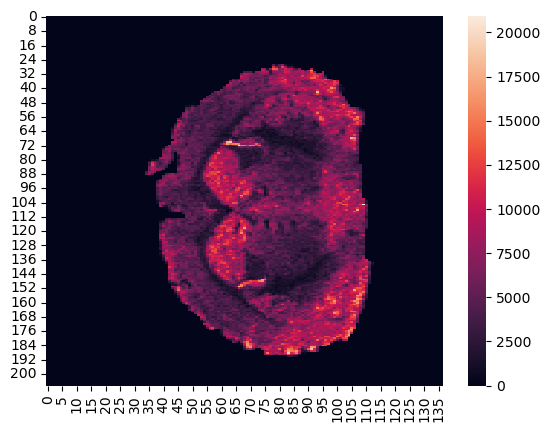

In [82]:
uniform_data_268_a3_WT_s3_832_5750 = np.array(masked_metabolomics_matrix_268_a3_WT_s3).T.reshape([num_metabolites_positive, len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['x_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][0]]), len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['y_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][1]])])[masked_metabolomics_matrix_268_a3_WT_s3.columns.get_loc('832.5750')]
ax = sns.heatmap(uniform_data_268_a3_WT_s3_832_5750)
plt.show()

In [83]:
group4 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 4]
group4.index.tolist()

['826.5699',
 '800.5466',
 '798.5388',
 '773.5269',
 '782.5656',
 '799.5417',
 '800.5466.1',
 '772.5222',
 '800.5482',
 '799.5392',
 '798.5355',
 '800.5422',
 '782.5619',
 '772.5197',
 '826.5706',
 '773.5271',
 '799.5393',
 '782.5605',
 '798.5383',
 '798.5410',
 '798.5750',
 '800.5469']

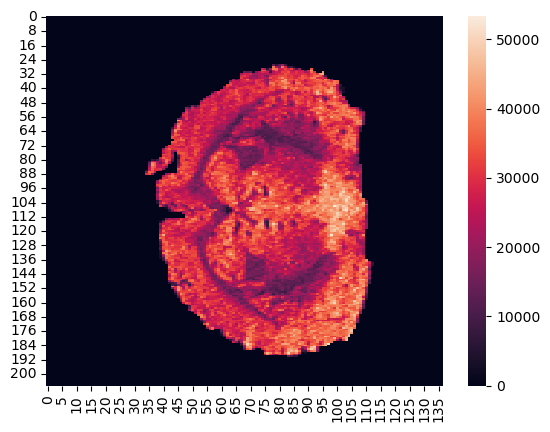

In [86]:
uniform_data_268_a3_WT_s3_826_5699 = np.array(masked_metabolomics_matrix_268_a3_WT_s3).T.reshape([num_metabolites_positive, len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['x_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][0]]), len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['y_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][1]])])[masked_metabolomics_matrix_268_a3_WT_s3.columns.get_loc('826.5699')]
ax = sns.heatmap(uniform_data_268_a3_WT_s3_826_5699)
plt.show()

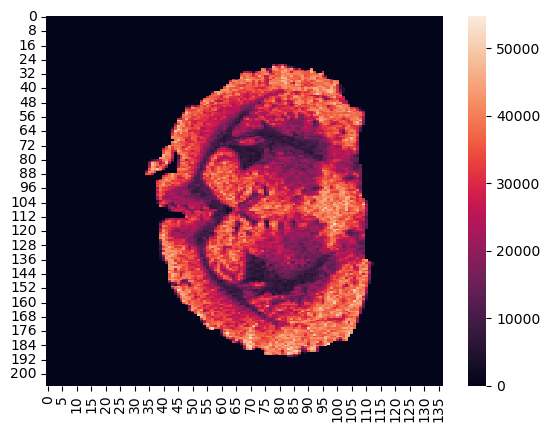

In [87]:
uniform_data_268_a3_WT_s3_798_5388 = np.array(masked_metabolomics_matrix_268_a3_WT_s3).T.reshape([num_metabolites_positive, len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['x_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][0]]), len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['y_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][1]])])[masked_metabolomics_matrix_268_a3_WT_s3.columns.get_loc('798.5388')]
ax = sns.heatmap(uniform_data_268_a3_WT_s3_798_5388)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_wt_22mo_group4_representative_image.tiff')
plt.show()

In [88]:
group5 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 5]
group5.index.tolist()

['827.5738',
 '872.5533',
 '824.5541',
 '830.5179',
 '849.5583',
 '774.5279',
 '828.5633',
 '821.5270',
 '845.5255',
 '806.5375',
 '784.5687',
 '801.5493',
 '757.5522',
 '770.5109',
 '811.5994',
 '814.5267',
 '798.6175',
 '808.5762',
 '735.5709',
 '762.5927',
 '847.5345',
 '830.5249',
 '762.5934',
 '735.5701',
 '872.5522',
 '849.5557',
 '770.5098',
 '762.5927.1',
 '784.5704',
 '806.5431',
 '798.4781',
 '798.4766',
 '798.4778',
 '827.5731',
 '830.5167',
 '824.5541.1',
 '774.5284',
 '845.5255.1',
 '821.5264',
 '814.5253',
 '806.5353',
 '798.6143',
 '735.5693',
 '757.5514',
 '811.5989',
 '804.5457',
 '808.5746',
 '798.4866',
 '814.5215',
 '847.5339',
 '801.5499',
 '828.5601',
 '832.5764',
 '757.5524',
 '828.5564',
 '770.5082',
 '806.5272',
 '814.5294',
 '770.5105',
 '784.5714',
 '872.5441',
 '849.5539',
 '847.5351',
 '828.5579',
 '735.5710',
 '798.4943',
 '772.4834',
 '734.5393',
 '734.5348',
 '808.5771',
 '828.5645',
 '811.6000',
 '814.5319',
 '821.5266',
 '798.6179',
 '757.5521',
 '830.

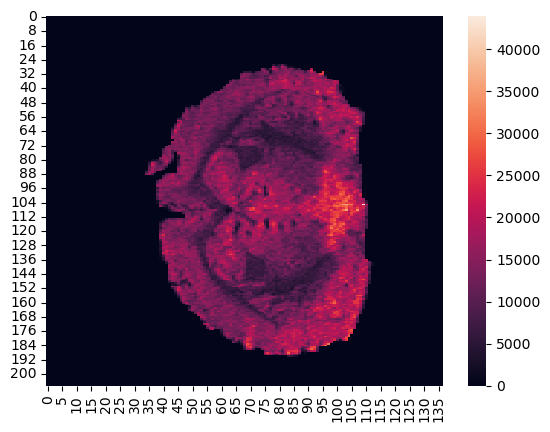

In [89]:
uniform_data_268_a3_WT_s3_827_5738 = np.array(masked_metabolomics_matrix_268_a3_WT_s3).T.reshape([num_metabolites_positive, len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['x_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][0]]), len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['y_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][1]])])[masked_metabolomics_matrix_268_a3_WT_s3.columns.get_loc('827.5738')]
ax = sns.heatmap(uniform_data_268_a3_WT_s3_827_5738)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_wt_22mo_group5_representative_image.tiff')
plt.show()

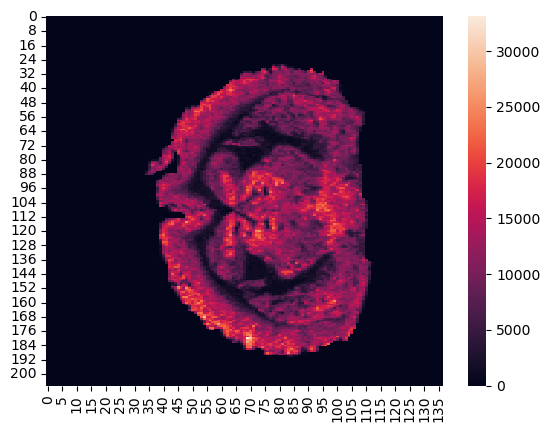

In [90]:
uniform_data_268_a3_WT_s3_872_5533 = np.array(masked_metabolomics_matrix_268_a3_WT_s3).T.reshape([num_metabolites_positive, len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['x_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][0]]), len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['y_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][1]])])[masked_metabolomics_matrix_268_a3_WT_s3.columns.get_loc('872.5533')]
ax = sns.heatmap(uniform_data_268_a3_WT_s3_872_5533)
plt.show()

In [91]:
group6 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 6]
group6.index.tolist()

['760.5831',
 '798.5389',
 '760.5847',
 '798.5390',
 '798.5506',
 '760.5849',
 '798.5396',
 '798.5383.1',
 '798.5414']

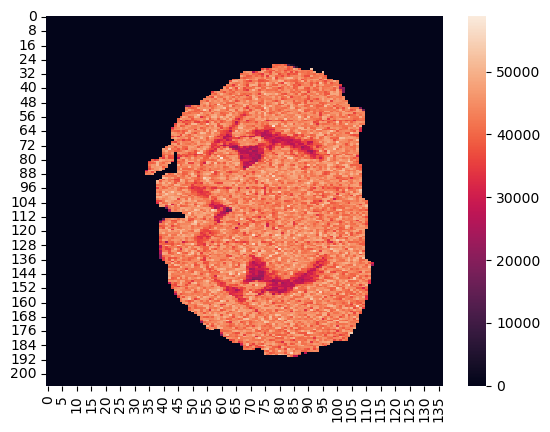

In [92]:
uniform_data_268_a3_WT_s3_798_5390 = np.array(masked_metabolomics_matrix_268_a3_WT_s3).T.reshape([num_metabolites_positive, len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['x_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][0]]), len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['y_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][1]])])[masked_metabolomics_matrix_268_a3_WT_s3.columns.get_loc('798.5390')]
ax = sns.heatmap(uniform_data_268_a3_WT_s3_798_5390)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_wt_22mo_group6_representative_image.tiff')
plt.show()

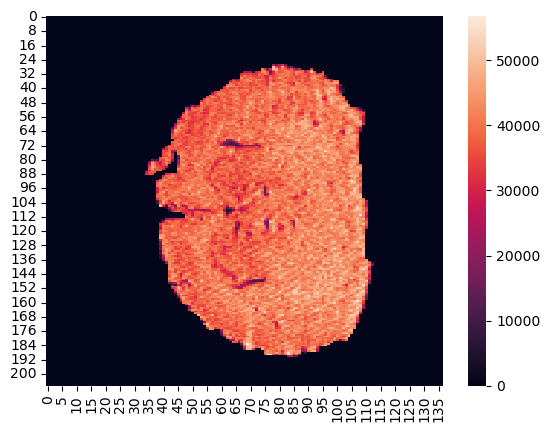

In [93]:
uniform_data_268_a3_WT_s3_760_5831 = np.array(masked_metabolomics_matrix_268_a3_WT_s3).T.reshape([num_metabolites_positive, len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['x_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][0]]), len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['y_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][1]])])[masked_metabolomics_matrix_268_a3_WT_s3.columns.get_loc('760.5831')]
ax = sns.heatmap(uniform_data_268_a3_WT_s3_760_5831)
plt.show()

<a class="anchor" id="Brain_6motg"></a>
Below we import a brain for the 6 month tg.

In [2]:
num_metabolites_positive = 10783
# Import metabolomics matrix only
masked_metabolomics_matrix_308_3_Tg_s5 = pd.read_csv('D:/All AGE Positive masks and roi sums/Whole Brains/308_3_Tg_s5_pixel_matrix_with_mask_whole_brain.csv', index_col = 0)
# Read in coordinates for metabolomics matrix
coordinates_matrix_308_3_Tg_s5 = pd.read_csv('D:/All AGE Positive TL/AL011023_AGE_308_3_Tg_s5_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])

Below we keep only the filtered ions.

In [3]:
filtered_ions_matrix_no_background = masked_metabolomics_matrix_308_3_Tg_s5.loc[(masked_metabolomics_matrix_308_3_Tg_s5.sum(axis=1) != 0), :]
filtered_ions_matrix_no_background_tranposed = filtered_ions_matrix_no_background.T
filtered_ions_matrix_no_background_tranposed

2955     2956     2957     2958     2959     2960     2961   \
556.2758  14367.0   5321.0   8106.0   9469.0   6675.0  12432.0  11190.0   
760.5831  42267.0  47086.0  54083.0  48532.0  51496.0  44640.0  41167.0   
826.5699  38630.0  43459.0  50432.0  49686.0  47727.0  38375.0  27013.0   
782.5654  46165.0  48900.0  43216.0  39014.0  47743.0  57927.0  50039.0   
557.2783   3784.0   1406.0   1668.0   2764.0   2162.0   3611.0   3326.0   
...           ...      ...      ...      ...      ...      ...      ...   
911.5466    549.0     99.0    287.0    289.0    339.0    398.0    309.0   
525.2379     79.0     84.0    577.0    756.0    503.0    257.0    324.0   
510.2535      0.0    256.0   1007.0    739.0   1346.0    658.0      0.0   
881.5392    877.0    220.0   1082.0    199.0    799.0    179.0    247.0   
922.4955    280.0    170.0    526.0    112.0    516.0     67.0    217.0   

            2962     2963     2964   ...    20890    20891    20892    20999  \
556.2758  18689.0   5365.0   1384.0  ...  18328.0  28570.0  33559.0  34057.0   
760.5831  36154.0  51121.0  45770.0  ...  24928.0  14178.0  19601.0  13613.0   
826.5699  26130.0  45770.0  40955.0  ...  43395.0  12332.0  23240.0  35567.0   
782.5654  41159.0  54165.0  51890.0  ...  48852.0  21774.0  26988.0  31902.0   
557.2783   6439.0   1510.0    493.0  ...   4647.0  10236.0  14690.0  10502.0   
...           ...      ...      ...  ...      ...      ...      ...      ...   
911.5466    257.0   2575.0    256.0  ...   1070.0     43.0    139.0    203.0   
525.2379      0.0   1733.0    541.0  ...     24.0      0.0     21.0      0.0   
510.2535    113.0   7305.0   9254.0  ...    121.0      9.0     42.0      0.0   
881.5392    164.0   1042.0    827.0  ...    549.0    610.0    121.0    212.0   
922.4955     51.0   1504.0    309.0  ...   1235.0     47.0     42.0    140.0   

            21000    21001    21002    21003    21004    21005  
556.2758  32913.0  33934.0  32324.0  27280.0  33318.0  31450.0  
760.5831  10352.0  13169.0  14388.0  18076.0  13759.0  11022.0  
826.5699   5303.0  21009.0  24692.0  36885.0  43611.0  17178.0  
782.5654  11455.0  24148.0  30291.0  36922.0  34005.0  18840.0  
557.2783  11596.0  12045.0  12485.0  10869.0  10012.0  10301.0  
...           ...      ...      ...      ...      ...      ...  
911.5466    147.0    138.0     80.0    225.0    219.0    161.0  
525.2379      0.0      0.0     32.0     53.0     30.0      0.0  
510.2535      0.0      0.0      0.0     64.0     94.0      0.0  
881.5392     83.0    552.0    652.0    375.0    651.0    260.0  
922.4955     29.0    229.0    307.0    239.0    259.0     40.0  

[10783 rows x 10540 columns]

Below we run kmeans on the pixels to find general patterns with 7 groups because that is what we saw in HDI.

C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


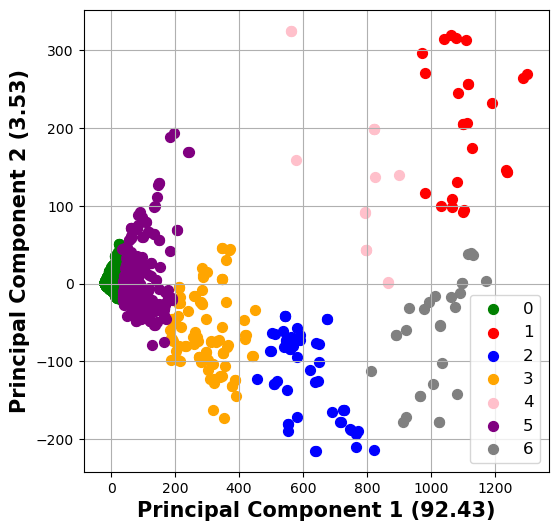

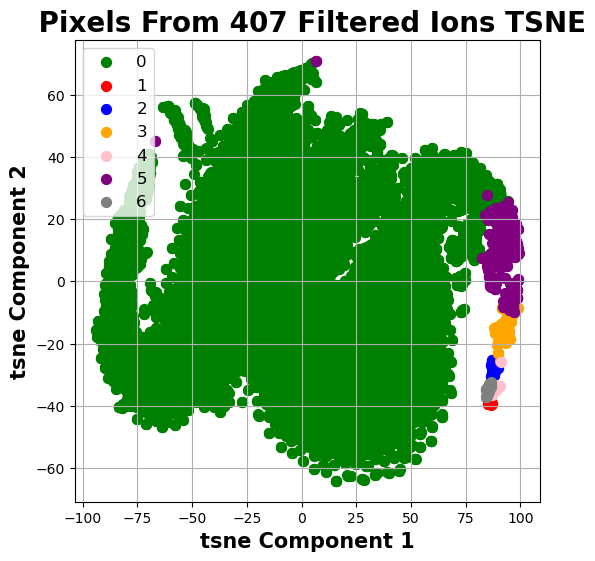

ValueError: cannot assign slice from input of different size

<Figure size 600x600 with 0 Axes>

In [4]:
# Standardize data
filtered_ions_matrix_no_background_tranposed_standardized = StandardScaler().fit_transform(filtered_ions_matrix_no_background_tranposed)

kmeans = KMeans(n_clusters=7, 
                    random_state=1)
kmeans.fit(filtered_ions_matrix_no_background_tranposed_standardized)
number_of_clusters = 7
clusterlabels = kmeans.labels_

# Specify plot type
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
principalDf_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf_pca['phenotype'] = clusterlabels
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(f'Principal Component 1 ({percent_variance[0]})', fontsize = 15, fontweight = 'bold')
ax.set_ylabel(f'Principal Component 2 ({percent_variance[1]})', fontsize = 15, fontweight = 'bold')
#ax.set_title(' Pixels From 407 Filtered Ions PCA', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf_pca['phenotype'] == group
    ax.scatter(principalDf_pca.loc[indicesToKeep, 'principal component 1']
               , principalDf_pca.loc[indicesToKeep, 'principal component 2'] 
               , c = color
               , s = 50)
ax.legend(labels, fontsize = 'large')
ax.grid()
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_tg_6mo_ion_clustering_pca.tiff')
plt.show()


tsne = TSNE(n_components=2, random_state = 100)
tsne_components = tsne.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
principalDf = pd.DataFrame(data = tsne_components, columns = ['tsne component 1', 'tsne component 2'])
principalDf['phenotype'] = clusterlabels
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne Component 1', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('tsne Component 2', fontsize = 15, fontweight = 'bold')
ax.set_title(' Pixels From 407 Filtered Ions TSNE', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf['phenotype'] == group
    ax.scatter(principalDf.loc[indicesToKeep, 'tsne component 1']
               , principalDf.loc[indicesToKeep, 'tsne component 2'] 
               , c = color
               , s = 50, alpha = 1)
ax.legend(labels, fontsize = 'large')
# Scatter 301
#plt.scatter(3.936206, 2.881305, color = 'black')
ax.grid()
plt.show()

plt.figure(figsize = (6, 6))
reducer = umap.UMAP()
embedding = reducer.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
embedding_df = pd.DataFrame(embedding)
embedding_df['phenotype'] = clusterlabels
embedding_df['phenotype'] = embedding_df['phenotype'].replace({0 : '0', 1 : '1', 2 : '2', 3 : '3', 4: '4', 5: '5', 6 : '6'})

sns.scatterplot(data = embedding_df, hue = 'phenotype', x = 0, y = 1, alpha = 0.3)
plt.title('UMAP projection of Pixels From 407 Filtered Ions', fontsize=12)


Below we add the labels

In [5]:
filtered_ions_matrix_no_background_tranposed['labels'] = clusterlabels
filtered_ions_matrix_no_background_tranposed

2955     2956     2957     2958     2959     2960     2961  \
556.2758  14367.0   5321.0   8106.0   9469.0   6675.0  12432.0  11190.0   
760.5831  42267.0  47086.0  54083.0  48532.0  51496.0  44640.0  41167.0   
826.5699  38630.0  43459.0  50432.0  49686.0  47727.0  38375.0  27013.0   
782.5654  46165.0  48900.0  43216.0  39014.0  47743.0  57927.0  50039.0   
557.2783   3784.0   1406.0   1668.0   2764.0   2162.0   3611.0   3326.0   
...           ...      ...      ...      ...      ...      ...      ...   
911.5466    549.0     99.0    287.0    289.0    339.0    398.0    309.0   
525.2379     79.0     84.0    577.0    756.0    503.0    257.0    324.0   
510.2535      0.0    256.0   1007.0    739.0   1346.0    658.0      0.0   
881.5392    877.0    220.0   1082.0    199.0    799.0    179.0    247.0   
922.4955    280.0    170.0    526.0    112.0    516.0     67.0    217.0   

             2962     2963     2964  ...    20891    20892    20999    21000  \
556.2758  18689.0   5365.0   1384.0  ...  28570.0  33559.0  34057.0  32913.0   
760.5831  36154.0  51121.0  45770.0  ...  14178.0  19601.0  13613.0  10352.0   
826.5699  26130.0  45770.0  40955.0  ...  12332.0  23240.0  35567.0   5303.0   
782.5654  41159.0  54165.0  51890.0  ...  21774.0  26988.0  31902.0  11455.0   
557.2783   6439.0   1510.0    493.0  ...  10236.0  14690.0  10502.0  11596.0   
...           ...      ...      ...  ...      ...      ...      ...      ...   
911.5466    257.0   2575.0    256.0  ...     43.0    139.0    203.0    147.0   
525.2379      0.0   1733.0    541.0  ...      0.0     21.0      0.0      0.0   
510.2535    113.0   7305.0   9254.0  ...      9.0     42.0      0.0      0.0   
881.5392    164.0   1042.0    827.0  ...    610.0    121.0    212.0     83.0   
922.4955     51.0   1504.0    309.0  ...     47.0     42.0    140.0     29.0   

            21001    21002    21003    21004    21005  labels  
556.2758  33934.0  32324.0  27280.0  33318.0  31450.0       5  
760.5831  13169.0  14388.0  18076.0  13759.0  11022.0       1  
826.5699  21009.0  24692.0  36885.0  43611.0  17178.0       1  
782.5654  24148.0  30291.0  36922.0  34005.0  18840.0       1  
557.2783  12045.0  12485.0  10869.0  10012.0  10301.0       0  
...           ...      ...      ...      ...      ...     ...  
911.5466    138.0     80.0    225.0    219.0    161.0       0  
525.2379      0.0     32.0     53.0     30.0      0.0       0  
510.2535      0.0      0.0     64.0     94.0      0.0       0  
881.5392    552.0    652.0    375.0    651.0    260.0       0  
922.4955    229.0    307.0    239.0    259.0     40.0       0  

[10783 rows x 10541 columns]

Below we look at representative ion images from each cluster.

In [6]:
group0 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 0]
group0.index.tolist()

['557.2783',
 '578.2553',
 '149.0228',
 '163.0387',
 '297.6156',
 '558.2799',
 '445.1249',
 '335.1248',
 '579.2580',
 '536.1653',
 '413.2739',
 '556.5202',
 '173.0789',
 '600.2353',
 '217.1045',
 '239.1611',
 '171.1438',
 '610.1793',
 '295.1932',
 '595.2278',
 '298.1170',
 '425.2925',
 '301.1404',
 '446.1249',
 '161.0956',
 '537.1653',
 '357.2024',
 '365.1043',
 '519.1394',
 '323.2241',
 '429.0930',
 '663.4477',
 '556.6204',
 '150.0257',
 '611.1793',
 '245.0775',
 '136.0207',
 '538.1631',
 '782.8572',
 '794.5442',
 '447.1238',
 '750.5374',
 '556.8314',
 '114.0908',
 '684.1912',
 '724.4990',
 '760.8710',
 '612.1794',
 '430.3888',
 '556.7079',
 '778.4734',
 '429.2473',
 '697.4747',
 '307.0435',
 '393.3033',
 '562.3239',
 '826.8713',
 '355.0687',
 '781.5540',
 '560.3103',
 '852.4890',
 '754.5840',
 '912.4553',
 '751.5400',
 '867.6458',
 '118.1218',
 '336.1275',
 '164.0413',
 '299.1820',
 '351.0981',
 '273.1663',
 '896.4849',
 '309.2024',
 '813.5066',
 '752.5486',
 '851.6470',
 '425.1858',

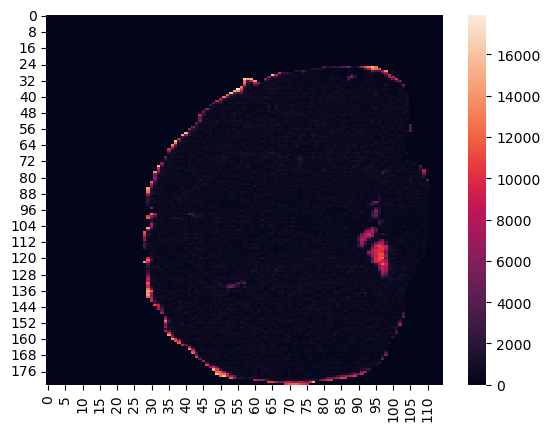

In [7]:
uniform_data_308_3_Tg_s5_557_2783 = np.array(masked_metabolomics_matrix_308_3_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['x_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['y_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_308_3_Tg_s5.columns.get_loc('557.2783')]
ax = sns.heatmap(uniform_data_308_3_Tg_s5_557_2783)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_tg_6mo_group0_representative_image.tiff')
plt.show()

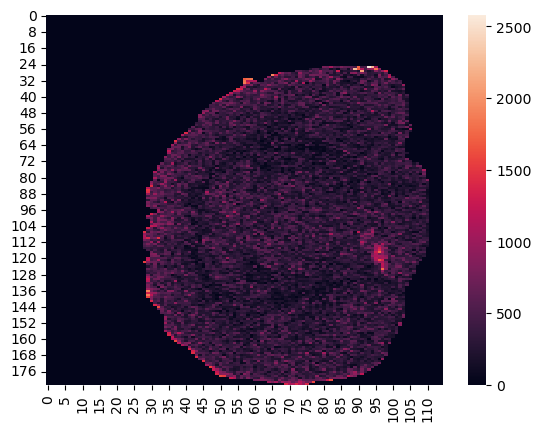

In [8]:
uniform_data_308_3_Tg_s5_413_2739 = np.array(masked_metabolomics_matrix_308_3_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['x_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['y_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_308_3_Tg_s5.columns.get_loc('413.2739')]
ax = sns.heatmap(uniform_data_308_3_Tg_s5_413_2739)
plt.show()

In [9]:
group1 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 1]
group1.index.tolist()

['760.5831',
 '826.5699',
 '782.5654',
 '799.5425',
 '798.5389',
 '760.5847',
 '799.5437',
 '799.5430',
 '782.5656.1',
 '798.5390',
 '798.5506',
 '799.5392',
 '798.5355',
 '826.5671',
 '782.5619',
 '772.5246',
 '799.5437.1',
 '782.5666',
 '826.5706',
 '760.5849',
 '826.5671.1',
 '782.5605',
 '798.5400',
 '798.5396',
 '798.5383.1',
 '798.5414']

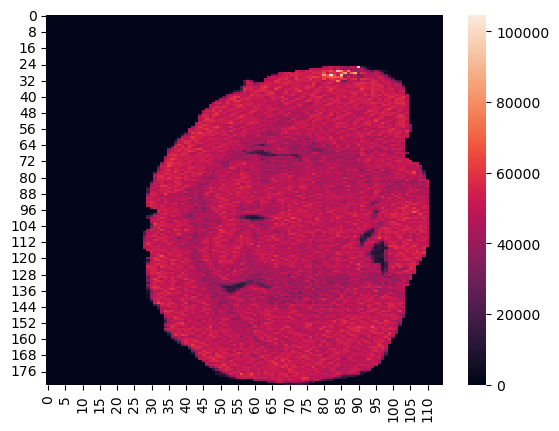

In [10]:
uniform_data_308_3_Tg_s5_760_5831 = np.array(masked_metabolomics_matrix_308_3_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['x_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['y_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_308_3_Tg_s5.columns.get_loc('760.5831')]
ax = sns.heatmap(uniform_data_308_3_Tg_s5_760_5831)
plt.show()

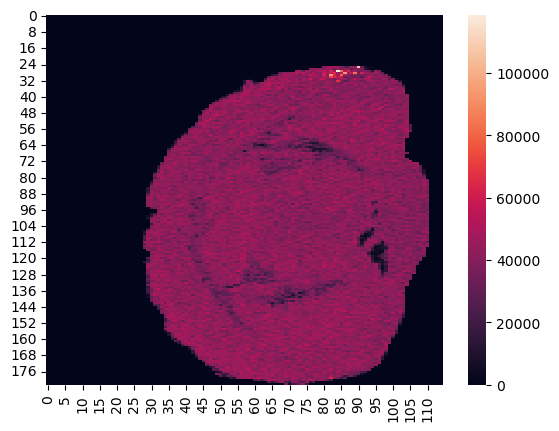

In [11]:
uniform_data_308_3_Tg_s5_826_5699 = np.array(masked_metabolomics_matrix_308_3_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['x_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['y_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_308_3_Tg_s5.columns.get_loc('826.5699')]
ax = sns.heatmap(uniform_data_308_3_Tg_s5_826_5699)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_tg_6mo_group1_representative_image.tiff')
plt.show()

In [12]:
group2 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 2]
group2.index.tolist()

['756.5493',
 '872.5533',
 '824.5541',
 '830.5179',
 '846.5317',
 '849.5583',
 '774.5279',
 '828.5633',
 '821.5270',
 '845.5255',
 '806.5375',
 '784.5687',
 '801.5493',
 '814.5267',
 '798.6175',
 '830.5249',
 '872.5522',
 '849.5557',
 '784.5704',
 '806.5431',
 '798.4781',
 '798.4766',
 '798.4778',
 '756.5498',
 '830.5167',
 '824.5541.1',
 '774.5284',
 '845.5255.1',
 '821.5264',
 '814.5253',
 '806.5353',
 '798.6143',
 '798.4866',
 '846.5306',
 '814.5215',
 '801.5499',
 '828.5601',
 '828.5564',
 '806.5272',
 '814.5294',
 '784.5714',
 '872.5441',
 '849.5539',
 '828.5579',
 '846.5321',
 '798.4943',
 '828.5645',
 '821.5266',
 '798.6179',
 '830.5266']

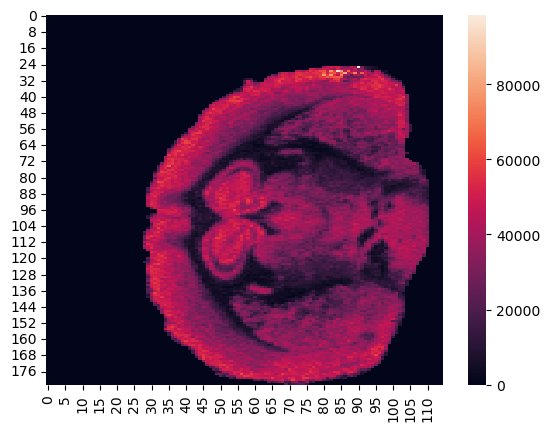

In [13]:
uniform_data_308_3_Tg_s5_756_5493 = np.array(masked_metabolomics_matrix_308_3_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['x_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['y_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_308_3_Tg_s5.columns.get_loc('756.5493')]
ax = sns.heatmap(uniform_data_308_3_Tg_s5_756_5493)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_tg_6mo_group2_representative_image.tiff')
plt.show()

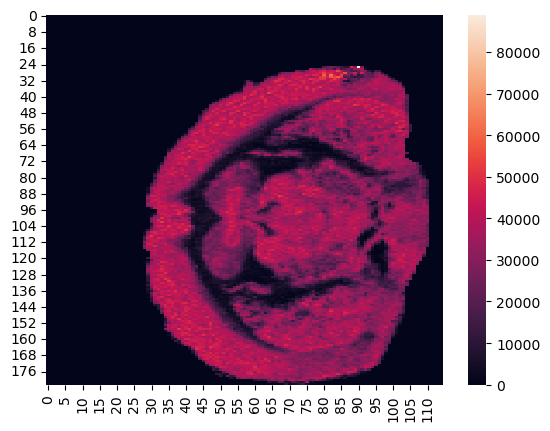

In [14]:
uniform_data_308_3_Tg_s5_872_5533 = np.array(masked_metabolomics_matrix_308_3_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['x_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['y_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_308_3_Tg_s5.columns.get_loc('872.5533')]
ax = sns.heatmap(uniform_data_308_3_Tg_s5_872_5533)
plt.show()

In [15]:
group3 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 3]
group3.index.tolist()

['832.5750',
 '757.5522',
 '770.5109',
 '811.5994',
 '804.5469',
 '796.5256',
 '873.5563',
 '822.5305',
 '808.5762',
 '735.5709',
 '762.5927',
 '850.5593',
 '825.5574',
 '831.5212',
 '769.5609',
 '786.4899',
 '834.5881',
 '798.8399',
 '790.5199',
 '870.5369',
 '739.4666',
 '847.5345',
 '874.5556',
 '132.0765',
 '802.4776',
 '815.5294',
 '802.5543',
 '296.0660',
 '762.5934',
 '815.5321',
 '735.5701',
 '770.5098',
 '786.4899.1',
 '802.4747',
 '870.5354',
 '874.5531',
 '762.5927.1',
 '804.5458',
 '790.5189',
 '799.4821',
 '772.4693',
 '848.5630',
 '873.5560',
 '735.5693',
 '757.5514',
 '822.5307',
 '811.5989',
 '786.4857',
 '798.8409',
 '831.5198',
 '804.5457',
 '825.5579',
 '808.5746',
 '815.5264',
 '802.4781',
 '790.5182',
 '772.5937',
 '799.6124',
 '769.5607',
 '739.4659',
 '847.5339',
 '834.5881.1',
 '796.5257',
 '802.5546',
 '132.0900',
 '832.5764',
 '790.5197',
 '850.5584',
 '757.5524',
 '770.5082',
 '770.5105',
 '831.5275',
 '832.5409',
 '828.5233',
 '870.5231',
 '873.5473',
 '847.

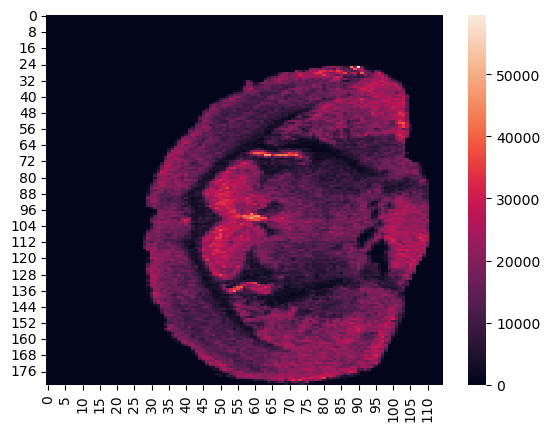

In [16]:
uniform_data_308_3_Tg_s5_832_5750 = np.array(masked_metabolomics_matrix_308_3_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['x_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['y_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_308_3_Tg_s5.columns.get_loc('832.5750')]
ax = sns.heatmap(uniform_data_308_3_Tg_s5_832_5750)
plt.show()

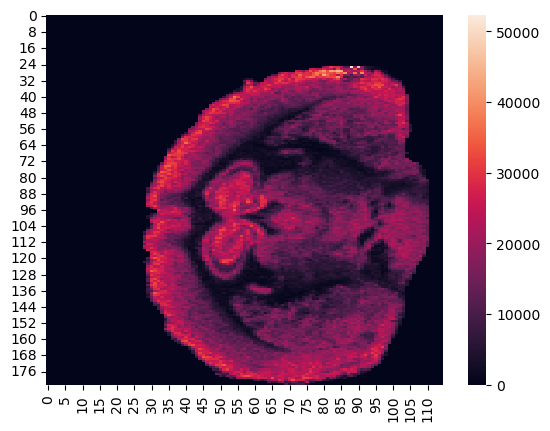

In [17]:
uniform_data_308_3_Tg_s5_757_5522 = np.array(masked_metabolomics_matrix_308_3_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['x_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['y_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_308_3_Tg_s5.columns.get_loc('757.5522')]
ax = sns.heatmap(uniform_data_308_3_Tg_s5_757_5522)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_tg_6mo_group3_representative_image.tiff')
plt.show()

In [18]:
group4 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 4]
group4.index.tolist()

['810.5964',
 '827.5738',
 '761.5864',
 '734.5684',
 '788.6133',
 '734.5676',
 '827.5731',
 '810.5961',
 '761.5866',
 '788.6134',
 '734.5679',
 '798.5410',
 '798.5750',
 '761.5863',
 '810.5966']

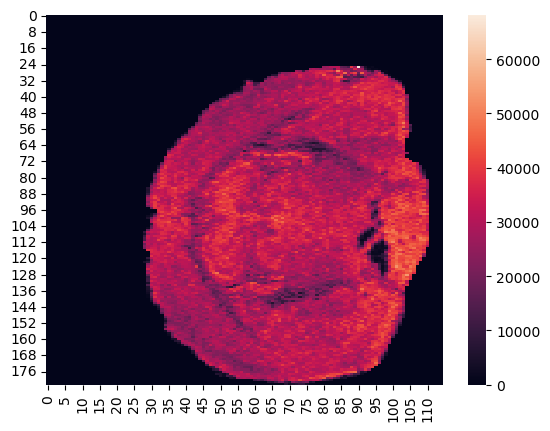

In [19]:
uniform_data_308_3_Tg_s5_810_5964 = np.array(masked_metabolomics_matrix_308_3_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['x_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['y_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_308_3_Tg_s5.columns.get_loc('810.5964')]
ax = sns.heatmap(uniform_data_308_3_Tg_s5_810_5964)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_tg_6mo_group4_representative_image.tiff')
plt.show()

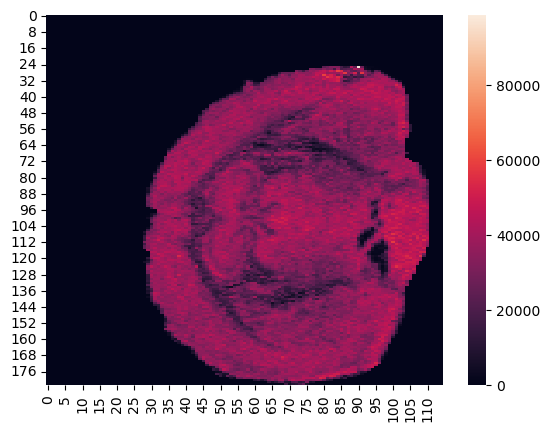

In [20]:
uniform_data_308_3_Tg_s5_827_5738 = np.array(masked_metabolomics_matrix_308_3_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['x_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['y_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_308_3_Tg_s5.columns.get_loc('827.5738')]
ax = sns.heatmap(uniform_data_308_3_Tg_s5_827_5738)
plt.show()

In [21]:
group5 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 5]
group5.index.tolist()

['556.2758',
 '594.2257',
 '848.6373',
 '789.6160',
 '766.5161',
 '833.5809',
 '856.5775',
 '786.5891',
 '758.5554',
 '829.5555',
 '788.5004',
 '838.6172',
 '771.5127',
 '807.5444',
 '768.5304',
 '797.5280',
 '864.6302',
 '812.5887',
 '805.5504',
 '785.5750',
 '767.5111',
 '753.5859',
 '787.4877',
 '866.6432',
 '849.6414',
 '754.5345',
 '740.4787',
 '780.5504',
 '809.5825',
 '770.5577',
 '775.5295',
 '804.4963',
 '723.4885',
 '812.5089',
 '816.5268',
 '534.2958',
 '732.5515',
 '871.5403',
 '713.4481',
 '772.8143',
 '876.5782',
 '789.4984',
 '731.6039',
 '799.1978',
 '823.5336',
 '857.5806',
 '865.6349',
 '854.6001',
 '792.5392',
 '852.6282',
 '835.5943',
 '852.5898',
 '798.9550',
 '791.5225',
 '839.6210',
 '850.6476',
 '762.4794',
 '836.6080',
 '803.4816',
 '736.5731',
 '851.5616',
 '744.4928',
 '787.5963',
 '763.5999',
 '891.6509',
 '799.0620',
 '854.5647',
 '741.4819',
 '875.5584',
 '818.5450',
 '790.6194',
 '800.8413',
 '162.1113',
 '771.5620',
 '776.5560',
 '170.0321',
 '164.1285',

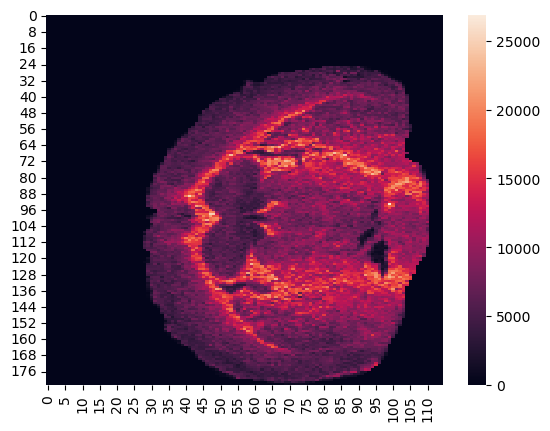

In [25]:
uniform_data_308_3_Tg_s5_556_2758 = np.array(masked_metabolomics_matrix_308_3_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['x_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['y_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_308_3_Tg_s5.columns.get_loc('789.6160')]
ax = sns.heatmap(uniform_data_308_3_Tg_s5_556_2758)
plt.show()

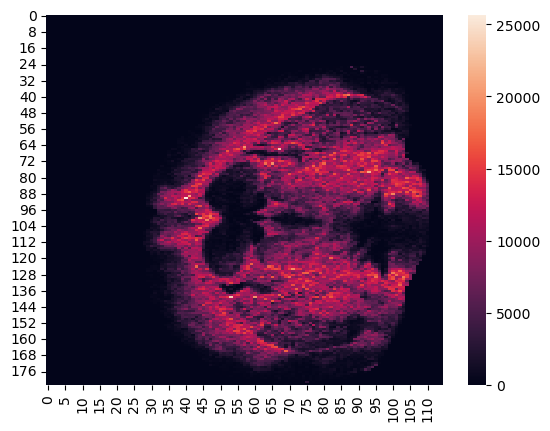

In [23]:
uniform_data_308_3_Tg_s5_848_6373 = np.array(masked_metabolomics_matrix_308_3_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['x_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['y_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_308_3_Tg_s5.columns.get_loc('848.6373')]
ax = sns.heatmap(uniform_data_308_3_Tg_s5_848_6373)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_tg_6mo_group5_representative_image.tiff')
plt.show()

In [24]:
group6 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 6]
group6.index.tolist()

['772.5239',
 '800.5466',
 '798.5388',
 '773.5269',
 '848.5532',
 '783.5685',
 '820.5240',
 '844.5222',
 '782.5656',
 '799.5417',
 '772.5237',
 '800.5466.1',
 '820.5236',
 '783.5683',
 '844.5231',
 '772.5222',
 '800.5482',
 '800.5422',
 '848.5495',
 '772.5197',
 '773.5271',
 '848.5543',
 '799.5393',
 '798.5383',
 '798.5341',
 '820.5240.1',
 '783.5685.1',
 '800.5469']

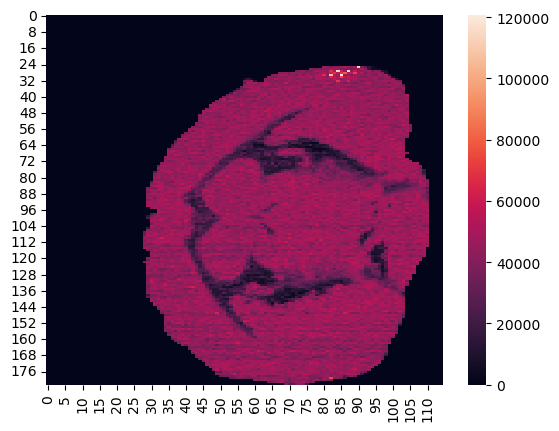

In [26]:
uniform_data_308_3_Tg_s5_772_5239 = np.array(masked_metabolomics_matrix_308_3_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['x_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['y_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_308_3_Tg_s5.columns.get_loc('772.5239')]
ax = sns.heatmap(uniform_data_308_3_Tg_s5_772_5239)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_tg_6mo_group6_representative_image.tiff')
plt.show()

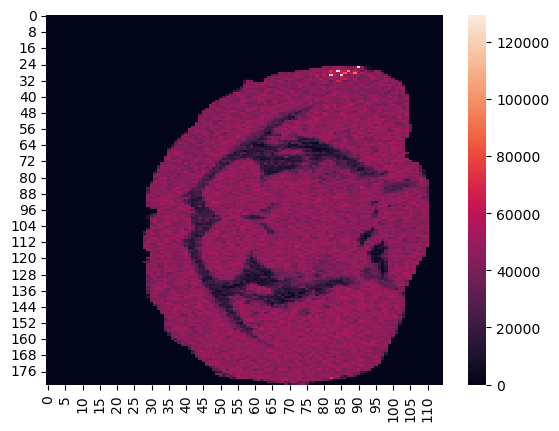

In [27]:
uniform_data_308_3_Tg_s5_800_5466 = np.array(masked_metabolomics_matrix_308_3_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['x_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['y_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_308_3_Tg_s5.columns.get_loc('800.5466')]
ax = sns.heatmap(uniform_data_308_3_Tg_s5_800_5466)
plt.show()

<a class="anchor" id="Brain_12motg"></a>
Below we import a brain for the 12 month tg.

In [28]:
num_metabolites_positive = 10783
# Import metabolomics matrix only
masked_metabolomics_matrix_270_5_Tg_s5 = pd.read_csv('D:/All AGE Positive masks and roi sums/Whole Brains/270_5_Tg_s5_pixel_matrix_with_mask_whole_brain.csv', index_col = 0)
# Read in coordinates for metabolomics matrix
coordinates_matrix_270_5_Tg_s5 = pd.read_csv('D:/All AGE Positive TL/AL011223_AGE_270_5_Tg_s5_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])

Below we keep only the filtered ions.

In [29]:
filtered_ions_matrix_no_background = masked_metabolomics_matrix_270_5_Tg_s5.loc[(masked_metabolomics_matrix_270_5_Tg_s5.sum(axis=1) != 0), :]
filtered_ions_matrix_no_background_tranposed = filtered_ions_matrix_no_background.T
filtered_ions_matrix_no_background_tranposed

3701     3702     3703     3704     3705     3706     3707   \
556.2758  15162.0   5904.0   3607.0   4547.0   4563.0   2783.0   3478.0   
760.5831  18533.0  22586.0  24378.0  26932.0  24747.0  23018.0  21467.0   
826.5699   7378.0  11111.0  13265.0  12184.0  12114.0  11081.0  10407.0   
782.5654  22190.0  27915.0  28232.0  25406.0  23720.0  26495.0  25057.0   
557.2783   4729.0   1935.0    953.0   1142.0   1082.0    995.0    800.0   
...           ...      ...      ...      ...      ...      ...      ...   
911.5466      0.0    100.0     93.0     33.0      0.0     22.0      0.0   
525.2379      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
510.2535      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
881.5392     73.0    151.0    135.0    131.0    320.0     62.0     98.0   
922.4955     44.0     22.0     79.0     65.0    119.0     99.0     52.0   

            3708     3709     3710   ...    23078    23079    23080    23081  \
556.2758   2607.0   3598.0   4462.0  ...   1168.0   1360.0   1365.0    641.0   
760.5831  25221.0  24617.0  20959.0  ...  26532.0  23550.0  20430.0  22621.0   
826.5699  11487.0  12010.0   7600.0  ...  19700.0  24800.0  23493.0  20695.0   
782.5654  27101.0  22987.0  16829.0  ...  36335.0  40768.0  36751.0  36555.0   
557.2783    635.0    870.0   1535.0  ...    723.0    196.0    274.0    497.0   
...           ...      ...      ...  ...      ...      ...      ...      ...   
911.5466     64.0     20.0      0.0  ...      0.0     30.0    212.0     18.0   
525.2379      0.0      0.0      0.0  ...     63.0      0.0     51.0      0.0   
510.2535      0.0      0.0      0.0  ...     81.0     32.0     65.0    121.0   
881.5392     75.0    112.0    128.0  ...     94.0    180.0     45.0    127.0   
922.4955     78.0     23.0      0.0  ...     42.0     67.0     79.0    113.0   

            23082    23083    23084    23085    23086    23087  
556.2758    755.0    674.0    860.0    931.0    910.0   1252.0  
760.5831  19536.0  22315.0  22820.0  18640.0  23914.0  22927.0  
826.5699  20256.0  19710.0  20691.0  20002.0  22061.0  13459.0  
782.5654  33798.0  30499.0  33079.0  31034.0  35532.0  26289.0  
557.2783    344.0    245.0    244.0    229.0    113.0    523.0  
...           ...      ...      ...      ...      ...      ...  
911.5466     23.0    106.0      0.0     56.0     32.0     60.0  
525.2379      0.0      0.0      0.0      0.0     66.0      0.0  
510.2535     40.0      0.0      0.0      0.0      0.0     20.0  
881.5392    135.0     82.0     60.0     38.0    134.0      0.0  
922.4955     88.0      6.0     20.0     47.0    115.0     72.0  

[10783 rows x 9568 columns]

Below we run kmeans on the pixels to find general patterns with 7 groups because that is what we saw in HDI.

C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


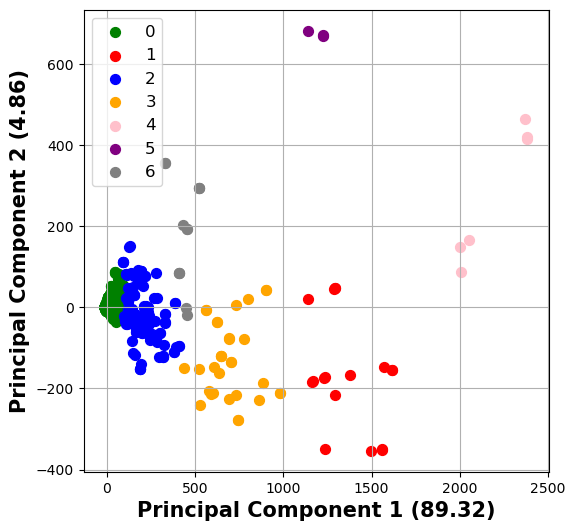

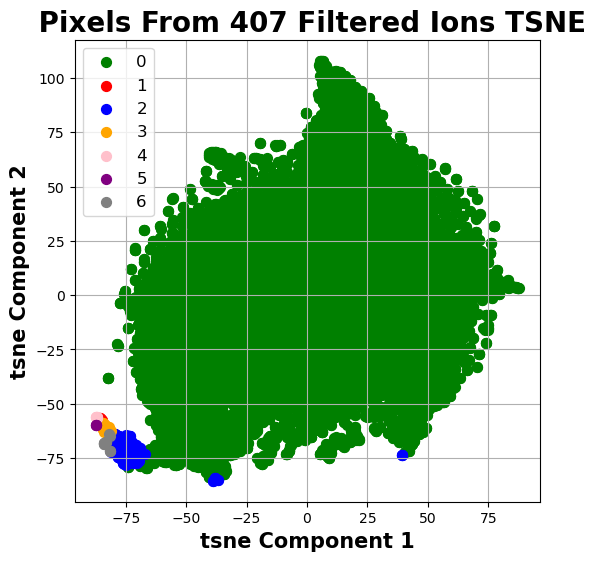

ValueError: cannot assign slice from input of different size

<Figure size 600x600 with 0 Axes>

In [30]:
# Standardize data
filtered_ions_matrix_no_background_tranposed_standardized = StandardScaler().fit_transform(filtered_ions_matrix_no_background_tranposed)

kmeans = KMeans(n_clusters=7, 
                    random_state=1)
kmeans.fit(filtered_ions_matrix_no_background_tranposed_standardized)
number_of_clusters = 7
clusterlabels = kmeans.labels_

# Specify plot type
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
principalDf_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf_pca['phenotype'] = clusterlabels
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(f'Principal Component 1 ({percent_variance[0]})', fontsize = 15, fontweight = 'bold')
ax.set_ylabel(f'Principal Component 2 ({percent_variance[1]})', fontsize = 15, fontweight = 'bold')
#ax.set_title(' Pixels From 407 Filtered Ions PCA', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf_pca['phenotype'] == group
    ax.scatter(principalDf_pca.loc[indicesToKeep, 'principal component 1']
               , principalDf_pca.loc[indicesToKeep, 'principal component 2'] 
               , c = color
               , s = 50)
ax.legend(labels, fontsize = 'large')
ax.grid()
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_tg_12mo_ion_clustering_pca.tiff')
plt.show()


tsne = TSNE(n_components=2, random_state = 100)
tsne_components = tsne.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
principalDf = pd.DataFrame(data = tsne_components, columns = ['tsne component 1', 'tsne component 2'])
principalDf['phenotype'] = clusterlabels
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne Component 1', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('tsne Component 2', fontsize = 15, fontweight = 'bold')
ax.set_title(' Pixels From 407 Filtered Ions TSNE', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf['phenotype'] == group
    ax.scatter(principalDf.loc[indicesToKeep, 'tsne component 1']
               , principalDf.loc[indicesToKeep, 'tsne component 2'] 
               , c = color
               , s = 50, alpha = 1)
ax.legend(labels, fontsize = 'large')
# Scatter 301
#plt.scatter(3.936206, 2.881305, color = 'black')
ax.grid()
plt.show()

plt.figure(figsize = (6, 6))
reducer = umap.UMAP()
embedding = reducer.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
embedding_df = pd.DataFrame(embedding)
embedding_df['phenotype'] = clusterlabels
embedding_df['phenotype'] = embedding_df['phenotype'].replace({0 : '0', 1 : '1', 2 : '2', 3 : '3', 4: '4', 5: '5', 6 : '6'})

sns.scatterplot(data = embedding_df, hue = 'phenotype', x = 0, y = 1, alpha = 0.3)
plt.title('UMAP projection of Pixels From 407 Filtered Ions', fontsize=12)


Below we add the labels

In [31]:
filtered_ions_matrix_no_background_tranposed['labels'] = clusterlabels
filtered_ions_matrix_no_background_tranposed

3701     3702     3703     3704     3705     3706     3707  \
556.2758  15162.0   5904.0   3607.0   4547.0   4563.0   2783.0   3478.0   
760.5831  18533.0  22586.0  24378.0  26932.0  24747.0  23018.0  21467.0   
826.5699   7378.0  11111.0  13265.0  12184.0  12114.0  11081.0  10407.0   
782.5654  22190.0  27915.0  28232.0  25406.0  23720.0  26495.0  25057.0   
557.2783   4729.0   1935.0    953.0   1142.0   1082.0    995.0    800.0   
...           ...      ...      ...      ...      ...      ...      ...   
911.5466      0.0    100.0     93.0     33.0      0.0     22.0      0.0   
525.2379      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
510.2535      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
881.5392     73.0    151.0    135.0    131.0    320.0     62.0     98.0   
922.4955     44.0     22.0     79.0     65.0    119.0     99.0     52.0   

             3708     3709     3710  ...    23079    23080    23081    23082  \
556.2758   2607.0   3598.0   4462.0  ...   1360.0   1365.0    641.0    755.0   
760.5831  25221.0  24617.0  20959.0  ...  23550.0  20430.0  22621.0  19536.0   
826.5699  11487.0  12010.0   7600.0  ...  24800.0  23493.0  20695.0  20256.0   
782.5654  27101.0  22987.0  16829.0  ...  40768.0  36751.0  36555.0  33798.0   
557.2783    635.0    870.0   1535.0  ...    196.0    274.0    497.0    344.0   
...           ...      ...      ...  ...      ...      ...      ...      ...   
911.5466     64.0     20.0      0.0  ...     30.0    212.0     18.0     23.0   
525.2379      0.0      0.0      0.0  ...      0.0     51.0      0.0      0.0   
510.2535      0.0      0.0      0.0  ...     32.0     65.0    121.0     40.0   
881.5392     75.0    112.0    128.0  ...    180.0     45.0    127.0    135.0   
922.4955     78.0     23.0      0.0  ...     67.0     79.0    113.0     88.0   

            23083    23084    23085    23086    23087  labels  
556.2758    674.0    860.0    931.0    910.0   1252.0       2  
760.5831  22315.0  22820.0  18640.0  23914.0  22927.0       5  
826.5699  19710.0  20691.0  20002.0  22061.0  13459.0       3  
782.5654  30499.0  33079.0  31034.0  35532.0  26289.0       1  
557.2783    245.0    244.0    229.0    113.0    523.0       0  
...           ...      ...      ...      ...      ...     ...  
911.5466    106.0      0.0     56.0     32.0     60.0       0  
525.2379      0.0      0.0      0.0     66.0      0.0       0  
510.2535      0.0      0.0      0.0      0.0     20.0       0  
881.5392     82.0     60.0     38.0    134.0      0.0       0  
922.4955      6.0     20.0     47.0    115.0     72.0       0  

[10783 rows x 9569 columns]

Below we look at representative ion images from each cluster.

In [32]:
group0 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 0]
group0.index.tolist()

['557.2783',
 '578.2553',
 '149.0228',
 '163.0387',
 '594.2257',
 '297.6156',
 '558.2799',
 '445.1249',
 '335.1248',
 '579.2580',
 '848.6373',
 '798.8399',
 '790.5199',
 '536.1653',
 '766.5161',
 '739.4666',
 '833.5809',
 '856.5775',
 '413.2739',
 '758.5554',
 '802.4776',
 '829.5555',
 '788.5004',
 '838.6172',
 '771.5127',
 '807.5444',
 '556.5202',
 '815.5294',
 '802.5543',
 '768.5304',
 '797.5280',
 '864.6302',
 '173.0789',
 '600.2353',
 '217.1045',
 '239.1611',
 '171.1438',
 '610.1793',
 '812.5887',
 '805.5504',
 '295.1932',
 '785.5750',
 '767.5111',
 '753.5859',
 '787.4877',
 '866.6432',
 '849.6414',
 '595.2278',
 '754.5345',
 '740.4787',
 '780.5504',
 '298.1170',
 '809.5825',
 '770.5577',
 '775.5295',
 '425.2925',
 '804.4963',
 '723.4885',
 '812.5089',
 '816.5268',
 '534.2958',
 '301.1404',
 '446.1249',
 '732.5515',
 '161.0956',
 '537.1653',
 '871.5403',
 '357.2024',
 '713.4481',
 '365.1043',
 '519.1394',
 '772.8143',
 '876.5782',
 '323.2241',
 '789.4984',
 '429.0930',
 '731.6039',

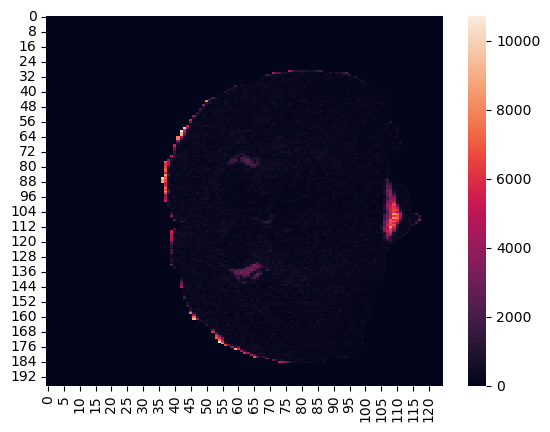

In [33]:
uniform_data_270_5_Tg_s5_557_2783 = np.array(masked_metabolomics_matrix_270_5_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['x_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][0]]), len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['y_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_270_5_Tg_s5.columns.get_loc('557.2783')]
ax = sns.heatmap(uniform_data_270_5_Tg_s5_557_2783)
plt.show()

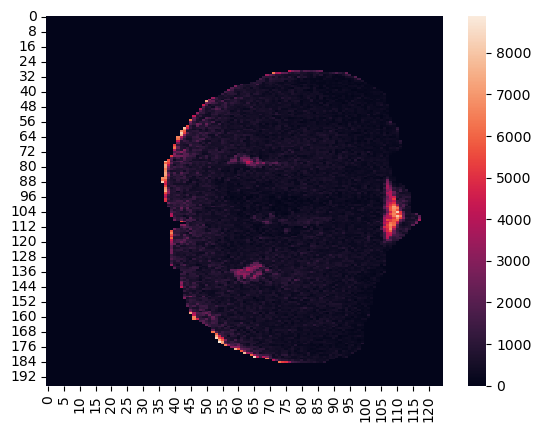

In [34]:
uniform_data_270_5_Tg_s5_149_0228 = np.array(masked_metabolomics_matrix_270_5_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['x_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][0]]), len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['y_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_270_5_Tg_s5.columns.get_loc('149.0228')]
ax = sns.heatmap(uniform_data_270_5_Tg_s5_149_0228)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_tg_12mo_group0_representative_image.tiff')
plt.show()

In [35]:
group1 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 1]
group1.index.tolist()

['782.5654',
 '799.5425',
 '772.5239',
 '798.5388',
 '798.5389',
 '782.5656',
 '799.5437',
 '799.5417',
 '772.5237',
 '799.5430',
 '782.5656.1',
 '772.5222',
 '772.5246',
 '799.5437.1',
 '782.5666',
 '799.5393',
 '798.5383']

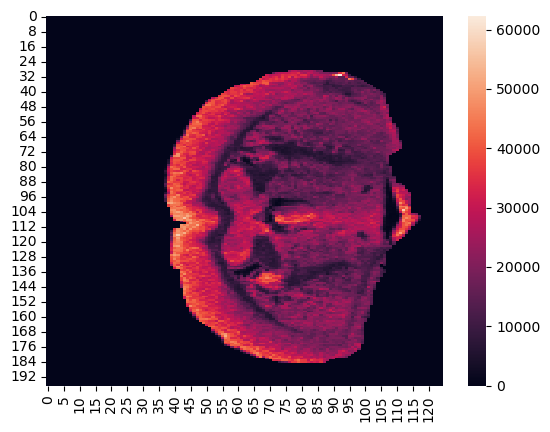

In [36]:
uniform_data_270_5_Tg_s5_782_5654 = np.array(masked_metabolomics_matrix_270_5_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['x_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][0]]), len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['y_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_270_5_Tg_s5.columns.get_loc('782.5654')]
ax = sns.heatmap(uniform_data_270_5_Tg_s5_782_5654)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_tg_12mo_group1_representative_image.tiff')
plt.show()

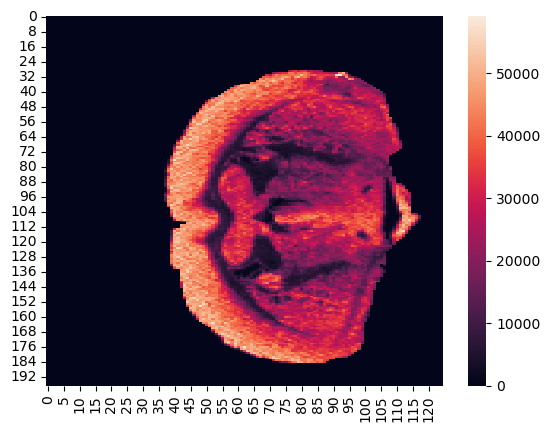

In [37]:
uniform_data_270_5_Tg_s5_799_5425 = np.array(masked_metabolomics_matrix_270_5_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['x_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][0]]), len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['y_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_270_5_Tg_s5.columns.get_loc('799.5425')]
ax = sns.heatmap(uniform_data_270_5_Tg_s5_799_5425)
plt.show()

In [38]:
group2 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 2]
group2.index.tolist()

['556.2758',
 '827.5738',
 '872.5533',
 '824.5541',
 '830.5179',
 '849.5583',
 '774.5279',
 '828.5633',
 '821.5270',
 '845.5255',
 '806.5375',
 '832.5750',
 '784.5687',
 '801.5493',
 '757.5522',
 '770.5109',
 '811.5994',
 '804.5469',
 '814.5267',
 '798.6175',
 '796.5256',
 '873.5563',
 '822.5305',
 '808.5762',
 '735.5709',
 '762.5927',
 '850.5593',
 '825.5574',
 '831.5212',
 '769.5609',
 '786.4899',
 '834.5881',
 '789.6160',
 '870.5369',
 '847.5345',
 '786.5891',
 '874.5556',
 '132.0765',
 '296.0660',
 '830.5249',
 '762.5934',
 '735.5701',
 '872.5522',
 '849.5557',
 '770.5098',
 '786.4899.1',
 '870.5354',
 '874.5531',
 '762.5927.1',
 '784.5704',
 '806.5431',
 '804.5458',
 '798.4781',
 '848.5630',
 '798.4778',
 '827.5731',
 '830.5167',
 '824.5541.1',
 '774.5284',
 '845.5255.1',
 '821.5264',
 '814.5253',
 '806.5353',
 '873.5560',
 '798.6143',
 '757.5514',
 '822.5307',
 '811.5989',
 '831.5198',
 '804.5457',
 '825.5579',
 '808.5746',
 '798.4866',
 '789.6169',
 '786.5894',
 '814.5215',
 '76

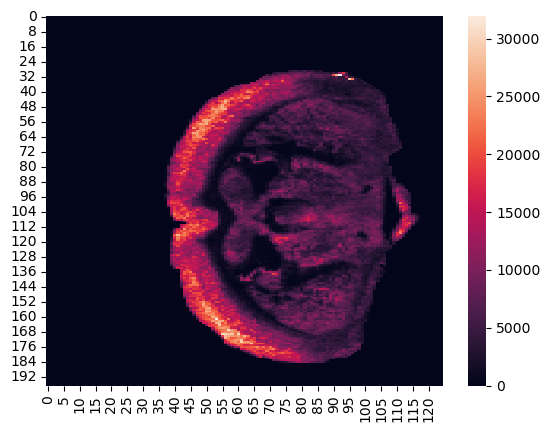

In [41]:
uniform_data_270_5_Tg_s5_556_2758 = np.array(masked_metabolomics_matrix_270_5_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['x_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][0]]), len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['y_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_270_5_Tg_s5.columns.get_loc('872.5533')]
ax = sns.heatmap(uniform_data_270_5_Tg_s5_556_2758)
plt.show()

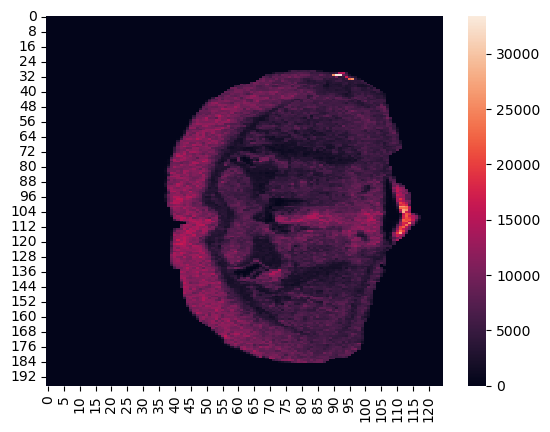

In [42]:
uniform_data_270_5_Tg_s5_827_5738 = np.array(masked_metabolomics_matrix_270_5_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['x_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][0]]), len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['y_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_270_5_Tg_s5.columns.get_loc('827.5738')]
ax = sns.heatmap(uniform_data_270_5_Tg_s5_827_5738)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_tg_12mo_group2_representative_image.tiff')
plt.show()

In [43]:
group3 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 3]
group3.index.tolist()

['826.5699',
 '800.5466',
 '773.5269',
 '848.5532',
 '783.5685',
 '820.5240',
 '844.5222',
 '756.5493',
 '846.5317',
 '800.5466.1',
 '820.5236',
 '844.5231',
 '800.5482',
 '756.5498',
 '799.5392',
 '798.5355',
 '800.5422',
 '848.5495',
 '782.5619',
 '846.5306',
 '772.5197',
 '826.5706',
 '773.5271',
 '848.5543',
 '826.5671.1',
 '782.5605',
 '798.5410',
 '846.5321',
 '798.5750',
 '820.5240.1',
 '783.5685.1',
 '800.5469']

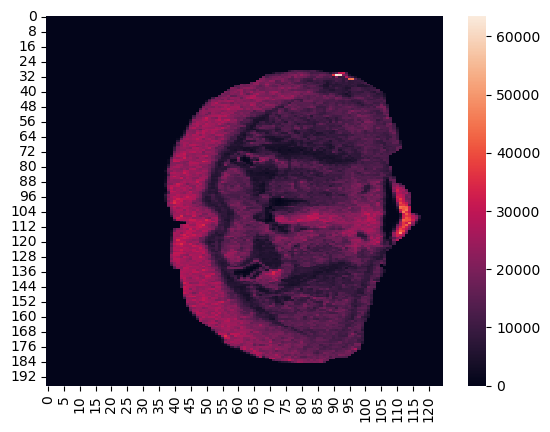

In [44]:
uniform_data_270_5_Tg_s5_826_5699 = np.array(masked_metabolomics_matrix_270_5_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['x_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][0]]), len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['y_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_270_5_Tg_s5.columns.get_loc('826.5699')]
ax = sns.heatmap(uniform_data_270_5_Tg_s5_826_5699)
plt.show()

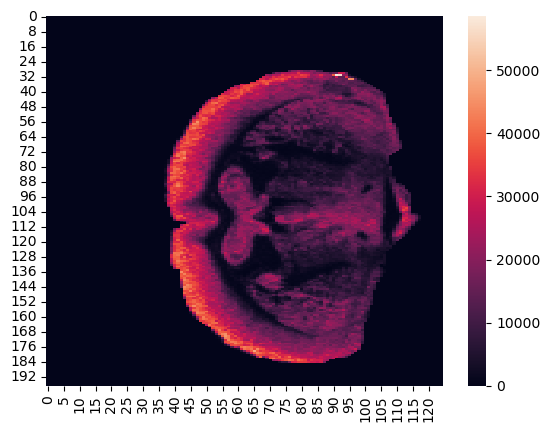

In [45]:
uniform_data_270_5_Tg_s5_773_5269 = np.array(masked_metabolomics_matrix_270_5_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['x_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][0]]), len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['y_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_270_5_Tg_s5.columns.get_loc('773.5269')]
ax = sns.heatmap(uniform_data_270_5_Tg_s5_773_5269)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_tg_12mo_group3_representative_image.tiff')
plt.show()

In [46]:
group4 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 4]
group4.index.tolist()

['798.5390', '798.5506', '798.5400', '798.5396', '798.5383.1', '798.5414']

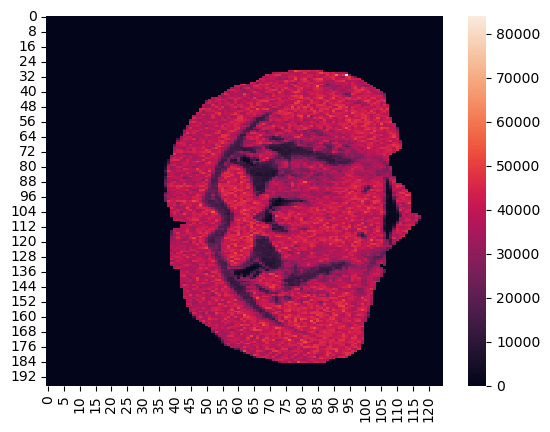

In [47]:
uniform_data_270_5_Tg_s5_798_5390 = np.array(masked_metabolomics_matrix_270_5_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['x_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][0]]), len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['y_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_270_5_Tg_s5.columns.get_loc('798.5390')]
ax = sns.heatmap(uniform_data_270_5_Tg_s5_798_5390)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_tg_12mo_group4_representative_image.tiff')
plt.show()

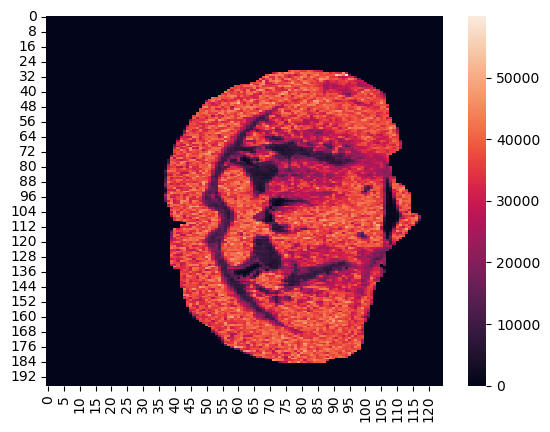

In [48]:
uniform_data_270_5_Tg_s5_798_5506 = np.array(masked_metabolomics_matrix_270_5_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['x_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][0]]), len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['y_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_270_5_Tg_s5.columns.get_loc('798.5506')]
ax = sns.heatmap(uniform_data_270_5_Tg_s5_798_5506)
plt.show()

In [49]:
group5 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 5]
group5.index.tolist()

['760.5831', '760.5847', '760.5849']

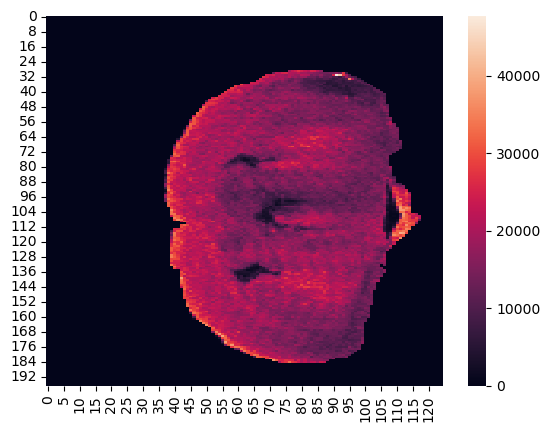

In [50]:
uniform_data_270_5_Tg_s5_760_5831 = np.array(masked_metabolomics_matrix_270_5_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['x_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][0]]), len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['y_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_270_5_Tg_s5.columns.get_loc('760.5831')]
ax = sns.heatmap(uniform_data_270_5_Tg_s5_760_5831)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_tg_12mo_group5_representative_image.tiff')
plt.show()

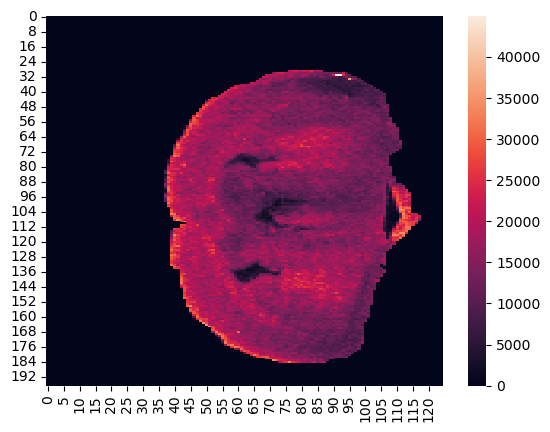

In [51]:
uniform_data_270_5_Tg_s5_760_5847 = np.array(masked_metabolomics_matrix_270_5_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['x_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][0]]), len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['y_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_270_5_Tg_s5.columns.get_loc('760.5847')]
ax = sns.heatmap(uniform_data_270_5_Tg_s5_760_5847)
plt.show()

In [52]:
group6 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 6]
group6.index.tolist()

['810.5964',
 '761.5864',
 '734.5684',
 '788.6133',
 '734.5676',
 '783.5683',
 '810.5961',
 '761.5866',
 '788.6134',
 '826.5671',
 '734.5679',
 '761.5863',
 '810.5966']

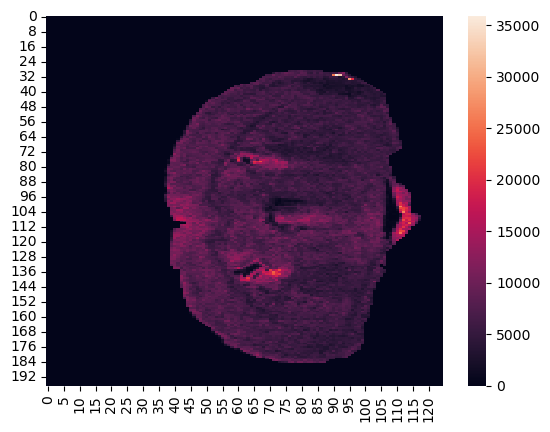

In [53]:
uniform_data_270_5_Tg_s5_810_5964 = np.array(masked_metabolomics_matrix_270_5_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['x_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][0]]), len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['y_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_270_5_Tg_s5.columns.get_loc('810.5964')]
ax = sns.heatmap(uniform_data_270_5_Tg_s5_810_5964)
plt.show()

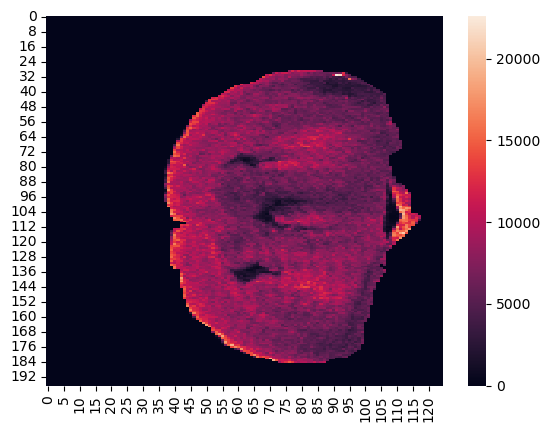

In [54]:
uniform_data_270_5_Tg_s5_761_5864 = np.array(masked_metabolomics_matrix_270_5_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['x_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][0]]), len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['y_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_270_5_Tg_s5.columns.get_loc('761.5864')]
ax = sns.heatmap(uniform_data_270_5_Tg_s5_761_5864)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_tg_12mo_group6_representative_image.tiff')
plt.show()

<a class="anchor" id="Brain_22motg"></a>
Below we import a brain for the 22 month tg.

In [2]:
num_metabolites_positive = 10783
# Import metabolomics matrix only
masked_metabolomics_matrix_268_3_Tg_s5 = pd.read_csv('D:/All AGE Positive masks and roi sums/Whole Brains/268_3_Tg_s5_pixel_matrix_with_mask_whole_brain.csv', index_col = 0)
# Read in coordinates for metabolomics matrix
coordinates_matrix_268_3_Tg_s5 = pd.read_csv('D:/All AGE Positive TL/AL011323_AGE_268_3_Tg_s5_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])

Below we keep only the filtered ions.

In [3]:
filtered_ions_matrix_no_background = masked_metabolomics_matrix_268_3_Tg_s5.loc[(masked_metabolomics_matrix_268_3_Tg_s5.sum(axis=1) != 0), :]
filtered_ions_matrix_no_background_tranposed = filtered_ions_matrix_no_background.T
filtered_ions_matrix_no_background_tranposed

3758     3759     3760     3761     3762     3763     3764   \
556.2758  20789.0  25892.0  24866.0  25458.0  24928.0  24904.0  24872.0   
760.5831   4676.0    727.0    879.0    257.0    210.0    277.0    242.0   
826.5699   2289.0    910.0    474.0    659.0    321.0    147.0    420.0   
782.5654  10020.0   3577.0   2357.0   1479.0    461.0   1582.0   1682.0   
557.2783   7693.0   7727.0   7930.0   8054.0   7296.0   7390.0   8623.0   
...           ...      ...      ...      ...      ...      ...      ...   
911.5466     30.0      0.0     24.0      0.0      0.0     44.0     19.0   
525.2379     38.0     20.0     20.0     26.0      0.0     14.0    390.0   
510.2535    280.0      0.0     33.0      0.0      0.0      0.0    266.0   
881.5392    155.0     44.0      0.0      0.0     45.0      0.0     72.0   
922.4955      0.0      0.0     44.0      0.0     96.0     29.0    102.0   

            3765     3766     3767   ...    22273    22274    22275    22276  \
556.2758  24829.0  23936.0  27475.0  ...   1441.0   2301.0   2342.0   1648.0   
760.5831    542.0    624.0   4831.0  ...  53164.0  53176.0  47531.0  45289.0   
826.5699    118.0    305.0   1115.0  ...  42812.0  40568.0  47105.0  40698.0   
782.5654    761.0   1431.0   5574.0  ...  51813.0  53749.0  44176.0  47620.0   
557.2783   7525.0   6192.0   9024.0  ...    578.0    676.0    860.0    173.0   
...           ...      ...      ...  ...      ...      ...      ...      ...   
911.5466      0.0      0.0     12.0  ...     20.0     52.0     52.0    181.0   
525.2379    581.0    181.0    180.0  ...    223.0    108.0    384.0    259.0   
510.2535      0.0     29.0      0.0  ...    540.0    611.0    967.0   1288.0   
881.5392    110.0     68.0     41.0  ...    302.0    157.0    241.0    105.0   
922.4955      0.0     36.0      0.0  ...     63.0    627.0    126.0     54.0   

            22277    22387    22388    22389    22390    22391  
556.2758   1805.0   2142.0   1733.0   7097.0  15114.0  12627.0  
760.5831  41490.0  43510.0  46360.0  29055.0  20834.0  21544.0  
826.5699  35482.0  42513.0  43341.0  27600.0  14677.0  14503.0  
782.5654  43935.0  49829.0  53514.0  41609.0  23934.0  21093.0  
557.2783    708.0    620.0    504.0   1902.0   5434.0   4099.0  
...           ...      ...      ...      ...      ...      ...  
911.5466     71.0    185.0    199.0    188.0    107.0     24.0  
525.2379     51.0     31.0    177.0    350.0    168.0     34.0  
510.2535    438.0    573.0    562.0   1098.0    693.0    406.0  
881.5392     75.0    102.0     54.0     85.0    174.0     40.0  
922.4955     18.0    207.0     53.0      6.0    111.0     79.0  

[10783 rows x 9057 columns]

Below we run kmeans on the pixels to find general patterns with 7 groups because that is what we saw in HDI.

C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


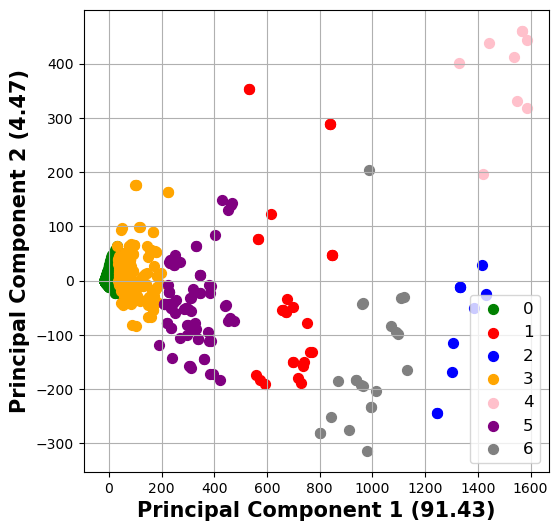

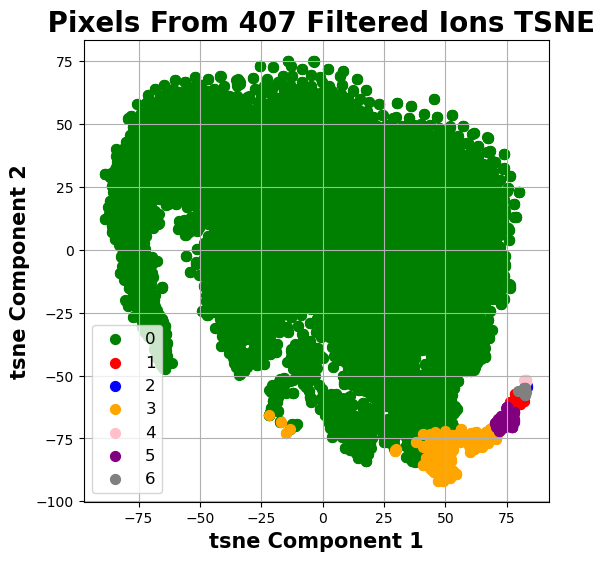

ValueError: cannot assign slice from input of different size

<Figure size 600x600 with 0 Axes>

In [4]:
# Standardize data
filtered_ions_matrix_no_background_tranposed_standardized = StandardScaler().fit_transform(filtered_ions_matrix_no_background_tranposed)

kmeans = KMeans(n_clusters=7, 
                    random_state=1)
kmeans.fit(filtered_ions_matrix_no_background_tranposed_standardized)
number_of_clusters = 7
clusterlabels = kmeans.labels_

# Specify plot type
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
principalDf_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf_pca['phenotype'] = clusterlabels
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(f'Principal Component 1 ({percent_variance[0]})', fontsize = 15, fontweight = 'bold')
ax.set_ylabel(f'Principal Component 2 ({percent_variance[1]})', fontsize = 15, fontweight = 'bold')
#ax.set_title(' Pixels From 407 Filtered Ions PCA', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf_pca['phenotype'] == group
    ax.scatter(principalDf_pca.loc[indicesToKeep, 'principal component 1']
               , principalDf_pca.loc[indicesToKeep, 'principal component 2'] 
               , c = color
               , s = 50)
ax.legend(labels, fontsize = 'large')
ax.grid()
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_tg_22mo_ion_clustering_pca.tiff')
plt.show()


tsne = TSNE(n_components=2, random_state = 100)
tsne_components = tsne.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
principalDf = pd.DataFrame(data = tsne_components, columns = ['tsne component 1', 'tsne component 2'])
principalDf['phenotype'] = clusterlabels
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne Component 1', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('tsne Component 2', fontsize = 15, fontweight = 'bold')
ax.set_title(' Pixels From 407 Filtered Ions TSNE', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf['phenotype'] == group
    ax.scatter(principalDf.loc[indicesToKeep, 'tsne component 1']
               , principalDf.loc[indicesToKeep, 'tsne component 2'] 
               , c = color
               , s = 50, alpha = 1)
ax.legend(labels, fontsize = 'large')
# Scatter 301
#plt.scatter(3.936206, 2.881305, color = 'black')
ax.grid()
plt.show()

plt.figure(figsize = (6, 6))
reducer = umap.UMAP()
embedding = reducer.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
embedding_df = pd.DataFrame(embedding)
embedding_df['phenotype'] = clusterlabels
embedding_df['phenotype'] = embedding_df['phenotype'].replace({0 : '0', 1 : '1', 2 : '2', 3 : '3', 4: '4', 5: '5', 6 : '6'})

sns.scatterplot(data = embedding_df, hue = 'phenotype', x = 0, y = 1, alpha = 0.3)
plt.title('UMAP projection of Pixels From 407 Filtered Ions', fontsize=12)


Below we add the labels

In [5]:
filtered_ions_matrix_no_background_tranposed['labels'] = clusterlabels
filtered_ions_matrix_no_background_tranposed

3758     3759     3760     3761     3762     3763     3764  \
556.2758  20789.0  25892.0  24866.0  25458.0  24928.0  24904.0  24872.0   
760.5831   4676.0    727.0    879.0    257.0    210.0    277.0    242.0   
826.5699   2289.0    910.0    474.0    659.0    321.0    147.0    420.0   
782.5654  10020.0   3577.0   2357.0   1479.0    461.0   1582.0   1682.0   
557.2783   7693.0   7727.0   7930.0   8054.0   7296.0   7390.0   8623.0   
...           ...      ...      ...      ...      ...      ...      ...   
911.5466     30.0      0.0     24.0      0.0      0.0     44.0     19.0   
525.2379     38.0     20.0     20.0     26.0      0.0     14.0    390.0   
510.2535    280.0      0.0     33.0      0.0      0.0      0.0    266.0   
881.5392    155.0     44.0      0.0      0.0     45.0      0.0     72.0   
922.4955      0.0      0.0     44.0      0.0     96.0     29.0    102.0   

             3765     3766     3767  ...    22274    22275    22276    22277  \
556.2758  24829.0  23936.0  27475.0  ...   2301.0   2342.0   1648.0   1805.0   
760.5831    542.0    624.0   4831.0  ...  53176.0  47531.0  45289.0  41490.0   
826.5699    118.0    305.0   1115.0  ...  40568.0  47105.0  40698.0  35482.0   
782.5654    761.0   1431.0   5574.0  ...  53749.0  44176.0  47620.0  43935.0   
557.2783   7525.0   6192.0   9024.0  ...    676.0    860.0    173.0    708.0   
...           ...      ...      ...  ...      ...      ...      ...      ...   
911.5466      0.0      0.0     12.0  ...     52.0     52.0    181.0     71.0   
525.2379    581.0    181.0    180.0  ...    108.0    384.0    259.0     51.0   
510.2535      0.0     29.0      0.0  ...    611.0    967.0   1288.0    438.0   
881.5392    110.0     68.0     41.0  ...    157.0    241.0    105.0     75.0   
922.4955      0.0     36.0      0.0  ...    627.0    126.0     54.0     18.0   

            22387    22388    22389    22390    22391  labels  
556.2758   2142.0   1733.0   7097.0  15114.0  12627.0       3  
760.5831  43510.0  46360.0  29055.0  20834.0  21544.0       4  
826.5699  42513.0  43341.0  27600.0  14677.0  14503.0       6  
782.5654  49829.0  53514.0  41609.0  23934.0  21093.0       2  
557.2783    620.0    504.0   1902.0   5434.0   4099.0       0  
...           ...      ...      ...      ...      ...     ...  
911.5466    185.0    199.0    188.0    107.0     24.0       0  
525.2379     31.0    177.0    350.0    168.0     34.0       0  
510.2535    573.0    562.0   1098.0    693.0    406.0       0  
881.5392    102.0     54.0     85.0    174.0     40.0       0  
922.4955    207.0     53.0      6.0    111.0     79.0       0  

[10783 rows x 9058 columns]

Below we look at representative ion images from each cluster.

In [6]:
group0 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 0]
group0.index.tolist()

['557.2783',
 '578.2553',
 '163.0387',
 '594.2257',
 '297.6156',
 '558.2799',
 '445.1249',
 '335.1248',
 '579.2580',
 '536.1653',
 '413.2739',
 '556.5202',
 '173.0789',
 '600.2353',
 '217.1045',
 '239.1611',
 '171.1438',
 '610.1793',
 '295.1932',
 '767.5111',
 '866.6432',
 '849.6414',
 '595.2278',
 '298.1170',
 '425.2925',
 '723.4885',
 '301.1404',
 '446.1249',
 '161.0956',
 '537.1653',
 '871.5403',
 '357.2024',
 '713.4481',
 '365.1043',
 '519.1394',
 '772.8143',
 '323.2241',
 '429.0930',
 '799.1978',
 '663.4477',
 '823.5336',
 '857.5806',
 '865.6349',
 '854.6001',
 '852.6282',
 '556.6204',
 '852.5898',
 '798.9550',
 '791.5225',
 '150.0257',
 '839.6210',
 '850.6476',
 '762.4794',
 '611.1793',
 '245.0775',
 '803.4816',
 '136.0207',
 '538.1631',
 '851.5616',
 '782.8572',
 '794.5442',
 '447.1238',
 '750.5374',
 '556.8314',
 '744.4928',
 '114.0908',
 '891.6509',
 '684.1912',
 '799.0620',
 '724.4990',
 '760.8710',
 '854.5647',
 '612.1794',
 '430.3888',
 '556.7079',
 '778.4734',
 '741.4819',

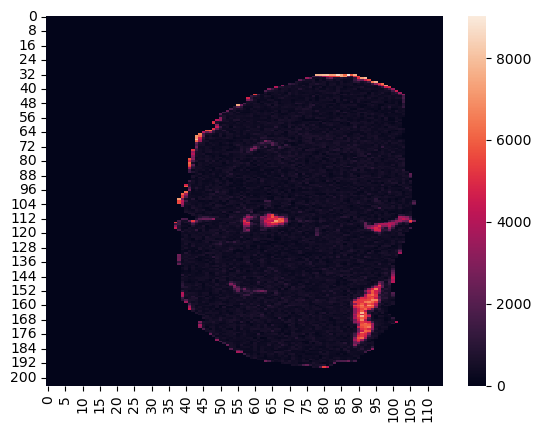

In [7]:
uniform_data_268_3_Tg_s5_557_2783 = np.array(masked_metabolomics_matrix_268_3_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['x_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['y_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_268_3_Tg_s5.columns.get_loc('557.2783')]
ax = sns.heatmap(uniform_data_268_3_Tg_s5_557_2783)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_tg_22mo_group0_representative_image.tiff')
plt.show()

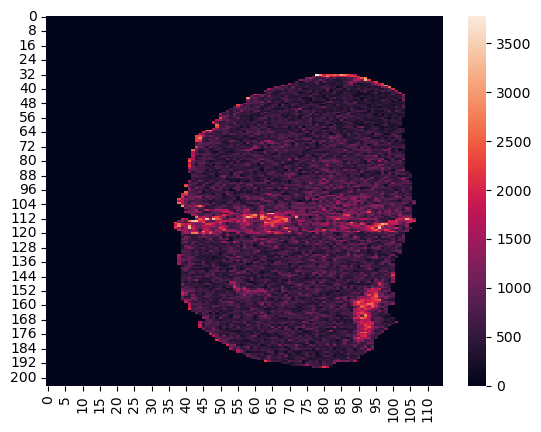

In [8]:
uniform_data_268_3_Tg_s5_163_0387 = np.array(masked_metabolomics_matrix_268_3_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['x_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['y_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_268_3_Tg_s5.columns.get_loc('163.0387')]
ax = sns.heatmap(uniform_data_268_3_Tg_s5_163_0387)
plt.show()

In [9]:
group1 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 1]
group1.index.tolist()

['848.5532',
 '783.5685',
 '820.5240',
 '810.5964',
 '844.5222',
 '756.5493',
 '761.5864',
 '734.5684',
 '846.5317',
 '788.6133',
 '734.5676',
 '820.5236',
 '783.5683',
 '844.5231',
 '810.5961',
 '756.5498',
 '761.5866',
 '788.6134',
 '826.5671',
 '734.5679',
 '848.5495',
 '846.5306',
 '848.5543',
 '826.5671.1',
 '798.5341',
 '846.5321',
 '761.5863',
 '820.5240.1',
 '783.5685.1',
 '810.5966']

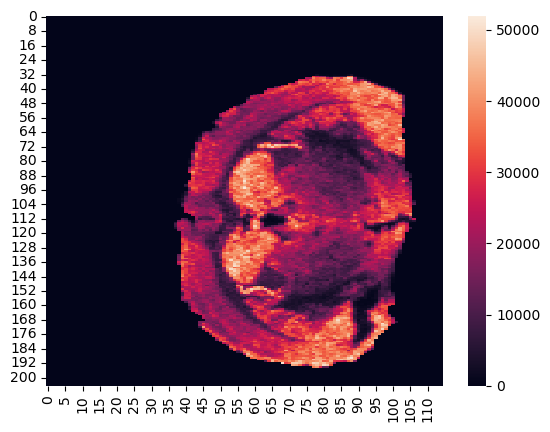

In [10]:
uniform_data_268_3_Tg_s5_848_5532 = np.array(masked_metabolomics_matrix_268_3_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['x_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['y_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_268_3_Tg_s5.columns.get_loc('848.5532')]
ax = sns.heatmap(uniform_data_268_3_Tg_s5_848_5532)
plt.show()

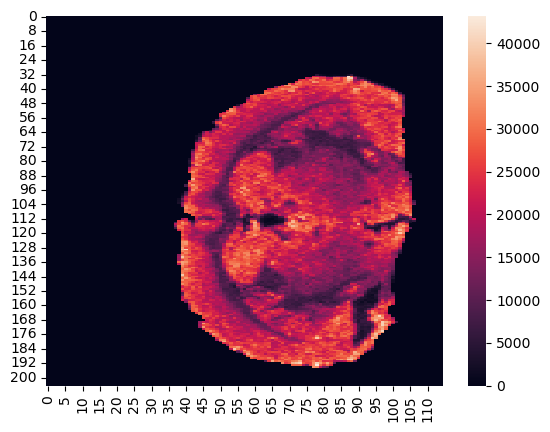

In [11]:
uniform_data_268_3_Tg_s5_783_5685 = np.array(masked_metabolomics_matrix_268_3_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['x_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['y_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_268_3_Tg_s5.columns.get_loc('783.5685')]
ax = sns.heatmap(uniform_data_268_3_Tg_s5_783_5685)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_tg_22mo_group1_representative_image.tiff')
plt.show()

In [66]:
group2 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 2]
group2.index.tolist()

['782.5654',
 '799.5425',
 '772.5239',
 '799.5437',
 '772.5237',
 '799.5430',
 '782.5656.1',
 '772.5246',
 '799.5437.1',
 '782.5666',
 '798.5400']

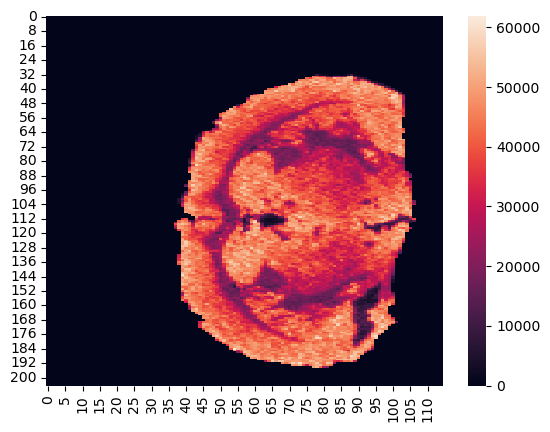

In [12]:
uniform_data_268_3_Tg_s5_782_5654 = np.array(masked_metabolomics_matrix_268_3_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['x_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['y_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_268_3_Tg_s5.columns.get_loc('782.5654')]
ax = sns.heatmap(uniform_data_268_3_Tg_s5_782_5654)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_tg_22mo_group2_representative_image.tiff')
plt.show()

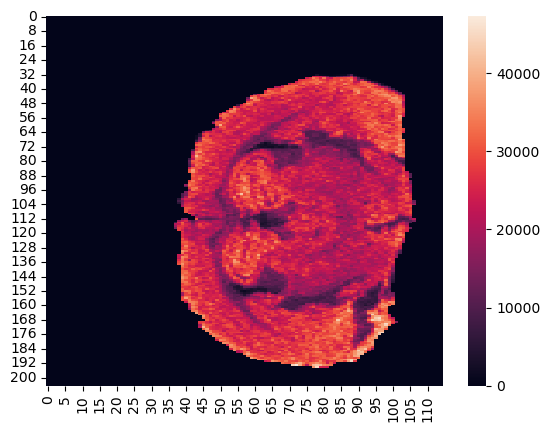

In [13]:
uniform_data_268_3_Tg_s5_734_5684 = np.array(masked_metabolomics_matrix_268_3_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['x_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['y_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_268_3_Tg_s5.columns.get_loc('734.5684')]
ax = sns.heatmap(uniform_data_268_3_Tg_s5_734_5684)
plt.show()

In [14]:
group3 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 3]
group3.index.tolist()

['556.2758',
 '149.0228',
 '796.5256',
 '873.5563',
 '822.5305',
 '850.5593',
 '825.5574',
 '831.5212',
 '769.5609',
 '786.4899',
 '834.5881',
 '848.6373',
 '798.8399',
 '789.6160',
 '790.5199',
 '870.5369',
 '766.5161',
 '739.4666',
 '833.5809',
 '856.5775',
 '786.5891',
 '874.5556',
 '758.5554',
 '802.4776',
 '829.5555',
 '788.5004',
 '838.6172',
 '771.5127',
 '807.5444',
 '815.5294',
 '802.5543',
 '768.5304',
 '797.5280',
 '864.6302',
 '812.5887',
 '805.5504',
 '785.5750',
 '753.5859',
 '787.4877',
 '754.5345',
 '740.4787',
 '780.5504',
 '809.5825',
 '770.5577',
 '775.5295',
 '804.4963',
 '812.5089',
 '816.5268',
 '534.2958',
 '296.0660',
 '732.5515',
 '876.5782',
 '789.4984',
 '731.6039',
 '792.5392',
 '835.5943',
 '836.6080',
 '736.5731',
 '787.5963',
 '763.5999',
 '875.5584',
 '790.6194',
 '776.5560',
 '369.3506',
 '842.5617',
 '381.0800',
 '763.5998',
 '776.5599',
 '688.3962',
 '439.3105',
 '740.4813',
 '815.5321',
 '736.5722',
 '848.6346',
 '758.5541',
 '786.4899.1',
 '849.6385

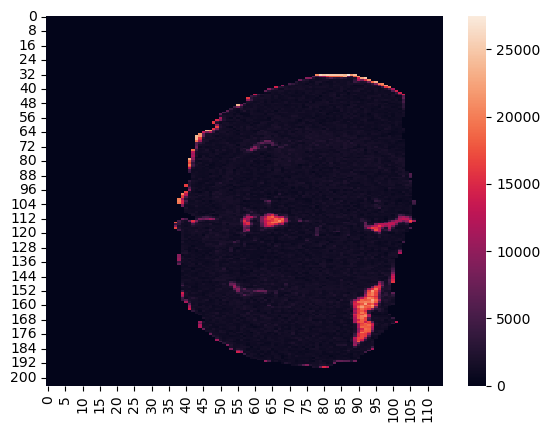

In [15]:
uniform_data_268_3_Tg_s5_556_2758 = np.array(masked_metabolomics_matrix_268_3_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['x_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['y_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_268_3_Tg_s5.columns.get_loc('556.2758')]
ax = sns.heatmap(uniform_data_268_3_Tg_s5_556_2758)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_tg_22mo_group3_representative_image.tiff')
plt.show()

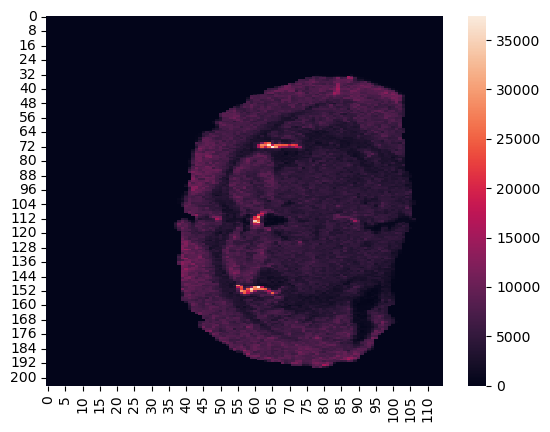

In [16]:
uniform_data_268_3_Tg_s5_796_5256 = np.array(masked_metabolomics_matrix_268_3_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['x_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['y_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_268_3_Tg_s5.columns.get_loc('796.5256')]
ax = sns.heatmap(uniform_data_268_3_Tg_s5_796_5256)
plt.show()

In [17]:
group4 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 4]
group4.index.tolist()

['760.5831',
 '798.5389',
 '760.5847',
 '798.5390',
 '798.5506',
 '760.5849',
 '798.5396',
 '798.5383.1',
 '798.5414']

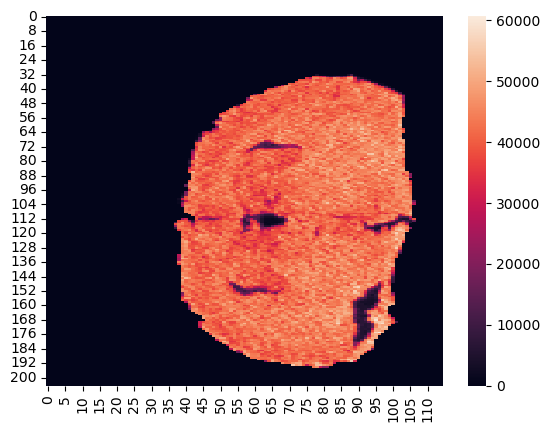

In [18]:
uniform_data_268_3_Tg_s5_760_5831 = np.array(masked_metabolomics_matrix_268_3_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['x_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['y_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_268_3_Tg_s5.columns.get_loc('760.5831')]
ax = sns.heatmap(uniform_data_268_3_Tg_s5_760_5831)
plt.show()

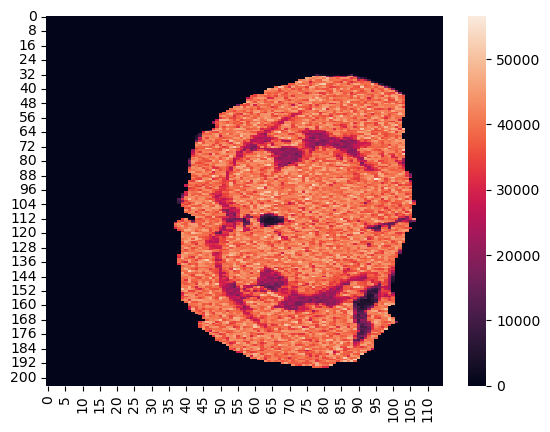

In [19]:
uniform_data_268_3_Tg_s5_798_5389 = np.array(masked_metabolomics_matrix_268_3_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['x_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['y_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_268_3_Tg_s5.columns.get_loc('798.5389')]
ax = sns.heatmap(uniform_data_268_3_Tg_s5_798_5389)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_tg_22mo_group4_representative_image.tiff')
plt.show()

In [20]:
group5 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 5]
group5.index.tolist()

['827.5738',
 '872.5533',
 '824.5541',
 '830.5179',
 '849.5583',
 '774.5279',
 '828.5633',
 '821.5270',
 '845.5255',
 '806.5375',
 '832.5750',
 '784.5687',
 '801.5493',
 '757.5522',
 '770.5109',
 '811.5994',
 '804.5469',
 '814.5267',
 '798.6175',
 '808.5762',
 '735.5709',
 '762.5927',
 '847.5345',
 '132.0765',
 '830.5249',
 '762.5934',
 '735.5701',
 '872.5522',
 '849.5557',
 '770.5098',
 '762.5927.1',
 '784.5704',
 '806.5431',
 '798.4781',
 '798.4766',
 '798.4778',
 '827.5731',
 '830.5167',
 '824.5541.1',
 '774.5284',
 '845.5255.1',
 '821.5264',
 '814.5253',
 '806.5353',
 '798.6143',
 '735.5693',
 '757.5514',
 '811.5989',
 '804.5457',
 '808.5746',
 '798.4866',
 '814.5215',
 '847.5339',
 '801.5499',
 '828.5601',
 '832.5764',
 '757.5524',
 '828.5564',
 '770.5082',
 '806.5272',
 '814.5294',
 '770.5105',
 '784.5714',
 '872.5441',
 '849.5539',
 '847.5351',
 '828.5579',
 '735.5710',
 '798.4943',
 '772.4834',
 '734.5393',
 '734.5348',
 '808.5771',
 '828.5645',
 '832.5759',
 '811.6000',
 '814.

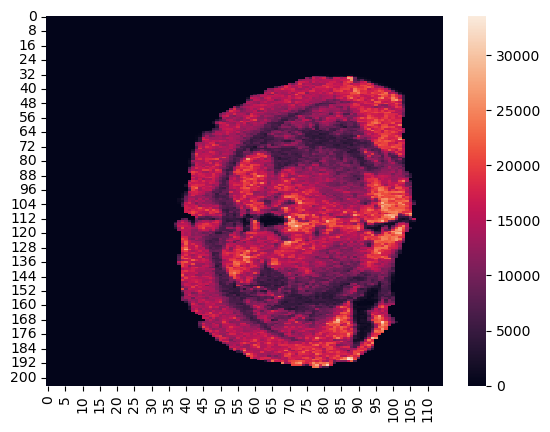

In [21]:
uniform_data_268_3_Tg_s5_827_5738 = np.array(masked_metabolomics_matrix_268_3_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['x_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['y_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_268_3_Tg_s5.columns.get_loc('827.5738')]
ax = sns.heatmap(uniform_data_268_3_Tg_s5_827_5738)
plt.show()

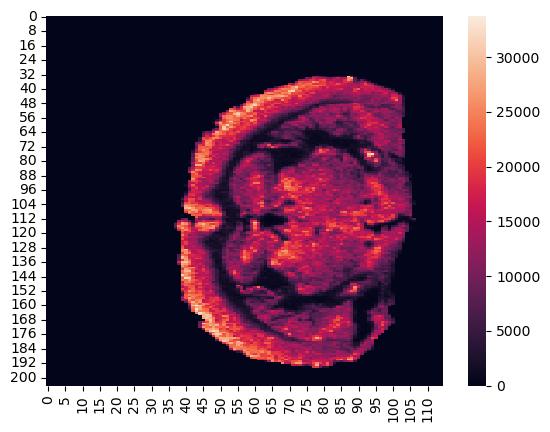

In [22]:
uniform_data_268_3_Tg_s5_872_5533 = np.array(masked_metabolomics_matrix_268_3_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['x_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['y_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_268_3_Tg_s5.columns.get_loc('872.5533')]
ax = sns.heatmap(uniform_data_268_3_Tg_s5_872_5533)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_tg_22mo_group5_representative_image.tiff')
plt.show()

In [23]:
group6 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 6]
group6.index.tolist()

['826.5699',
 '800.5466',
 '798.5388',
 '773.5269',
 '782.5656',
 '799.5417',
 '800.5466.1',
 '772.5222',
 '800.5482',
 '799.5392',
 '798.5355',
 '800.5422',
 '782.5619',
 '772.5197',
 '826.5706',
 '773.5271',
 '799.5393',
 '782.5605',
 '798.5383',
 '798.5410',
 '798.5750',
 '800.5469']

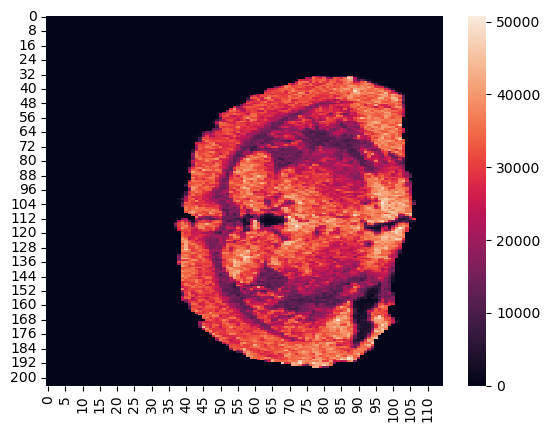

In [24]:
uniform_data_268_3_Tg_s5_826_5699 = np.array(masked_metabolomics_matrix_268_3_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['x_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['y_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_268_3_Tg_s5.columns.get_loc('826.5699')]
ax = sns.heatmap(uniform_data_268_3_Tg_s5_826_5699)
plt.show()

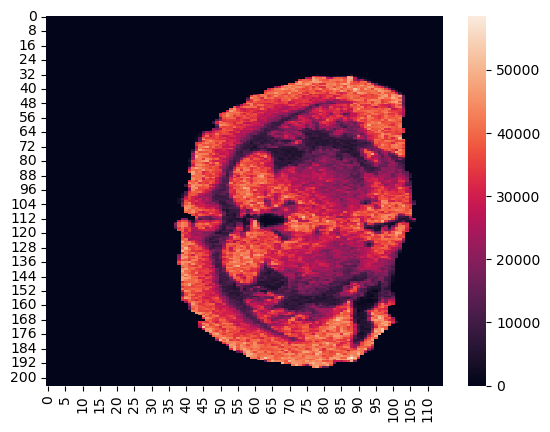

In [25]:
uniform_data_268_3_Tg_s5_798_5388 = np.array(masked_metabolomics_matrix_268_3_Tg_s5).T.reshape([num_metabolites_positive, len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['x_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['y_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][1]])])[masked_metabolomics_matrix_268_3_Tg_s5.columns.get_loc('798.5388')]
ax = sns.heatmap(uniform_data_268_3_Tg_s5_798_5388)
plt.savefig('Images For Paper/Positive Ion Patterns/all_ion_tg_22mo_group6_representative_image.tiff')
plt.show()